## Importación de librerías y Preparación de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import xgboost as xgb

from neuralprophet import NeuralProphet
import autokeras as ak

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import warnings

warnings.filterwarnings('ignore')
pd.set_option("mode.chained_assignment", None)
sns.set(style='darkgrid')

pathfile = r'.\Datos2021_verEne2023.csv'

#df1 = pd.read_csv(pathfile, sep=';', encoding='latin-1')

df1 = pd.read_csv(pathfile, low_memory=False)

df1.head()

Fecha      652Carga.Valor           652FI1063  \
0  2021-05-31 22:00:00+00:00  366.54785273625305  200.55576961181154   
1  2021-05-31 22:01:00+00:00  366.86846336951623  200.35362977286746   
2  2021-05-31 22:02:00+00:00   367.1890740027794  200.13136752347953   
3  2021-05-31 22:03:00+00:00  367.50968463604266  200.02998699909537   
4  2021-05-31 22:04:00+00:00   367.8302952693059   200.1165218172243   

            652FI2063         620FI091.MC        620FC098.MC  \
0   199.3118190453675  16.215749263763428  7.929999947547913   
1  198.60415227438708  16.269249439239502  7.996000170707703   
2  197.89437059235084   16.28599977493286  8.053250312805176   
3  197.93987148341608  16.266000270843506  8.101750373840332   
4   197.4998453622807   16.30375051498413  8.068500280380249   

          620FC117.MC         652FC097.MC           652FC0099  \
0  10.784499883651733  24.957499504089355   28.70544688416062   
1  10.835500001907349   24.46049976348877   30.78640392179527   
2  10.850500106811523   24.15999984741211  33.149396990983355   
3  10.829500198364258  24.055999755859375   35.54680725948122   
4  10.803500175476074  25.040749549865723  37.727453755165506   

          652FC029.MC  ...   652TI5219   652FC1116   652FC1216   652FC1316  \
0  159.20650482177734  ...  133.910302  836.217545  995.059290  850.661634   
1   158.5354995727539  ...  133.863776  839.996618  994.101039  851.452381   
2  156.51799774169922  ...  133.848707  848.420183  994.288118  852.790265   
3  153.15399932861328  ...  133.908339  841.792240  990.304323  849.890708   
4  149.87850189208984  ...  133.909655  839.464182  991.686664  851.374330   

    652FC1416   652FC2116          652FC2216   652FC2316   652FC2416  \
0  850.673014  857.985508  844.3493454141451  850.342333  848.235392   
1  851.353795  857.161726    848.15207297413  851.277860  850.385273   
2  852.735639  859.044872  847.6249921765902  854.135774  856.751517   
3  850.515930  857.303811  846.2108919562835  850.729425  856.747977   
4  853.020544  861.252103  849.5842667605139  855.389260  855.577377   

   652FC0767  
0   0.001409  
1   0.000479  
2   0.001197  
3   0.001039  
4   0.001159  

[5 rows x 63 columns]

In [2]:
pathfile = r'.\Datos2022_verEne2023.csv'

#df2 = pd.read_csv(pathfile, sep=';', encoding='latin-1')

df2 = pd.read_csv(pathfile, low_memory=False)
df2.head()

Fecha      652Carga.Valor           652FI1063  \
0  2021-12-31 23:00:00+00:00   369.1890234987052  194.86778469561494   
1  2021-12-31 23:01:00+00:00  369.06330552805105  194.31551155467866   
2  2021-12-31 23:02:00+00:00  368.93758755739685  194.33965121996394   
3  2021-12-31 23:03:00+00:00  368.81186958674266   194.8933016752116   
4  2021-12-31 23:04:00+00:00   368.6861516160885  194.88883847073444   

            652FI2063         620FI091.MC         620FC098.MC  \
0  194.98118708685783  14.379000186920166   2.178999900817871   
1  195.21887610339618  14.144999980926514  2.2249999046325684   
2   195.0818541145366  14.035249948501587  2.1997499465942383   
3   195.2952099738587  14.049750089645386   2.103250026702881   
4   195.2877517763627  14.074000120162964    2.02825003862381   

         620FC117.MC         652FC097.MC  652FC0099         652FC029.MC  ...  \
0  9.463750123977661   20.58649969100952  43.309755  110.39375114440918  ...   
1  9.405250310897827  20.701500415802002  43.305696  108.13125038146973  ...   
2  9.355500221252441  20.749250411987305  43.910925  107.15925025939941  ...   
3  9.314499855041504   20.72974967956543  43.898687  107.47775077819824  ...   
4  9.241499662399292   20.68024969100952  44.021178  106.69625091552734  ...   

            652TI5219          652FC1116          652FC1216  \
0   401.2110794401949   854.195072232407   849.897773237369   
1  401.18029918453453  852.4538651009588  849.9545638729882   
2  401.13509277624155  851.9350439068462  847.8443155910444   
3   401.1782927404107  852.0814718282262  850.2692627049721   
4    401.182253490226   852.559417437615  850.6465287397746   

           652FC1316          652FC1416          652FC2116          652FC2216  \
0  857.1070376969795  856.6873997313439  963.5696539925837  891.0880457560003   
1  851.0378388963292  855.2486982435289  962.4137365357841  891.8355274498314   
2  851.1998903762883  849.9058005282709  964.6541951956583  890.9135768525533   
3   853.531114617142  849.2056024810191  966.6371158348343  889.5297071697952   
4   852.991097462265   853.201541278504   968.635363909363  885.9200121217759   

           652FC2316          652FC2416                652FC0767  
0  876.6524768083126  941.3497706463153  -0.00013419008446760323  
1  875.1521478309403  940.0355064341846  -0.00013829524941013545  
2  873.7493382243966  937.0812819612327  -0.00013949502198960223  
3  877.7427829828781  935.4142935053904   -0.0001344171157832126  
4  878.6766104512809  936.5888922183877  -0.00013762430997930986  

[5 rows x 63 columns]

In [3]:
pathfile = r'.\Datos2023_verEneMay2023.csv'

dfcheck = pd.read_csv(pathfile, low_memory=False)
dfcheck.head()

Fecha      652Carga.Valor   652FI1063   652FI2063  \
0  2022-12-31 23:00:00+00:00   431.7024688720703  227.384035  227.837418   
1  2022-12-31 23:01:00+00:00   431.3800506591797  227.804211  228.015097   
2  2022-12-31 23:02:00+00:00  431.05763244628906  227.573603  228.846654   
3  2022-12-31 23:03:00+00:00  430.73521423339844  227.876654  227.564451   
4  2022-12-31 23:04:00+00:00   430.4127960205078  227.371544  227.624855   

          620FI091.MC        620FC098.MC         620FC117.MC  \
0  18.681750297546387  4.200250029563904  7.5372501611709595   
1   18.61525058746338  4.178750157356262   7.511750102043152   
2   18.61625051498413  4.178750157356262   7.476000070571899   
3  18.684750080108643  4.200250029563904   7.430000066757202   
4   18.72825002670288  4.148499965667725   7.408250093460083   

          652FC097.MC  652FC0099         652FC029.MC  ...   652TI5219  \
0  19.204500198364258  62.895398  103.80025100708008  ...  420.398859   
1  19.079500198364258  63.522848  103.76475143432617  ...  420.357561   
2   19.00725030899048  64.150298  106.50850105285645  ...  420.316263   
3   18.98775053024292  64.713769   112.0314998626709  ...  420.274966   
4  18.968000411987305  65.091740  115.14249992370605  ...  420.233668   

    652FC1116   652FC1216   652FC1316   652FC1416   652FC2116   652FC2216  \
0  866.190581  850.022609  848.496812  799.559504  951.582066  849.067497   
1  866.323152  849.942864  847.943350  799.434828  953.135325  847.533465   
2  867.645191  850.257814  848.013200  800.764873  951.431368  849.037212   
3  870.405168  850.184035  850.687110  804.104776  952.379122  850.930905   
4  867.870445  848.684555  850.514433  802.043432  948.907883  849.974103   

    652FC2316   652FC2416  652FC0767  
0  852.801377  852.688489   0.000333  
1  851.630175  859.320270   0.000399  
2  848.927740  856.406639   0.000466  
3  849.606374  844.339551   0.000532  
4  848.157922  842.247896   0.000598  

[5 rows x 63 columns]

In [4]:
df1.dtypes

Fecha              object
652Carga.Valor     object
652FI1063          object
652FI2063          object
620FI091.MC        object
                   ...   
652FC2116         float64
652FC2216          object
652FC2316         float64
652FC2416         float64
652FC0767         float64
Length: 63, dtype: object

In [5]:
df1.replace(to_replace="#¡DIV/0!",value="NaN",inplace=True)
df1.replace(to_replace="#¡VALOR!",value="NaN",inplace=True)
df1.replace(to_replace="[-11059] No Good Data For Calculation",value="NaN",inplace=True)
df1.replace(to_replace="Calculation aborted", value="NaN", inplace=True)
df1.replace(to_replace="El valor de DateTime especificado representa una hora no válida. Por ejemplo, cuando el reloj se adelanta, todas las horas del período que se omite no son válidas.\r\nNombre del parámetro: dateTime", value="NaN", inplace=True)
df1.replace(to_replace="Argument is not a string or cell reference", value="NaN", inplace=True)
df1.shape

(308219, 63)

In [6]:
df2.replace(to_replace="#¡DIV/0!",value="NaN",inplace=True)
df2.replace(to_replace="#¡VALOR!",value="NaN",inplace=True)
df2.replace(to_replace="[-11059] No Good Data For Calculation",value="NaN",inplace=True)
df2.replace(to_replace="Calculation aborted", value="NaN", inplace=True)
df2.replace(to_replace="El valor de DateTime especificado representa una hora no válida. Por ejemplo, cuando el reloj se adelanta, todas las horas del período que se omite no son válidas.\r\nNombre del parámetro: dateTime", value="NaN", inplace=True)
df2.replace(to_replace="Argument is not a string or cell reference", value="NaN", inplace=True)
df2.shape

(217379, 63)

In [7]:
dfcheck.replace(to_replace="#¡DIV/0!",value="NaN",inplace=True)
dfcheck.replace(to_replace="#¡VALOR!",value="NaN",inplace=True)
dfcheck.replace(to_replace="[-11059] No Good Data For Calculation",value="NaN",inplace=True)
dfcheck.replace(to_replace="Calculation aborted", value="NaN", inplace=True)
dfcheck.replace(to_replace="El valor de DateTime especificado representa una hora no válida. Por ejemplo, cuando el reloj se adelanta, todas las horas del período que se omite no son válidas.\r\nNombre del parámetro: dateTime", value="NaN", inplace=True)
dfcheck.replace(to_replace="Argument is not a string or cell reference", value="NaN", inplace=True)
dfcheck.shape

(172739, 63)

In [8]:
exclude=['Fecha']

c = df1.columns.difference(exclude)
df1[c]=df1[c].astype('float')

In [9]:
df1['Fecha']=pd.to_datetime(df1['Fecha'])

In [10]:
exclude=['Fecha']

c = df2.columns.difference(exclude)
df2[c]=df2[c].astype('float')

In [11]:
df2['Fecha']=pd.to_datetime(df2['Fecha'])

In [12]:
exclude=['Fecha']

c = dfcheck.columns.difference(exclude)
dfcheck[c]=dfcheck[c].astype('float')

In [13]:
dfcheck['Fecha']=pd.to_datetime(dfcheck['Fecha'])

In [14]:
df1.dtypes

Fecha             datetime64[ns, UTC]
652Carga.Valor                float64
652FI1063                     float64
652FI2063                     float64
620FI091.MC                   float64
                         ...         
652FC2116                     float64
652FC2216                     float64
652FC2316                     float64
652FC2416                     float64
652FC0767                     float64
Length: 63, dtype: object

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308219 entries, 0 to 308218
Data columns (total 63 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Fecha           308219 non-null  datetime64[ns, UTC]
 1   652Carga.Valor  262092 non-null  float64            
 2   652FI1063       308159 non-null  float64            
 3   652FI2063       308130 non-null  float64            
 4   620FI091.MC     308189 non-null  float64            
 5   620FC098.MC     308199 non-null  float64            
 6   620FC117.MC     308197 non-null  float64            
 7   652FC097.MC     308195 non-null  float64            
 8   652FC0099       308218 non-null  float64            
 9   652FC029.MC     308197 non-null  float64            
 10  652FC030.MC     307947 non-null  float64            
 11  620FC106.MC     308201 non-null  float64            
 12  652FC0019       308218 non-null  float64            
 13  652FC0020     

In [16]:
df1.describe()

652Carga.Valor      652FI1063      652FI2063    620FI091.MC  \
count   262092.000000  308159.000000  308130.000000  308189.000000   
mean       331.350489     159.257447     161.362908      13.360131   
std        129.107078      85.328861      84.861064       8.102752   
min        -23.142136      -3.659226      -3.858052       0.000000   
25%        319.335107     164.536376     167.415497       6.144500   
50%        380.034588     199.646529     200.019926      16.946000   
75%        417.445028     219.121827     219.366170      19.564250   
max        536.681549     273.328426     281.206397      25.173499   

         620FC098.MC    620FC117.MC    652FC097.MC      652FC0099  \
count  308199.000000  308197.000000  308195.000000  308218.000000   
mean        3.668958       5.061881      20.968224      18.112698   
std         2.986793       3.642484       8.579372      19.646756   
min         0.000000      -1.725750      -0.490000      -0.974853   
25%         0.000000       0.026000      18.649500      -0.003678   
50%         3.868250       5.944000      23.243250      13.396116   
75%         5.717250       7.836000      25.839751      30.489994   
max        12.804250      15.999750      49.954000      82.526629   

         652FC029.MC    652FC030.MC  ...      652TI5219      652FC1116  \
count  308197.000000  307947.000000  ...  308219.000000  308219.000000   
mean       89.849379      48.214796  ...     275.017933     649.030078   
std        57.512208      32.901528  ...     161.315678     361.659296   
min        -2.482000      -1.615000  ...       9.675801     -19.473056   
25%        32.238499      22.795000  ...     107.811662     790.349413   
50%       108.234253      53.208249  ...     389.991713     847.378940   
75%       135.715248      70.785497  ...     412.919560     851.308449   
max       194.759502     133.714756  ...     427.117656    1681.346307   

           652FC1216      652FC1316      652FC1416      652FC2116  \
count  308219.000000  308219.000000  308219.000000  308219.000000   
mean      788.886947     634.220089     670.964357     678.259894   
std       325.214060     337.769208     372.936989     378.039676   
min         2.509068     -14.408717      -0.052949      -0.078833   
25%       811.743140     534.118636     722.764650     797.425941   
50%       989.657460     843.589173     849.777027     851.015558   
75%      1000.511904     850.365054     896.535179     898.538808   
max      1753.171728    1725.977388    1832.075508    1843.068115   

           652FC2216      652FC2316      652FC2416      652FC0767  
count  202322.000000  308219.000000  308219.000000  308219.000000  
mean      606.532579     673.706904     672.396566       0.253118  
std       349.991229     307.194811     381.692510       1.145222  
min         0.151923      -0.353507      -0.015808      -0.004417  
25%       515.943552     794.722371     795.074439      -0.000138  
50%       826.424834     847.226374     849.376914       0.000132  
75%       851.094056     851.367906     871.456330       0.000938  
max      1796.031634    1723.562233    1730.818864      11.422353  

[8 rows x 62 columns]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217379 entries, 0 to 217378
Data columns (total 63 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Fecha           217379 non-null  datetime64[ns, UTC]
 1   652Carga.Valor  217369 non-null  float64            
 2   652FI1063       217378 non-null  float64            
 3   652FI2063       217378 non-null  float64            
 4   620FI091.MC     217361 non-null  float64            
 5   620FC098.MC     217365 non-null  float64            
 6   620FC117.MC     217367 non-null  float64            
 7   652FC097.MC     217361 non-null  float64            
 8   652FC0099       217379 non-null  float64            
 9   652FC029.MC     217361 non-null  float64            
 10  652FC030.MC     217367 non-null  float64            
 11  620FC106.MC     217367 non-null  float64            
 12  652FC0019       217379 non-null  float64            
 13  652FC0020     

In [18]:
df2.describe()

652Carga.Valor      652FI1063      652FI2063    620FI091.MC  \
count   217369.000000  217378.000000  217378.000000  217361.000000   
mean       388.345093     214.447358     212.846850      17.542978   
std         66.756557      18.698167      20.586513       4.248160   
min        124.028164     153.422842       0.315101       0.000000   
25%        365.462713     205.045463     203.936259      16.344751   
50%        415.096817     226.297582     222.217806      18.640000   
75%        435.109703     228.056754     228.020017      20.101000   
max        540.294983     289.190779     279.949209      26.966499   

         620FC098.MC    620FC117.MC    652FC097.MC      652FC0099  \
count  217365.000000  217367.000000  217361.000000  217379.000000   
mean        4.803836       8.642908      20.785758      33.473348   
std         2.138321       2.138980       4.667408      17.964315   
min        -0.166000       0.000000      -0.017500      -0.628394   
25%         3.468750       7.940500      18.420001      21.064850   
50%         4.465250       8.633750      19.849500      33.118794   
75%         6.086000       9.614000      21.837500      45.518841   
max        13.181750      16.030750      41.238751      82.522163   

         652FC029.MC    652FC030.MC  ...      652TI5219      652FC1116  \
count  217361.000000  217367.000000  ...  217378.000000  217378.000000   
mean      116.247501      70.076673  ...     340.979891     846.946907   
std        26.638755      23.172992  ...     111.726990      71.187315   
min        -1.846500      -1.578000  ...      99.506525     -12.891220   
25%       102.598248      56.024624  ...     273.692551     847.833024   
50%       120.536001      72.314501  ...     404.404675     850.442592   
75%       134.124996      86.110375  ...     414.265394     854.677853   
max       195.131004     117.408001  ...     433.475986    1842.193993   

           652FC1216      652FC1316      652FC1416      652FC2116  \
count  217378.000000  217378.000000  217378.000000  217378.000000   
mean      851.743789     854.398781     893.511795     938.401891   
std        33.657096      56.788501      55.326319      79.187075   
min       193.580759       3.937500       0.034920       0.102829   
25%       848.723590     848.494065     851.097373     914.424608   
50%       850.199721     850.474284     878.057941     950.491303   
75%       851.923477     852.688006     928.103078     996.024456   
max      1754.752728    1730.778270    1841.594953    1730.337886   

           652FC2216      652FC2316      652FC2416      652FC0767  
count  158508.000000  217378.000000  217378.000000  217378.000000  
mean      897.902351     892.501420     871.888917       0.385638  
std        84.065634      65.065482      41.741167       1.383644  
min         0.153028      13.347305       0.043140      -0.005609  
25%       854.003957     863.985070     850.025762      -0.000047  
50%       873.117438     894.447056     854.494996       0.000327  
75%       949.902619     920.943584     887.840477       0.001119  
max      1337.528926    1841.725944    1592.311487      11.222050  

[8 rows x 62 columns]

Lo que se muestra a continuación lo hicimos para nuestro otro estudio lo dejamos por si es de utilidad para este caso en algún momento.

Asignamos la presión y temperatura de operación en la cámara que está coquizando. 

In [19]:
# Eliminamos cualquier fila que tenga un NaN en alguna columna.
#df1.dropna(how='any', axis=0, inplace=True)
# Eliminamos cualquier fila en el que la carga esté por debajo de 350 m3/h. Tiene sentido porque queremos ver caudales máximos en la fraccionadora.
#df1.drop(df1[df1['652Carga.Valor']<350].index, axis=0, inplace=True)

In [20]:
df1['PCamMod1'] = 0
df1['PCamMod2'] = 0
df1['TCamMod1'] = 0
df1['TCamMod2'] = 0

df1['PCamMod1'][df1['652C0004A'] < 1.9] = df1['652PI4110'][df1['652C0004A'] < 1.9]
df1['PCamMod1'][df1['652C0004B'] < 1.9] = df1['652PI4210'][df1['652C0004B'] < 1.9]
df1['PCamMod2'][df1['652C0005A'] < 1.9] = df1['652PI5110'][df1['652C0005A'] < 1.9]
df1['PCamMod2'][df1['652C0005B'] < 1.9] = df1['652PI5210'][df1['652C0005B'] < 1.9]
df1['TCamMod1'][df1['652C0004A'] < 1.9] = df1['652TI4118'][df1['652C0004A'] < 1.9]
df1['TCamMod1'][df1['652C0004B'] < 1.9] = df1['652TI4218'][df1['652C0004B'] < 1.9]
df1['TCamMod2'][df1['652C0005A'] < 1.9] = df1['652TI5118'][df1['652C0005A'] < 1.9]
df1['TCamMod2'][df1['652C0005B'] < 1.9] = df1['652TI5218'][df1['652C0005B'] < 1.9]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308219 entries, 0 to 308218
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Fecha           308219 non-null  datetime64[ns, UTC]
 1   652Carga.Valor  262092 non-null  float64            
 2   652FI1063       308159 non-null  float64            
 3   652FI2063       308130 non-null  float64            
 4   620FI091.MC     308189 non-null  float64            
 5   620FC098.MC     308199 non-null  float64            
 6   620FC117.MC     308197 non-null  float64            
 7   652FC097.MC     308195 non-null  float64            
 8   652FC0099       308218 non-null  float64            
 9   652FC029.MC     308197 non-null  float64            
 10  652FC030.MC     307947 non-null  float64            
 11  620FC106.MC     308201 non-null  float64            
 12  652FC0019       308218 non-null  float64            
 13  652FC0020     

In [22]:
df1['DPCab'] = df1['652PI0031'] - df1['620PC0068']
df1['DPAlim'] = (df1['PCamMod1'] + df1['PCamMod2']) / 2 - df1['652PI0025']

In [23]:
df1[['652Carga.Valor','652C0004A', '652C0004B', 'PCamMod1','TCamMod1']][df1['PCamMod1'] == 0]

652Carga.Valor  652C0004A  652C0004B  PCamMod1  TCamMod1
720                NaN        NaN        NaN       0.0       0.0
721         326.675554        NaN        NaN       0.0       0.0
722         326.646779        NaN        NaN       0.0       0.0
723         326.618004        NaN        NaN       0.0       0.0
724         326.589229        NaN        NaN       0.0       0.0
...                ...        ...        ...       ...       ...
301264      403.902542   2.000000   2.444648       0.0       0.0
302177      402.244049   2.447259   2.000000       0.0       0.0
303990      404.656915   2.448411   2.000000       0.0       0.0
304889      415.852005   2.000000   2.448383       0.0       0.0
305792      411.399700   2.448475   2.000000       0.0       0.0

[72967 rows x 5 columns]

In [24]:
# Eliminamos cualquier fila que tenga un NaN en alguna columna.
#df2.dropna(how='any', axis=0, inplace=True)
# Eliminamos cualquier fila en el que la carga esté por debajo de 350 m3/h. Tiene sentido porque queremos ver caudales máximos en la fraccionadora.
#df2.drop(df2[df2['652Carga.Valor']<350].index, axis=0, inplace=True)

In [25]:
df2['PCamMod1'] = 0
df2['PCamMod2'] = 0
df2['TCamMod1'] = 0
df2['TCamMod2'] = 0

df2['PCamMod1'][df2['652C0004A'] < 1.9] = df2['652PI4110'][df2['652C0004A'] < 1.9]
df2['PCamMod1'][df2['652C0004B'] < 1.9] = df2['652PI4210'][df2['652C0004B'] < 1.9]
df2['PCamMod2'][df2['652C0005A'] < 1.9] = df2['652PI5110'][df2['652C0005A'] < 1.9]
df2['PCamMod2'][df2['652C0005B'] < 1.9] = df2['652PI5210'][df2['652C0005B'] < 1.9]
df2['TCamMod1'][df2['652C0004A'] < 1.9] = df2['652TI4118'][df2['652C0004A'] < 1.9]
df2['TCamMod1'][df2['652C0004B'] < 1.9] = df2['652TI4218'][df2['652C0004B'] < 1.9]
df2['TCamMod2'][df2['652C0005A'] < 1.9] = df2['652TI5118'][df2['652C0005A'] < 1.9]
df2['TCamMod2'][df2['652C0005B'] < 1.9] = df2['652TI5218'][df2['652C0005B'] < 1.9]

In [26]:
df2['DPCab'] = df2['652PI0031'] - df2['620PC0068']
df2['DPAlim'] = (df2['PCamMod1'] + df2['PCamMod2']) / 2 - df2['652PI0025']

In [27]:
df2.head()

Fecha  652Carga.Valor   652FI1063   652FI2063  \
0 2021-12-31 23:00:00+00:00      369.189023  194.867785  194.981187   
1 2021-12-31 23:01:00+00:00      369.063306  194.315512  195.218876   
2 2021-12-31 23:02:00+00:00      368.937588  194.339651  195.081854   
3 2021-12-31 23:03:00+00:00      368.811870  194.893302  195.295210   
4 2021-12-31 23:04:00+00:00      368.686152  194.888838  195.287752   

   620FI091.MC  620FC098.MC  620FC117.MC  652FC097.MC  652FC0099  652FC029.MC  \
0     14.37900      2.17900      9.46375     20.58650  43.309755   110.393751   
1     14.14500      2.22500      9.40525     20.70150  43.305696   108.131250   
2     14.03525      2.19975      9.35550     20.74925  43.910925   107.159250   
3     14.04975      2.10325      9.31450     20.72975  43.898687   107.477751   
4     14.07400      2.02825      9.24150     20.68025  44.021178   106.696251   

   ...   652FC2216   652FC2316   652FC2416  652FC0767  PCamMod1  PCamMod2  \
0  ...  891.088046  876.652477  941.349771  -0.000134  1.025343  1.146224   
1  ...  891.835527  875.152148  940.035506  -0.000138  1.030450  1.146590   
2  ...  890.913577  873.749338  937.081282  -0.000139  1.032155  1.149875   
3  ...  889.529707  877.742783  935.414294  -0.000134  1.036953  1.156440   
4  ...  885.920012  878.676610  936.588892  -0.000138  1.040922  1.163630   

     TCamMod1    TCamMod2     DPCab    DPAlim  
0  425.420774  429.534790  0.215530  0.385477  
1  425.490036  429.580287  0.216296  0.382987  
2  425.515380  429.677650  0.212095  0.378104  
3  425.578296  429.752633  0.212770  0.378568  
4  425.521682  429.798556  0.213801  0.380747  

[5 rows x 69 columns]

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217379 entries, 0 to 217378
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Fecha           217379 non-null  datetime64[ns, UTC]
 1   652Carga.Valor  217369 non-null  float64            
 2   652FI1063       217378 non-null  float64            
 3   652FI2063       217378 non-null  float64            
 4   620FI091.MC     217361 non-null  float64            
 5   620FC098.MC     217365 non-null  float64            
 6   620FC117.MC     217367 non-null  float64            
 7   652FC097.MC     217361 non-null  float64            
 8   652FC0099       217379 non-null  float64            
 9   652FC029.MC     217361 non-null  float64            
 10  652FC030.MC     217367 non-null  float64            
 11  620FC106.MC     217367 non-null  float64            
 12  652FC0019       217379 non-null  float64            
 13  652FC0020     

In [29]:
df2.describe()

652Carga.Valor      652FI1063      652FI2063    620FI091.MC  \
count   217369.000000  217378.000000  217378.000000  217361.000000   
mean       388.345093     214.447358     212.846850      17.542978   
std         66.756557      18.698167      20.586513       4.248160   
min        124.028164     153.422842       0.315101       0.000000   
25%        365.462713     205.045463     203.936259      16.344751   
50%        415.096817     226.297582     222.217806      18.640000   
75%        435.109703     228.056754     228.020017      20.101000   
max        540.294983     289.190779     279.949209      26.966499   

         620FC098.MC    620FC117.MC    652FC097.MC      652FC0099  \
count  217365.000000  217367.000000  217361.000000  217379.000000   
mean        4.803836       8.642908      20.785758      33.473348   
std         2.138321       2.138980       4.667408      17.964315   
min        -0.166000       0.000000      -0.017500      -0.628394   
25%         3.468750       7.940500      18.420001      21.064850   
50%         4.465250       8.633750      19.849500      33.118794   
75%         6.086000       9.614000      21.837500      45.518841   
max        13.181750      16.030750      41.238751      82.522163   

         652FC029.MC    652FC030.MC  ...      652FC2216      652FC2316  \
count  217361.000000  217367.000000  ...  158508.000000  217378.000000   
mean      116.247501      70.076673  ...     897.902351     892.501420   
std        26.638755      23.172992  ...      84.065634      65.065482   
min        -1.846500      -1.578000  ...       0.153028      13.347305   
25%       102.598248      56.024624  ...     854.003957     863.985070   
50%       120.536001      72.314501  ...     873.117438     894.447056   
75%       134.124996      86.110375  ...     949.902619     920.943584   
max       195.131004     117.408001  ...    1337.528926    1841.725944   

           652FC2416      652FC0767       PCamMod1       PCamMod2  \
count  217378.000000  217378.000000  217378.000000  217378.000000   
mean      871.888917       0.385638       1.211523       1.255674   
std        41.741167       1.383644       0.269138       0.313196   
min         0.043140      -0.005609       0.000000       0.000000   
25%       850.025762      -0.000047       1.133999       1.204222   
50%       854.494996       0.000327       1.239611       1.307433   
75%       887.840477       0.001119       1.365885       1.422458   
max      1592.311487      11.222050       2.415958       2.081932   

            TCamMod1       TCamMod2          DPCab         DPAlim  
count  217379.000000  216504.000000  217378.000000  217378.000000  
mean      409.623498     402.974862       0.229479       0.299607  
std        79.100396      91.839535       0.094525       0.153287  
min         0.000000       0.000000      -0.097451      -0.920855  
25%       422.611735     421.081946       0.175462       0.301718  
50%       427.508963     426.273388       0.218969       0.332212  
75%       431.617568     431.148274       0.288301       0.362873  
max       440.545690     443.536182       0.943321       1.182466  

[8 rows x 68 columns]

In [30]:
dfcheck['PCamMod1'] = 0
dfcheck['PCamMod2'] = 0
dfcheck['TCamMod1'] = 0
dfcheck['TCamMod2'] = 0

dfcheck['PCamMod1'][dfcheck['652C0004A'] < 1.9] = dfcheck['652PI4110'][dfcheck['652C0004A'] < 1.9]
dfcheck['PCamMod1'][dfcheck['652C0004B'] < 1.9] = dfcheck['652PI4210'][dfcheck['652C0004B'] < 1.9]
dfcheck['PCamMod2'][dfcheck['652C0005A'] < 1.9] = dfcheck['652PI5110'][dfcheck['652C0005A'] < 1.9]
dfcheck['PCamMod2'][dfcheck['652C0005B'] < 1.9] = dfcheck['652PI5210'][dfcheck['652C0005B'] < 1.9]
dfcheck['TCamMod1'][dfcheck['652C0004A'] < 1.9] = dfcheck['652TI4118'][dfcheck['652C0004A'] < 1.9]
dfcheck['TCamMod1'][dfcheck['652C0004B'] < 1.9] = dfcheck['652TI4218'][dfcheck['652C0004B'] < 1.9]
dfcheck['TCamMod2'][dfcheck['652C0005A'] < 1.9] = dfcheck['652TI5118'][dfcheck['652C0005A'] < 1.9]
dfcheck['TCamMod2'][dfcheck['652C0005B'] < 1.9] = dfcheck['652TI5218'][dfcheck['652C0005B'] < 1.9]

In [31]:
dfcheck['DPCab'] = dfcheck['652PI0031'] - dfcheck['620PC0068']
dfcheck['DPAlim'] = (dfcheck['PCamMod1'] + dfcheck['PCamMod2']) / 2 - dfcheck['652PI0025']

## Revisión de la distribución de los datos y comparativa entre series.

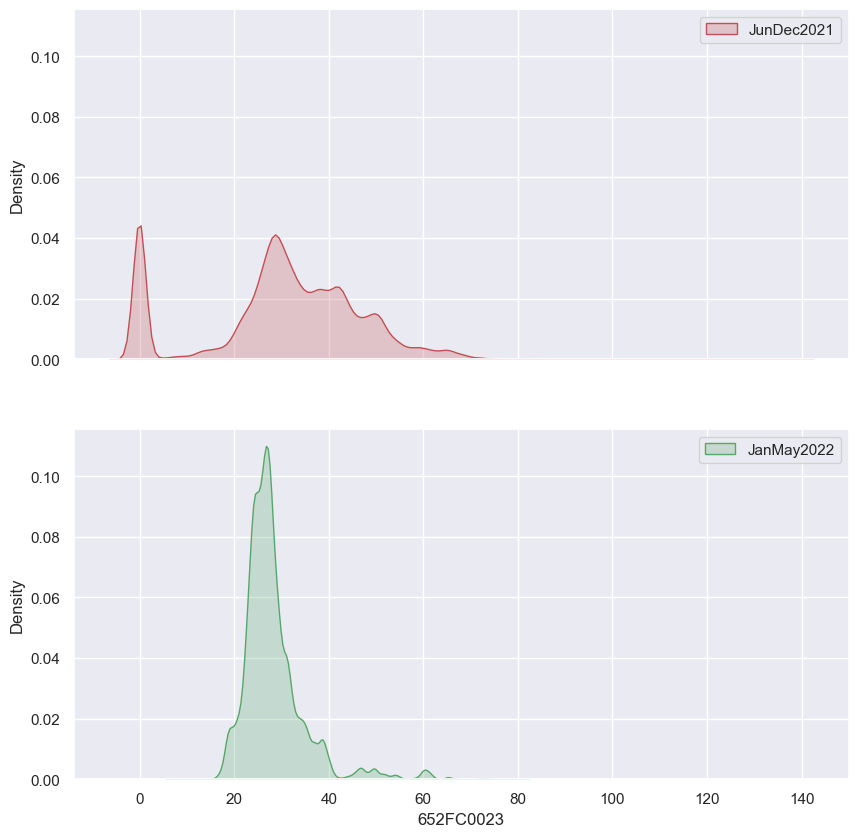

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC0023'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC0023'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

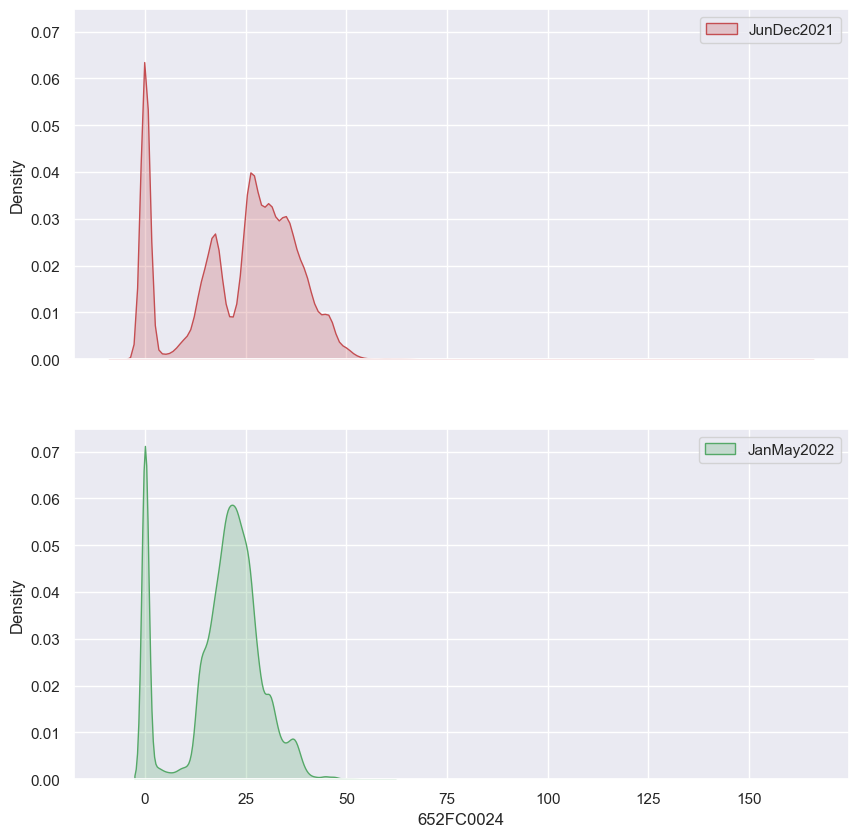

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC0024'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC0024'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

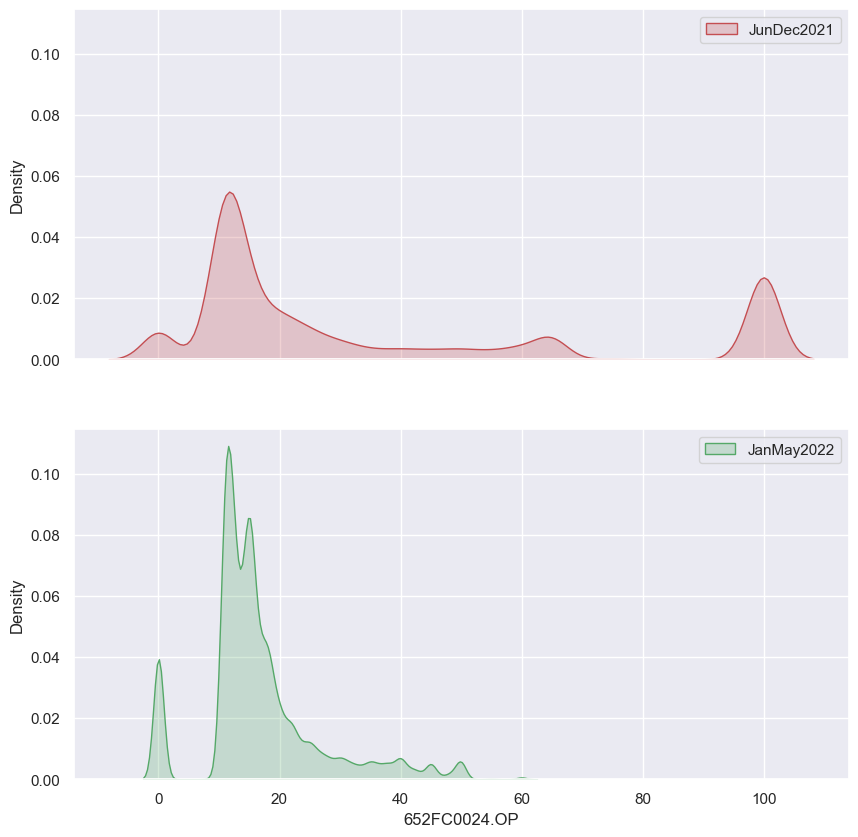

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC0024.OP'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC0024.OP'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

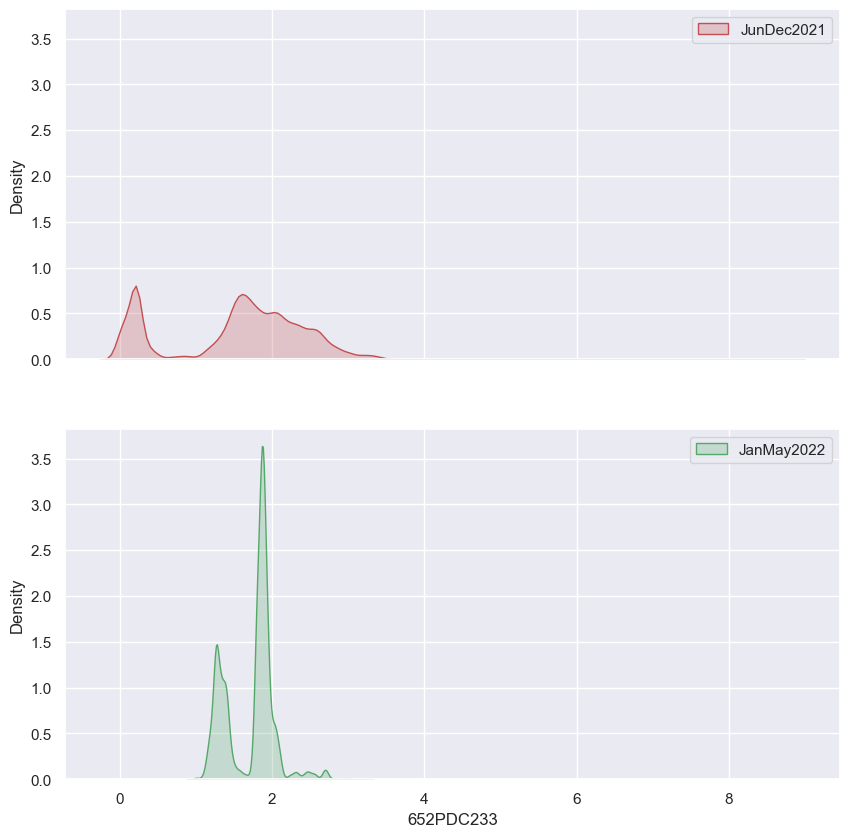

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652PDC233'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652PDC233'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

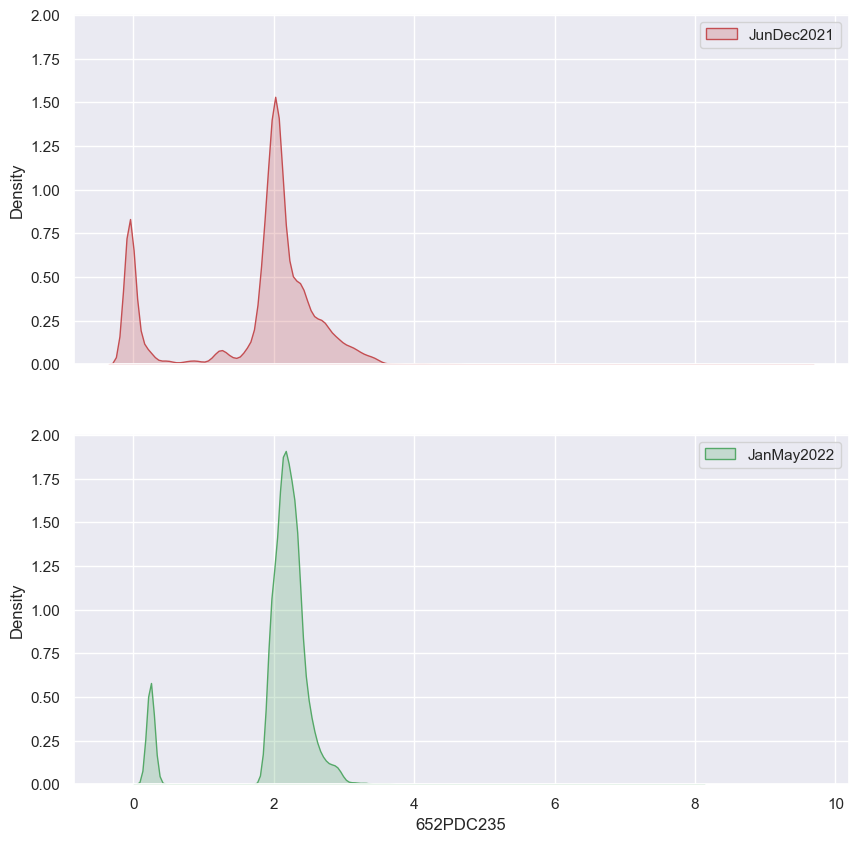

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652PDC235'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652PDC235'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

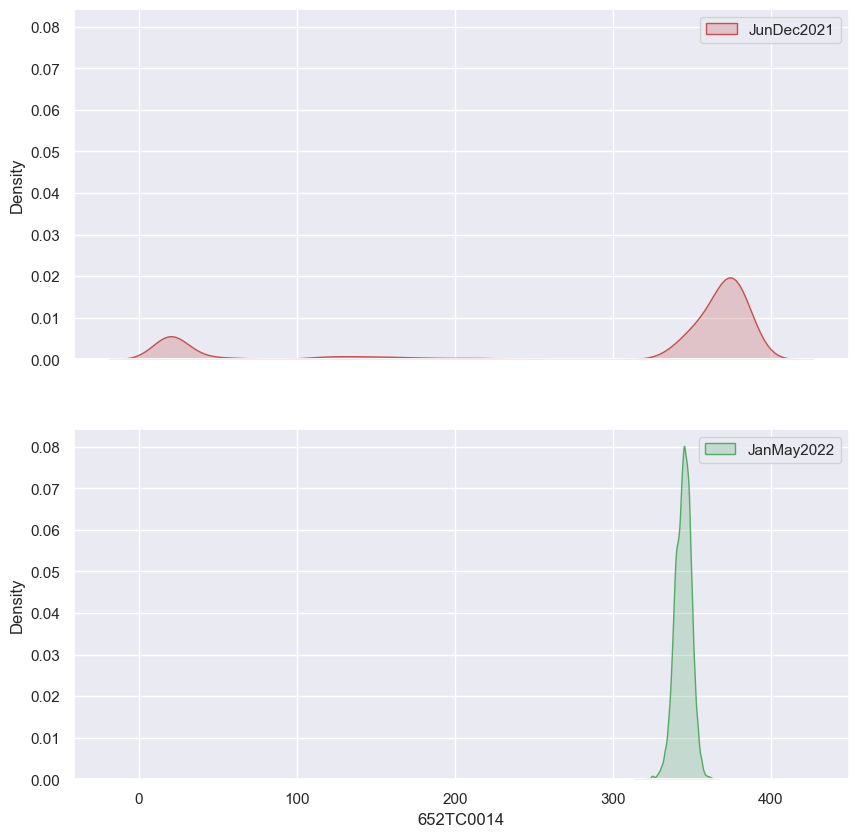

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TC0014'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TC0014'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

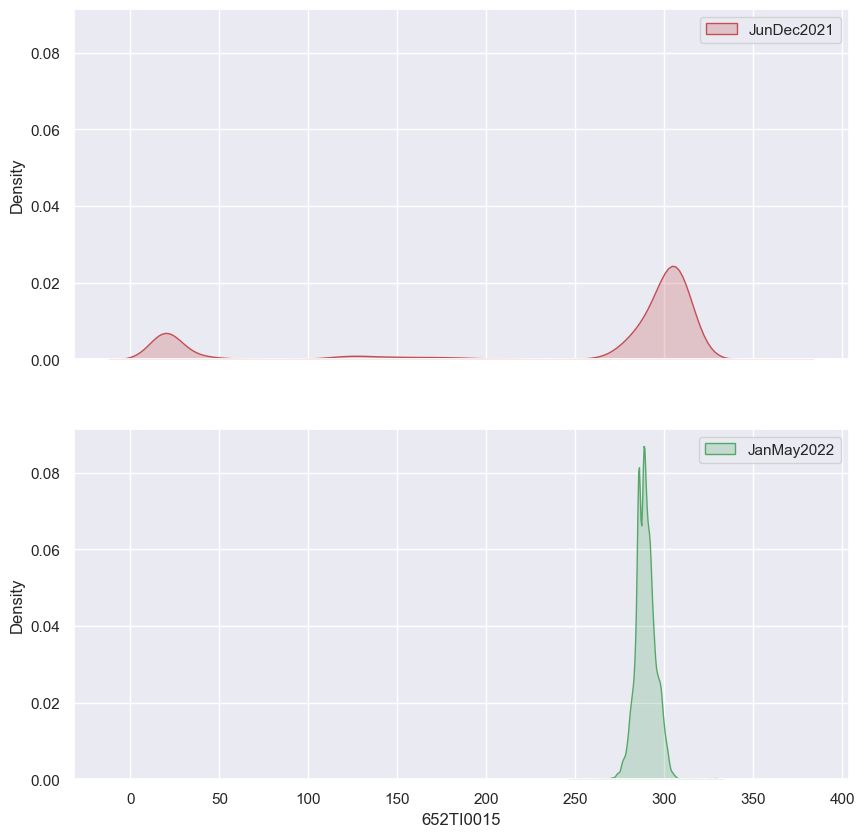

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TI0015'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TI0015'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

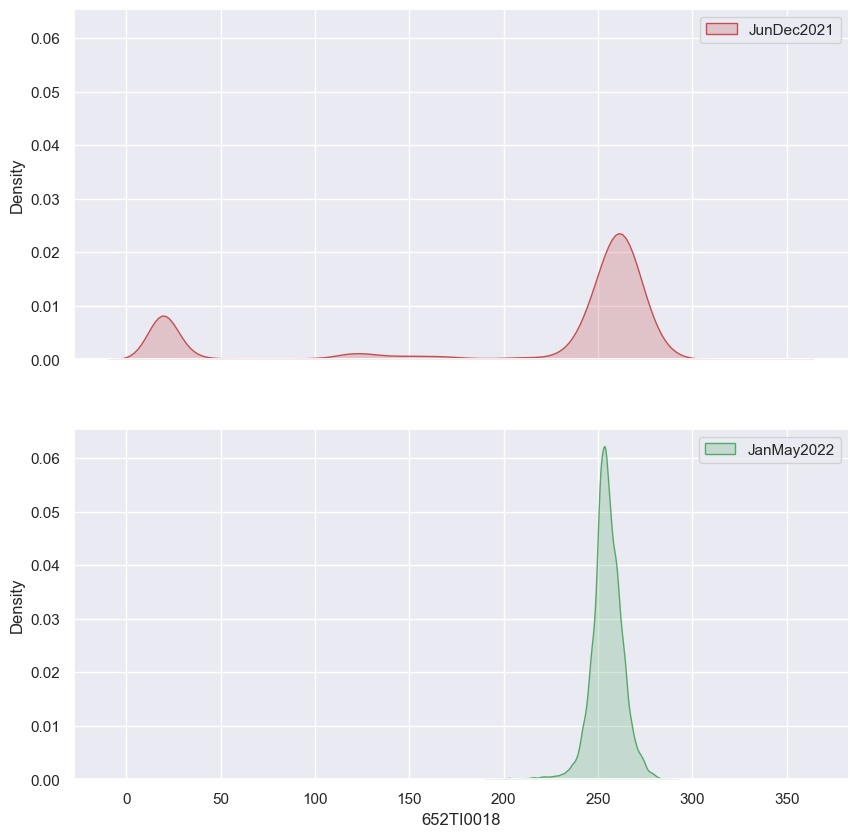

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TI0018'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TI0018'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

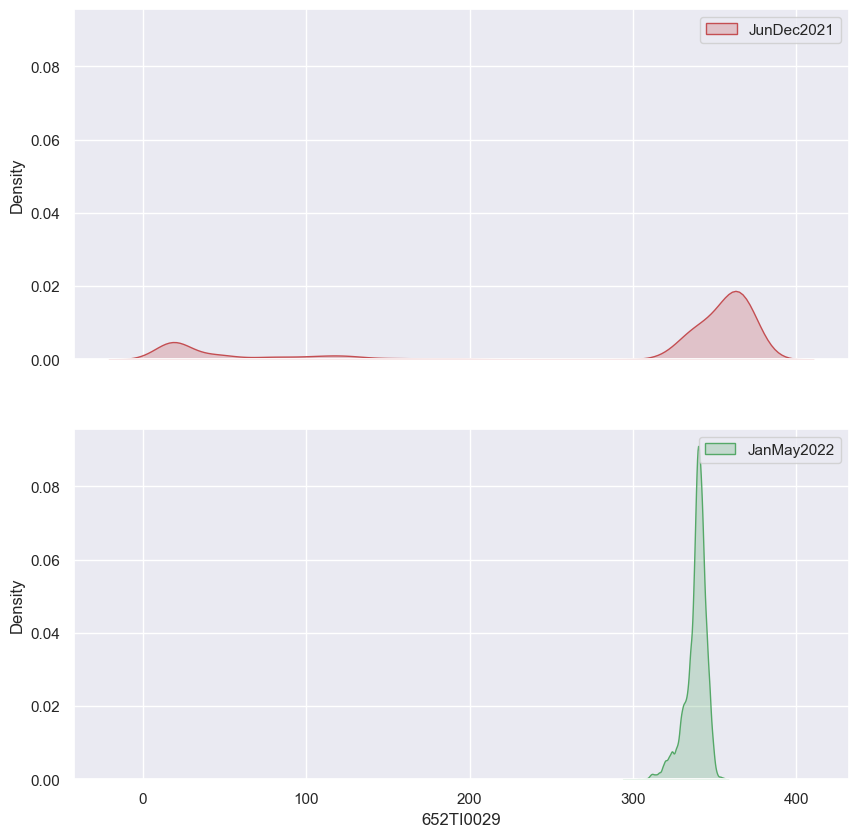

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TI0029'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TI0029'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

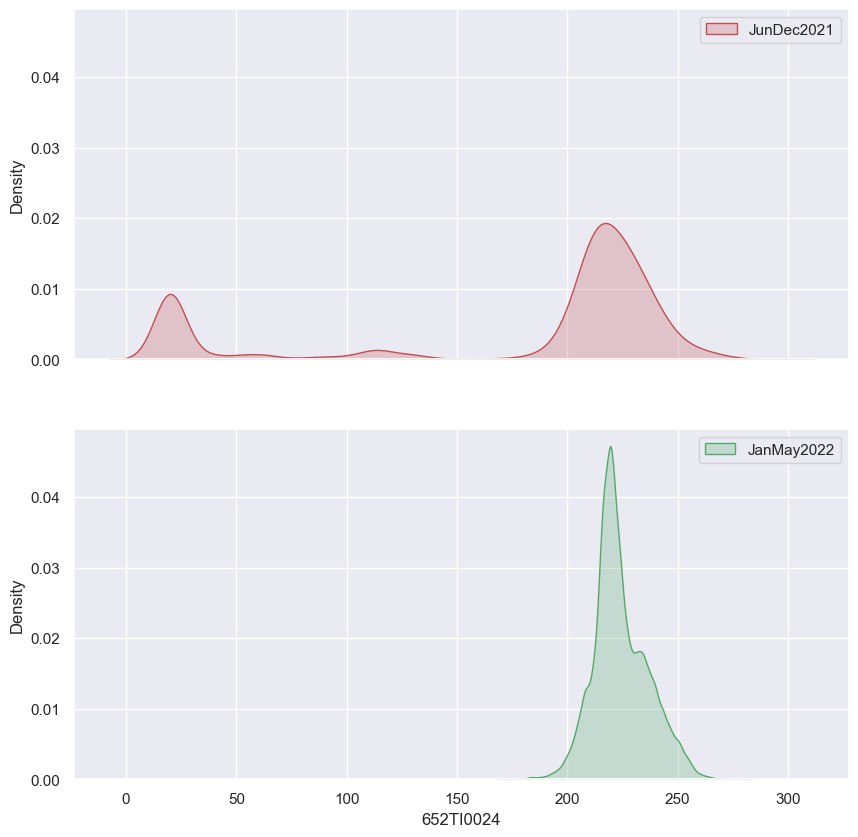

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TI0024'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TI0024'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

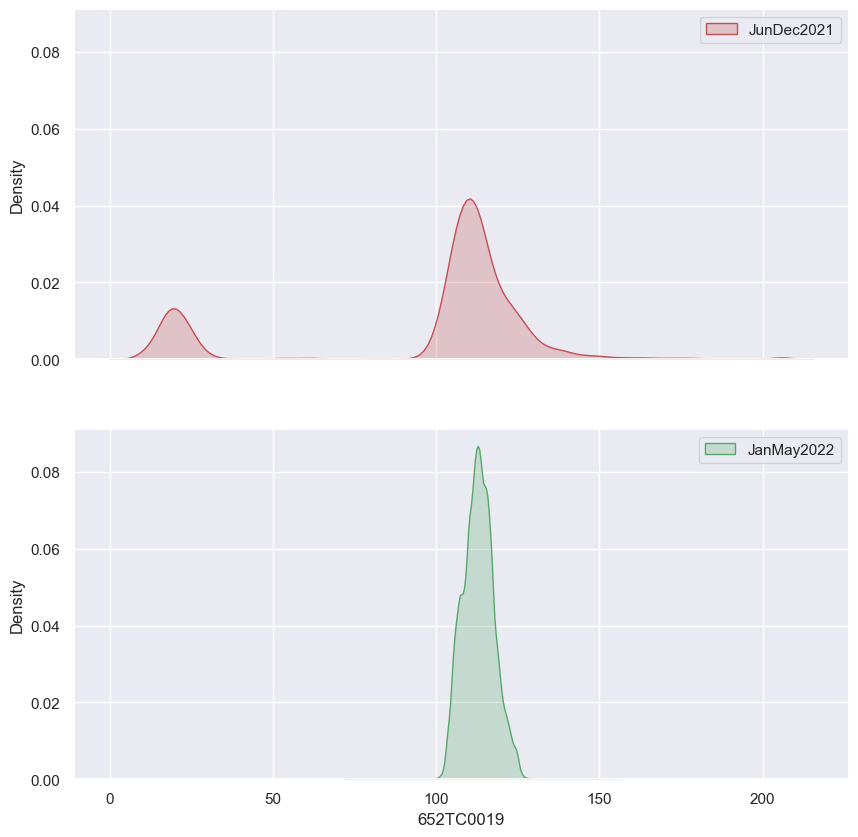

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652TI0170'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652TC0019'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

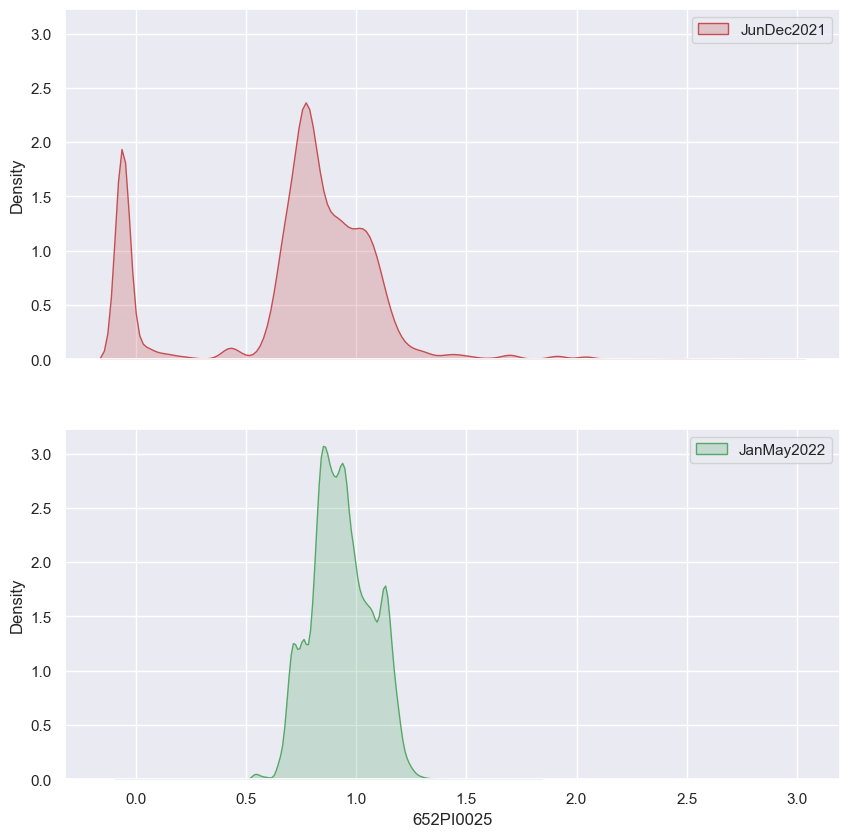

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652PI0025'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652PI0025'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

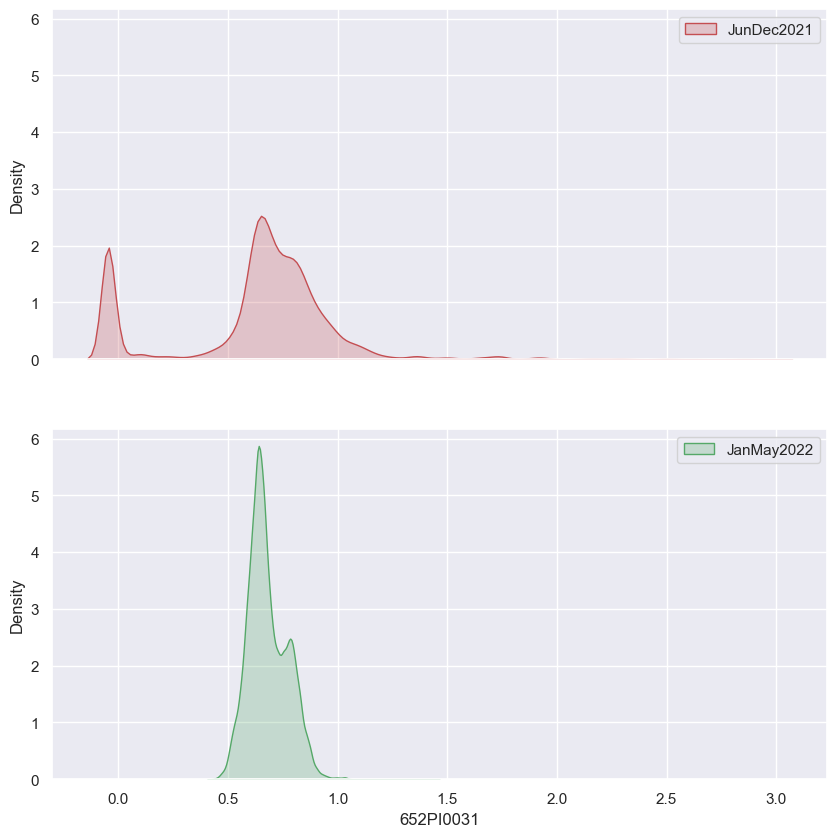

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652PI0031'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652PI0031'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

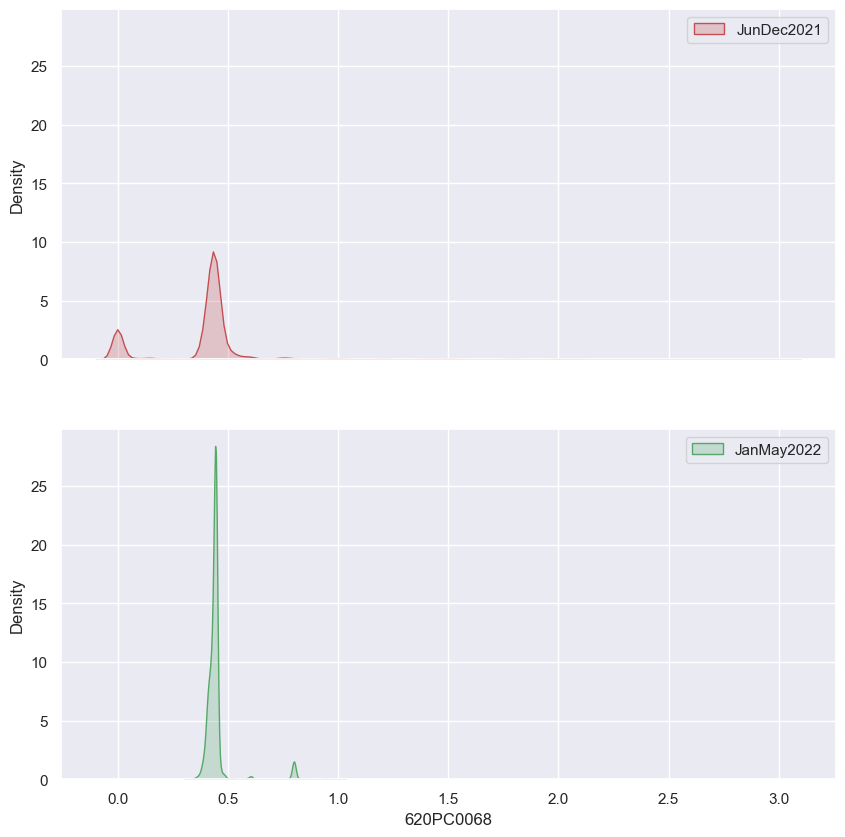

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['620PC0068'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['620PC0068'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

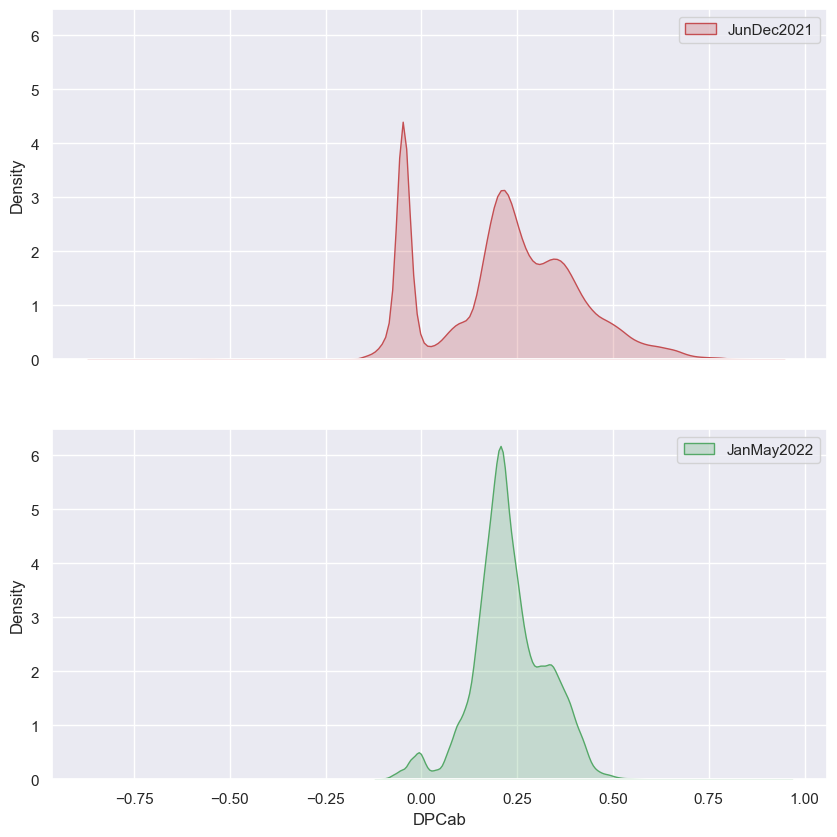

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['DPCab'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['DPCab'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

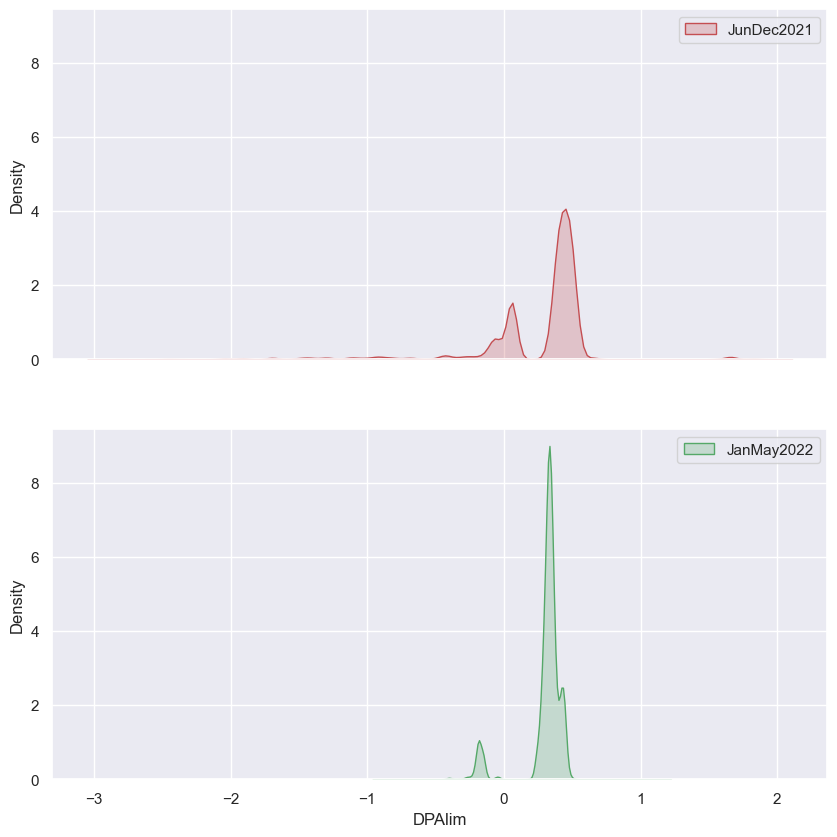

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['DPAlim'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['DPAlim'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

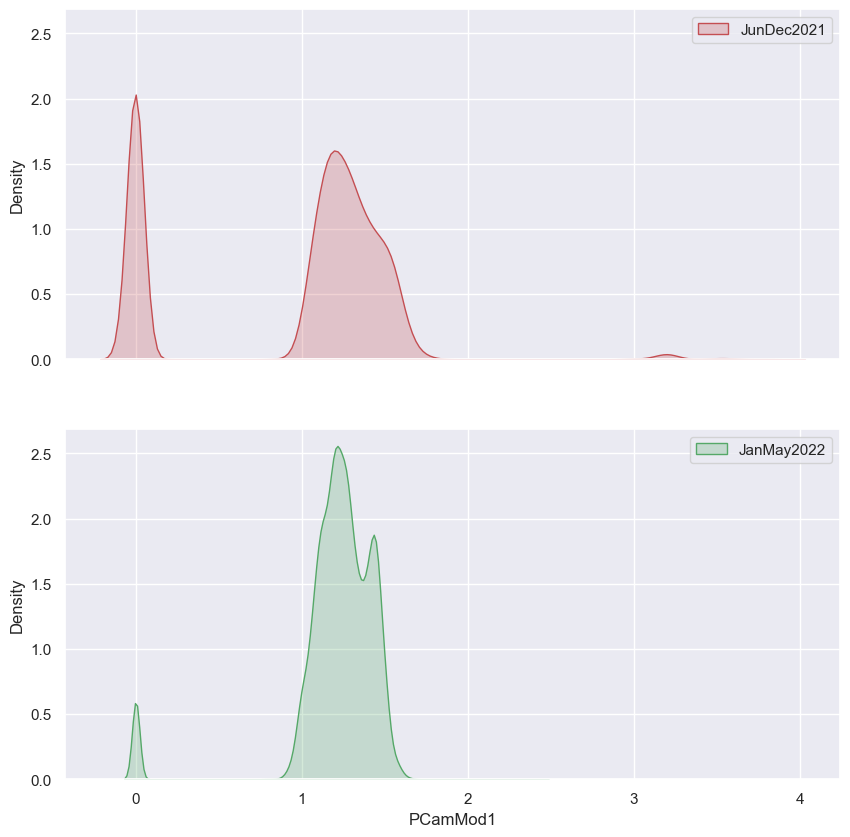

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['PCamMod1'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['PCamMod1'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

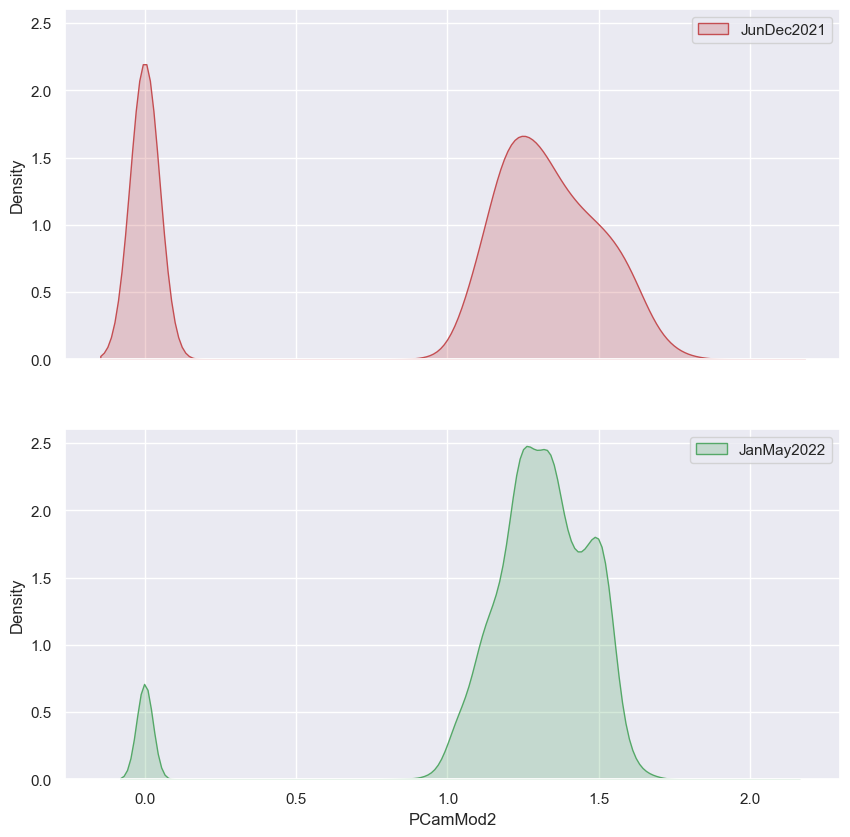

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['PCamMod2'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['PCamMod2'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

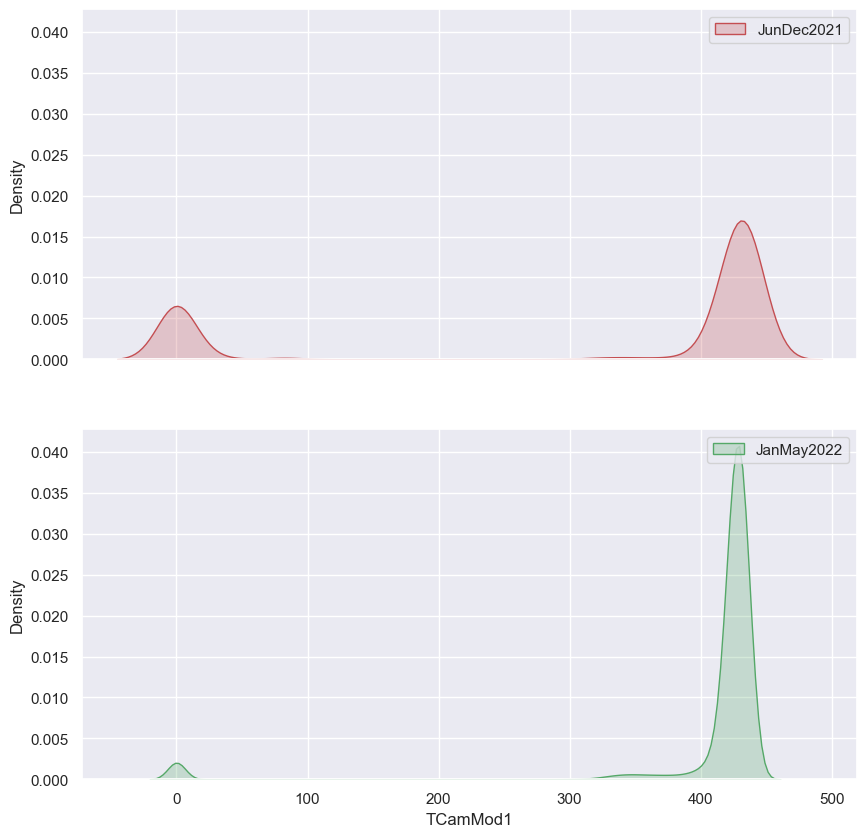

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['TCamMod1'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['TCamMod1'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

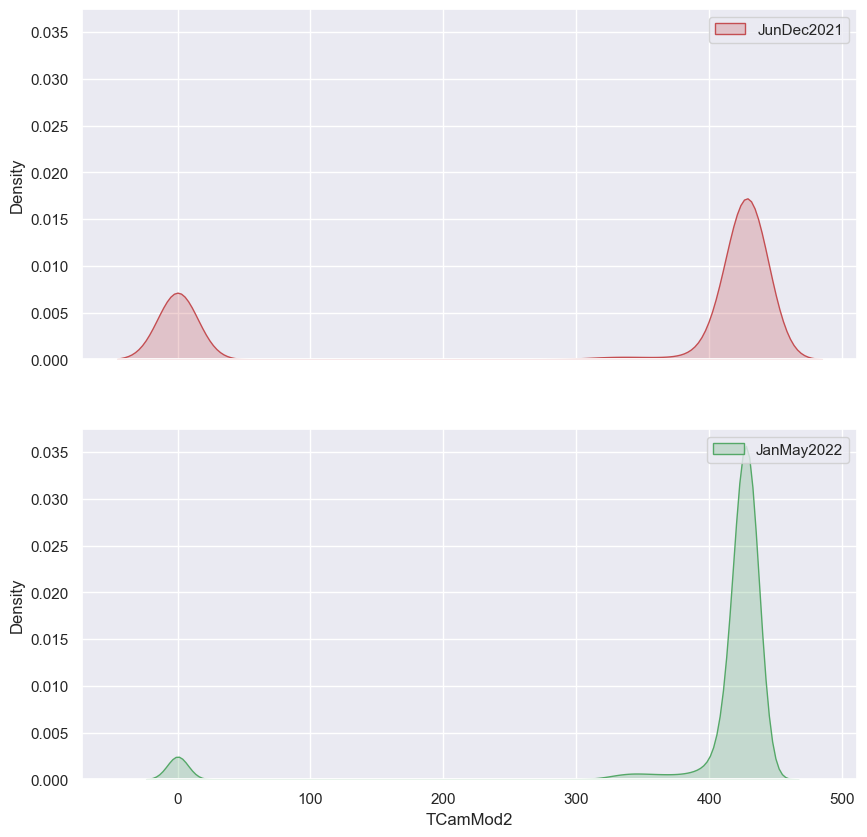

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['TCamMod2'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['TCamMod2'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

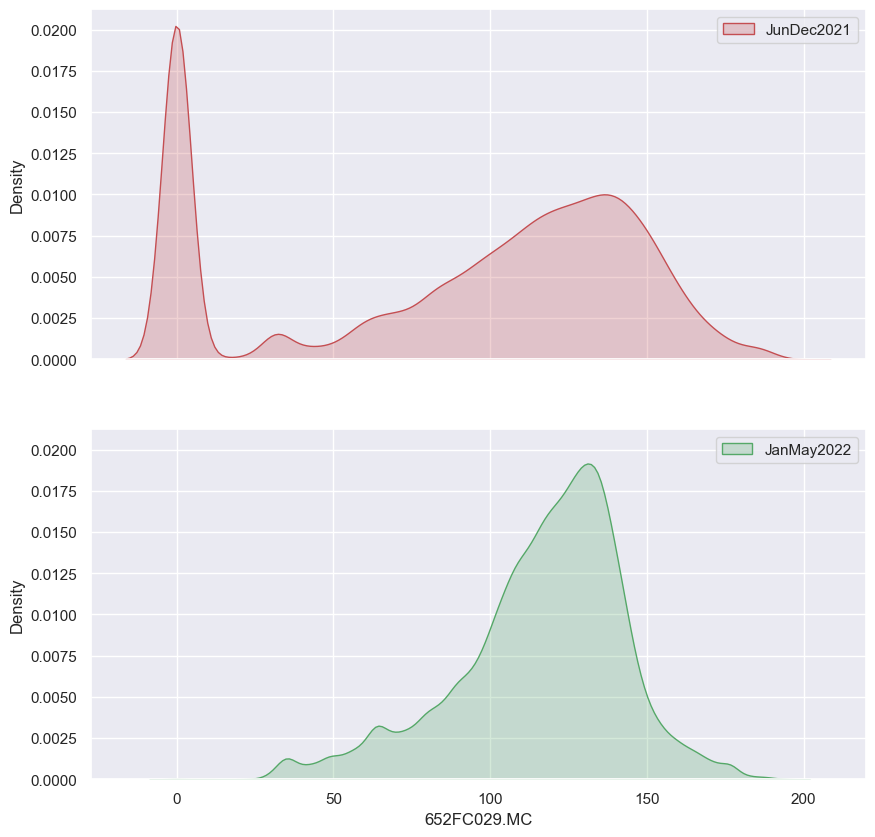

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC029.MC'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC029.MC'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

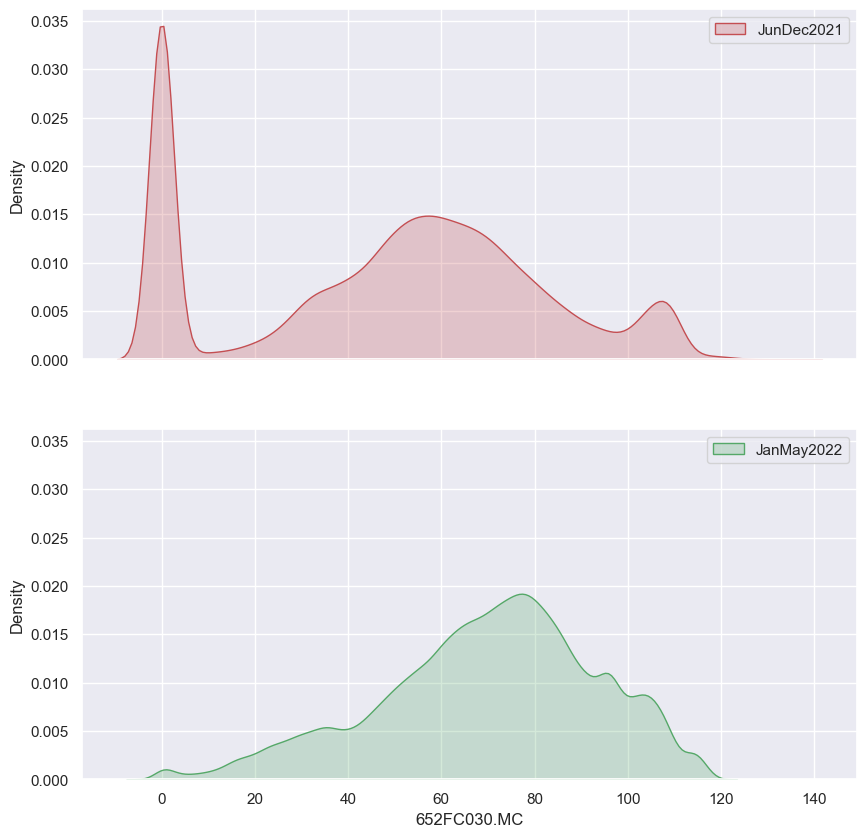

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC030.MC'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC030.MC'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

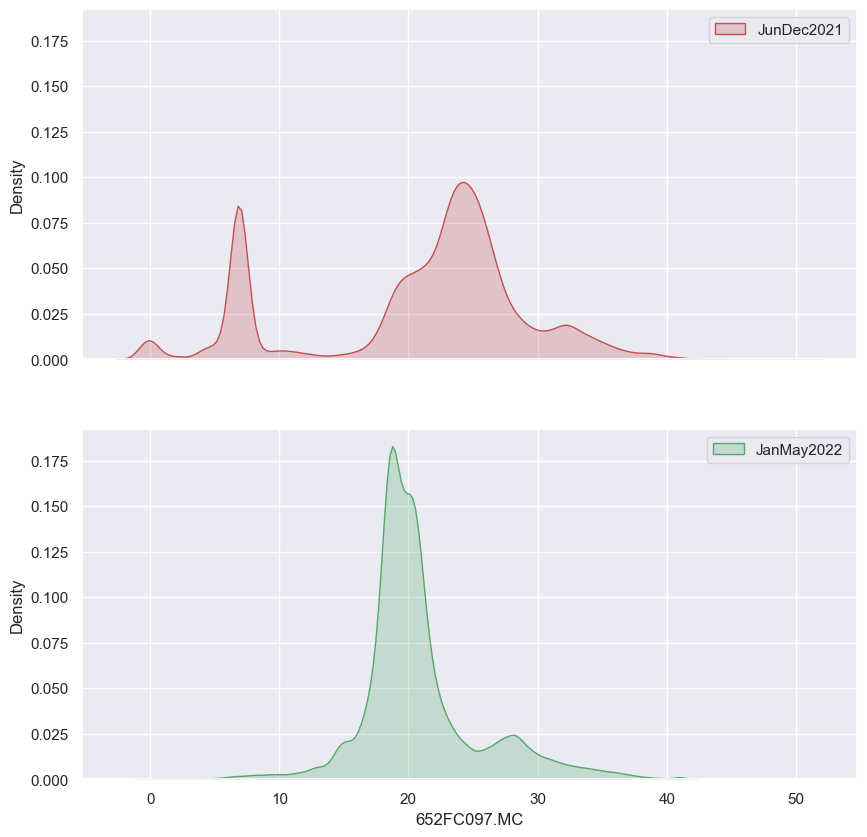

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC097.MC'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC097.MC'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

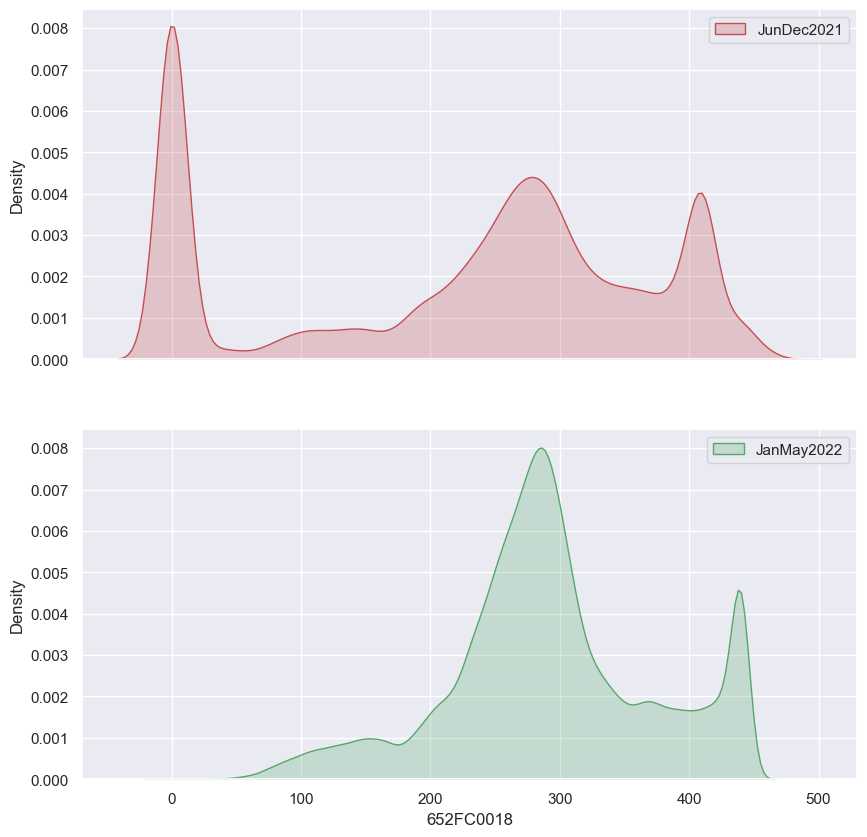

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652FC0018'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652FC0018'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

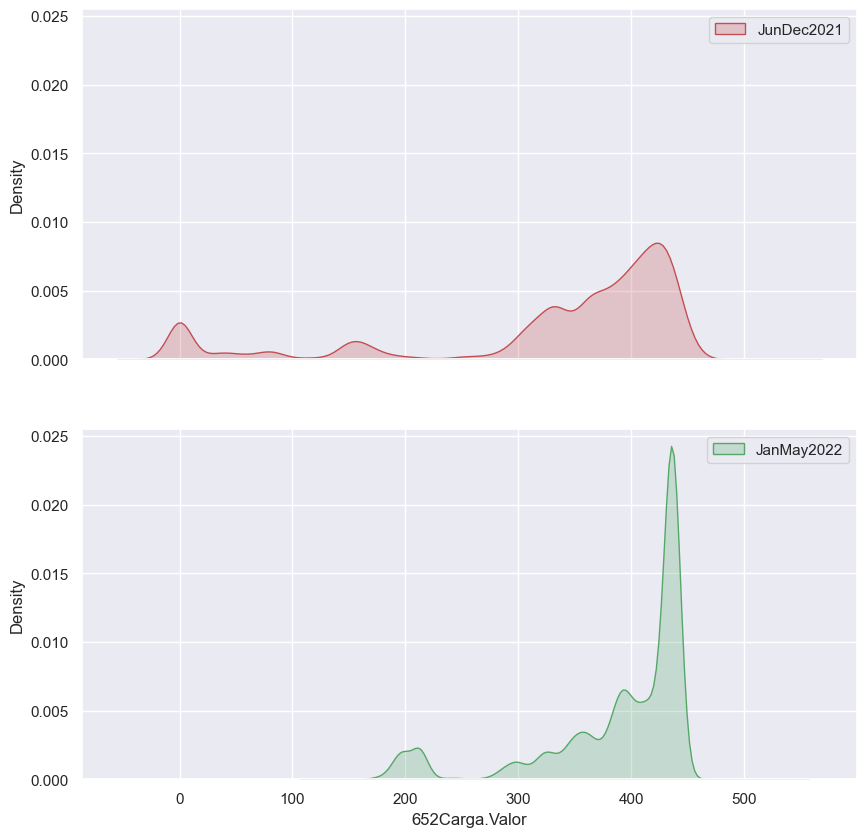

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df1['652Carga.Valor'], shade=True, color='r', label='JunDec2021', ax=ax[0])
fig = sns.kdeplot(df2['652Carga.Valor'], shade=True, color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

Los dos períodos son diferentes. El año 2021 se caracterizó por cargas contenidas post-COVID y adicionalmente la parada general que tuvieron a mitad del año. El 2022 fue un año bastante más normal en cuanto a condiciones de operación, elegiremos ese período para empezar y luego vemos si ampliamos con más datos del año 2022.

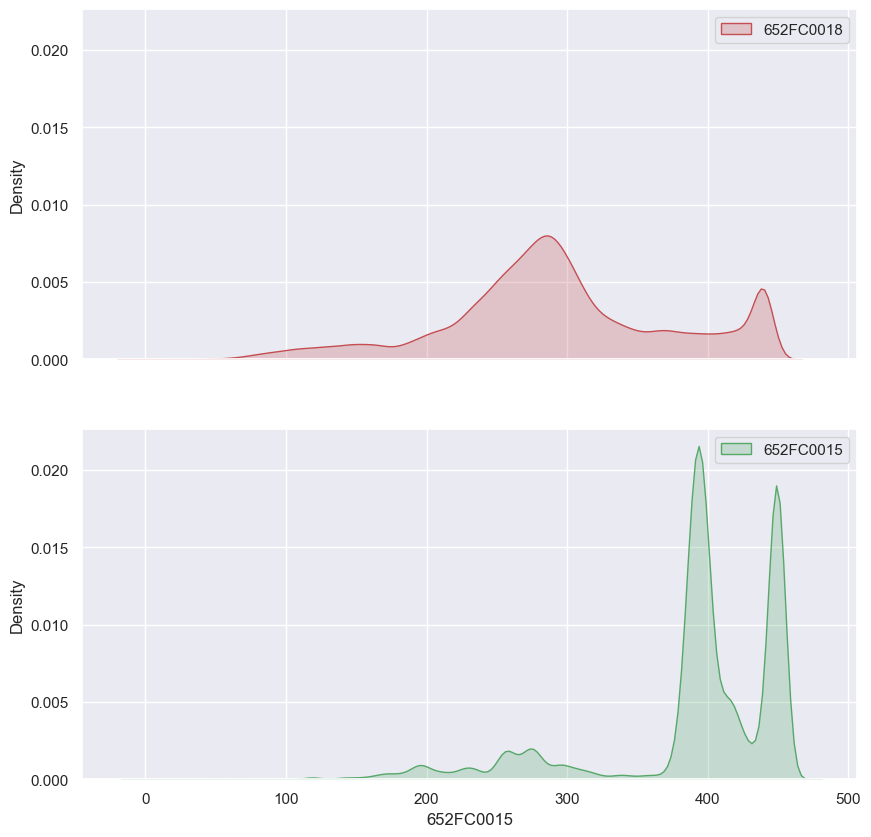

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df2['652FC0018'], shade=True, color='r', label='652FC0018', ax=ax[0])
fig = sns.kdeplot(df2['652FC0015'], shade=True, color='g', label='652FC0015', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

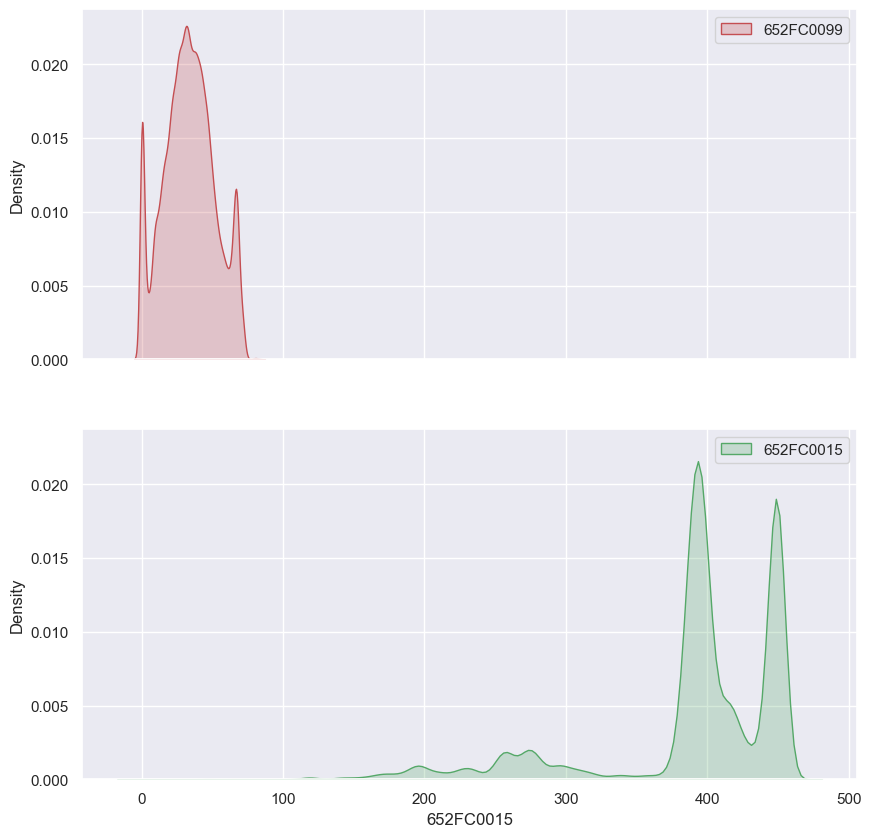

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True, sharey=True)

fig = sns.kdeplot(df2['652FC0099'], shade=True, color='r', label='652FC0099', ax=ax[0])
fig = sns.kdeplot(df2['652FC0015'], shade=True, color='g', label='652FC0015', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

## Visualiación de tendencias temporales.

In [59]:
df1.set_index(['Fecha'], inplace=True)
df2.set_index(['Fecha'], inplace=True)

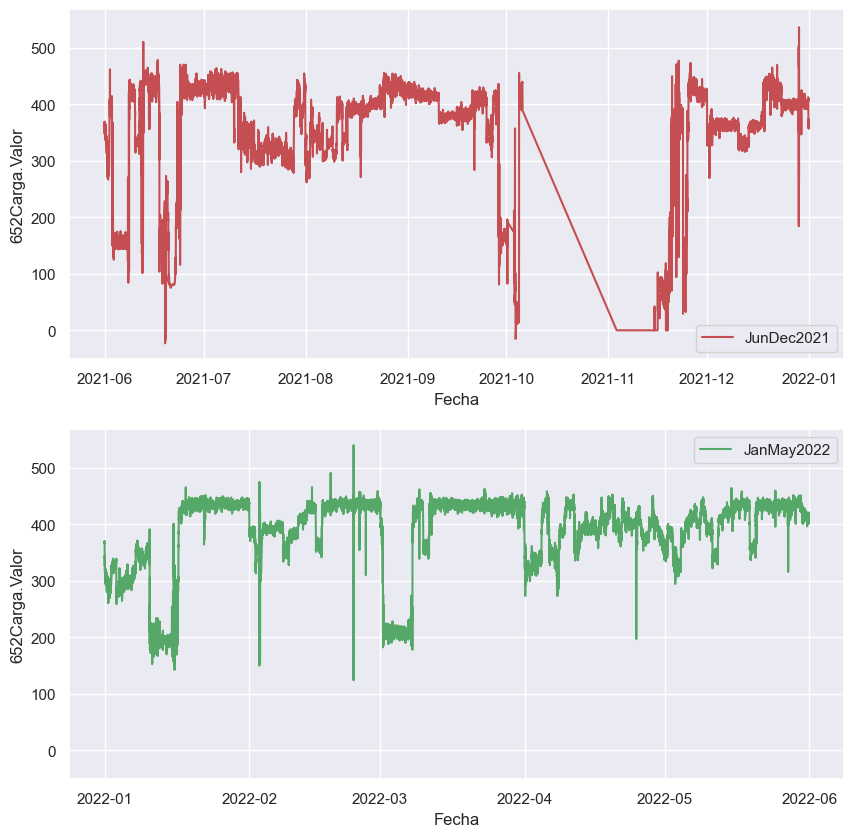

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharey=True)

fig = sns.lineplot(data=df1, x='Fecha', y='652Carga.Valor', color='r', label='JunDec2021', ax=ax[0])
fig = sns.lineplot(data=df2, x='Fecha', y='652Carga.Valor', color='g', label='JanMay2022', ax=ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

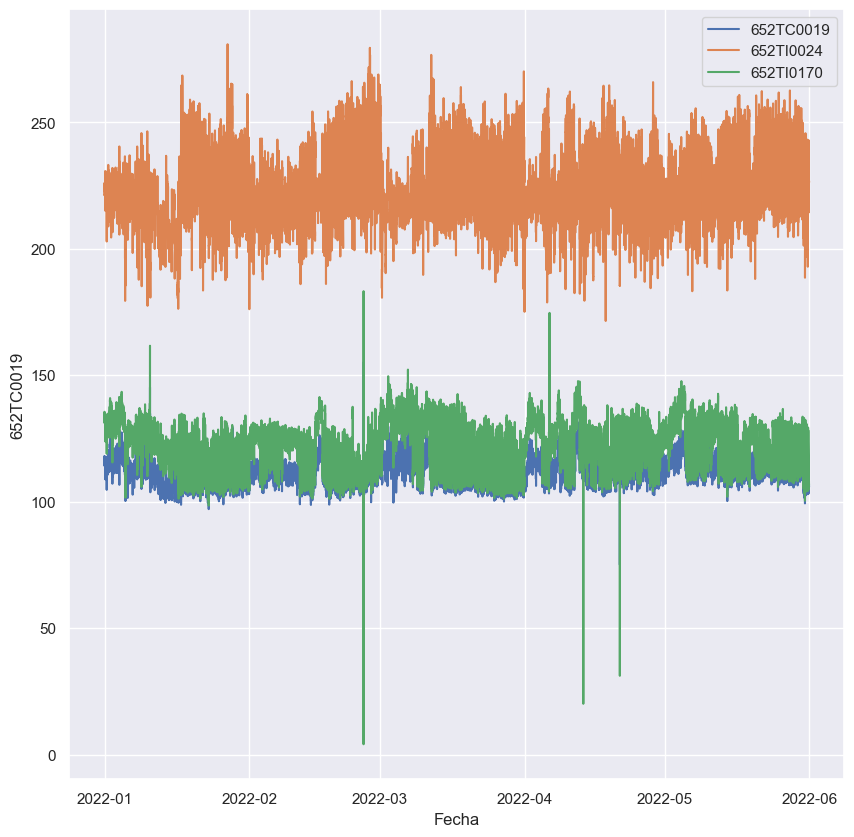

In [61]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2, x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=df2, x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=df2, x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

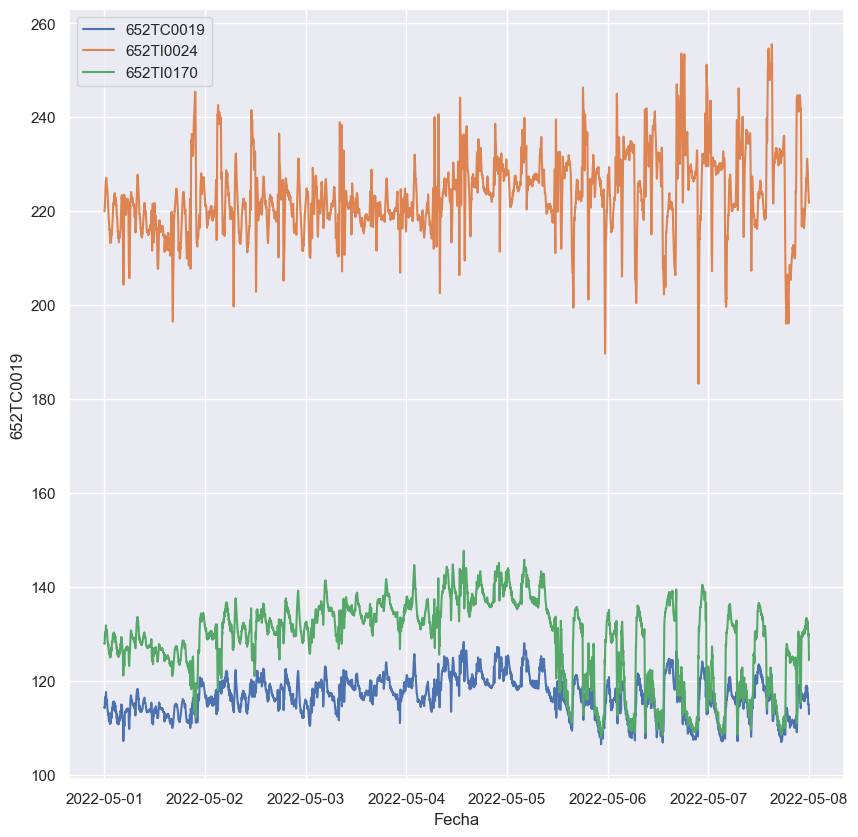

In [62]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

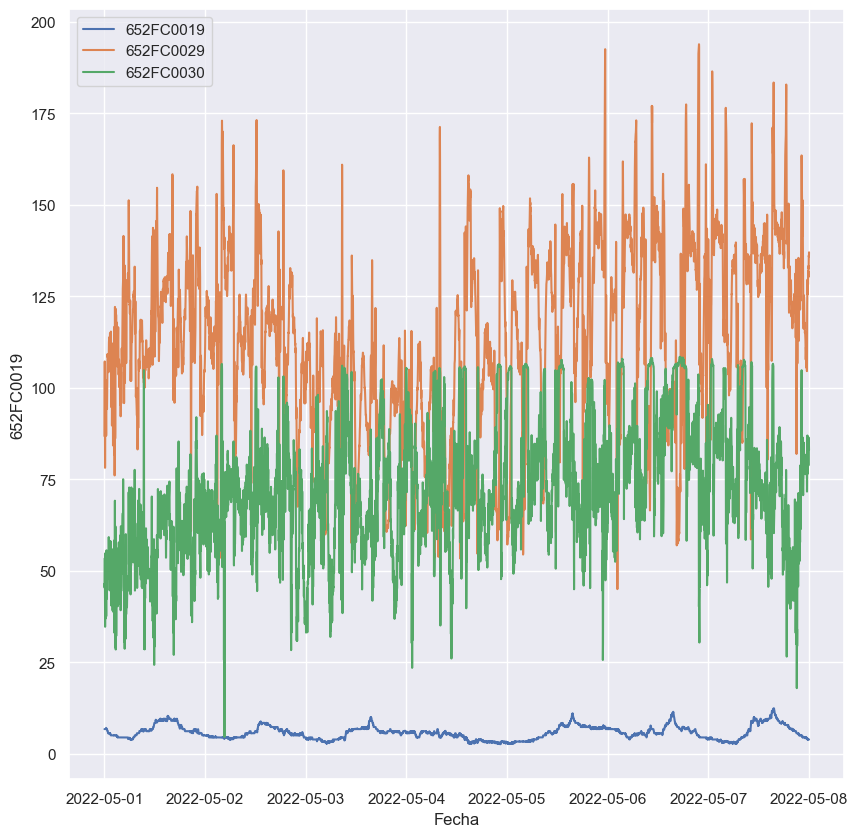

In [63]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652FC0019', label='652FC0019')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652FC029.MC', label='652FC0029')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-01') & (df2.index < '2022-05-08')], x='Fecha', y='652FC030.MC', label='652FC0030')
plt.legend()
plt.show()

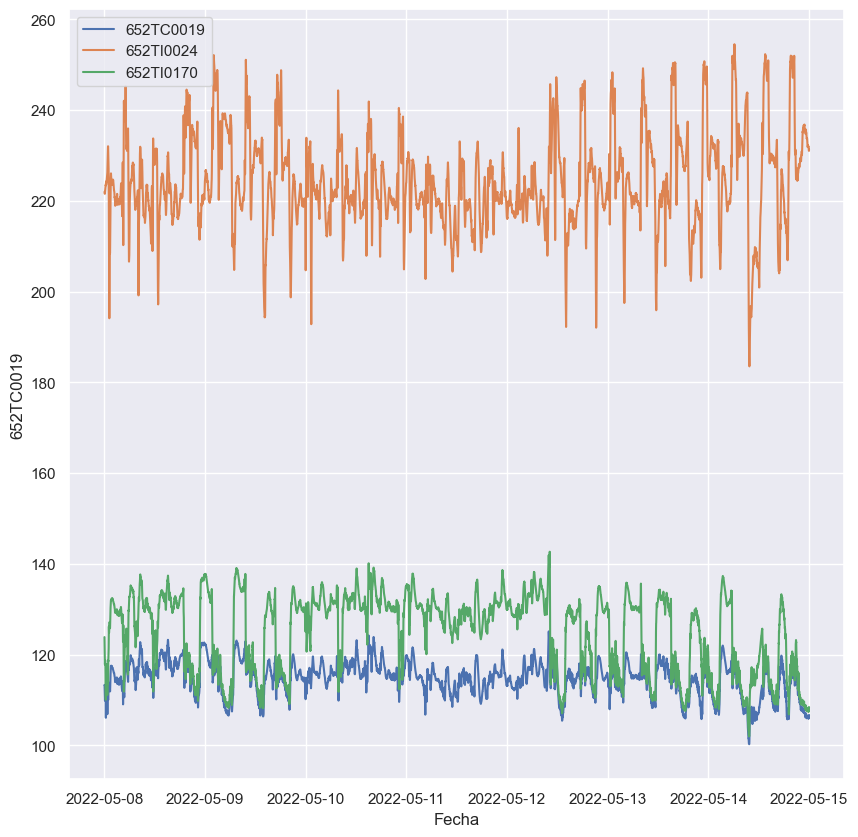

In [64]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-15')], x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-15')], x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-15')], x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

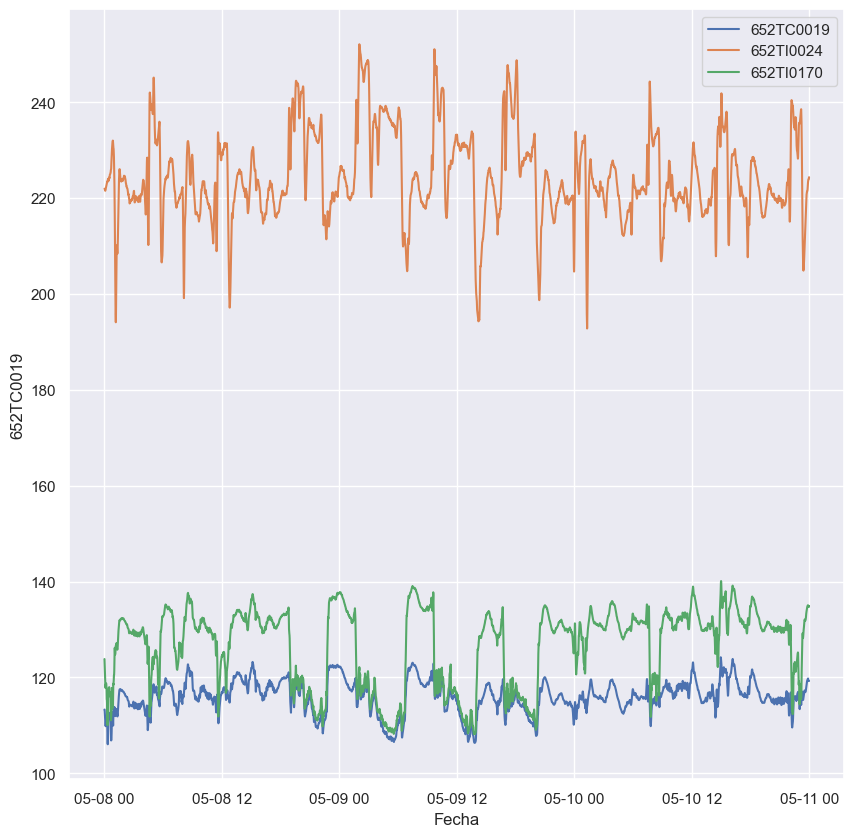

In [65]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

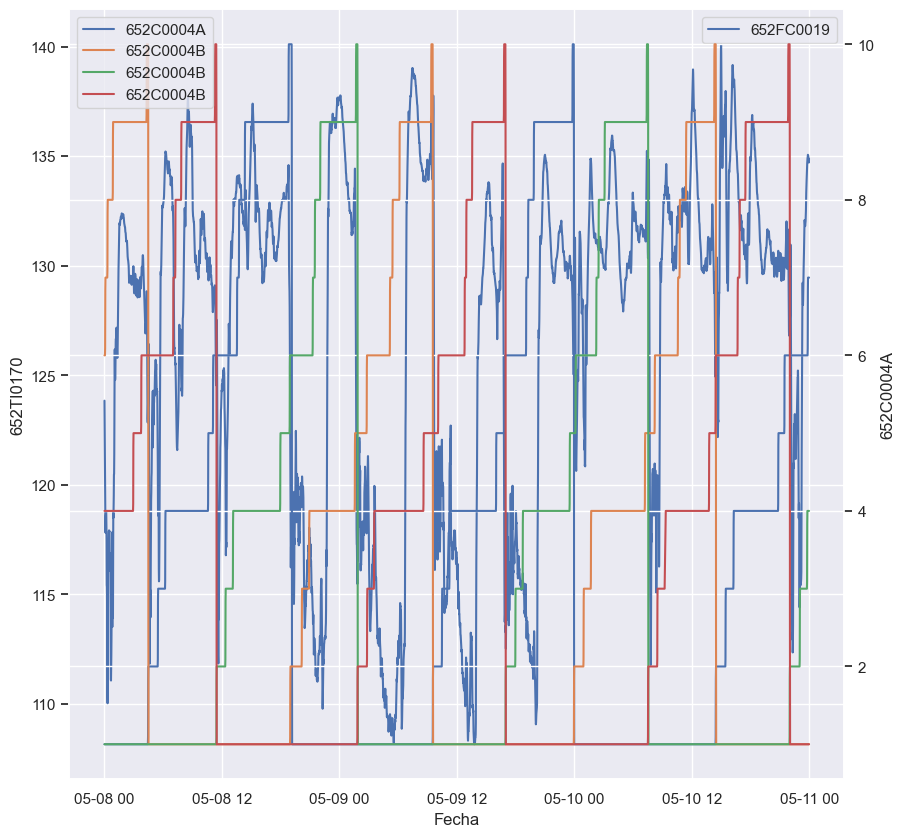

In [66]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652TI0170', label='652FC0019')
ax2 = plt.twinx()
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652C0004A', label='652C0004A', ax=ax2)
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652C0004B', label='652C0004B', ax=ax2)
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652C0005A', label='652C0004B', ax=ax2)
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652C0005B', label='652C0004B', ax=ax2)
plt.legend()
plt.show()

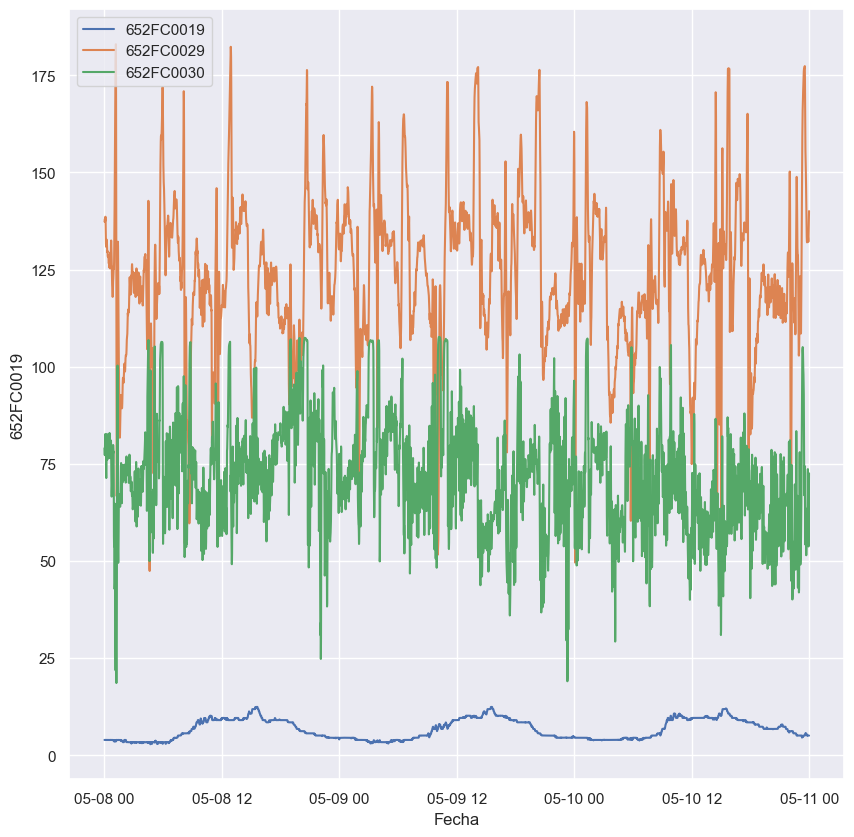

In [67]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652FC0019', label='652FC0019')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652FC029.MC', label='652FC0029')
sns.lineplot(data=df2.loc[(df2.index > '2022-05-08') & (df2.index < '2022-05-11')], x='Fecha', y='652FC030.MC', label='652FC0030')
plt.legend()
plt.show()

## Exploración con modelo de FB Prophet

In [68]:
def mean_absolute_percentage_error(y_true, y_pred):
    
    """ Calcula MAPE en función de los datos verdaderos y las predicciones """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

Creamos el conjunto de datos de train y de test. No entrenamos con todo el conjunto de datos cogemos únicamente el último mes del conjunto de datos de 2022 y ahí hacemos el split. 

In [69]:
train = df2.loc[(df2.index >= '2022-03-01') & (df2.index <= '2022-05-30')].copy()
test = df2.loc[(df2.index > '2022-05-30') & (df2.index < '2022-06-01')].copy()

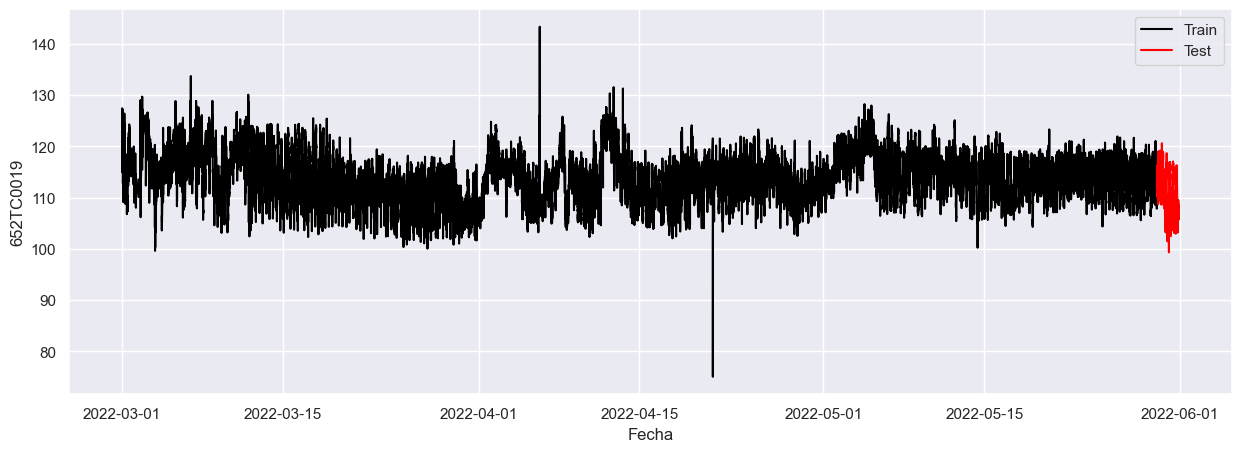

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

g_train = sns.lineplot(data=train, x='Fecha', y='652TC0019', color='black', label='Train', ax=ax)
g_test = sns.lineplot(data=test, x='Fecha', y='652TC0019', color='red', label='Test', ax=ax)
ax.legend()
#ax.axvline(test.index()[0])
plt.show()

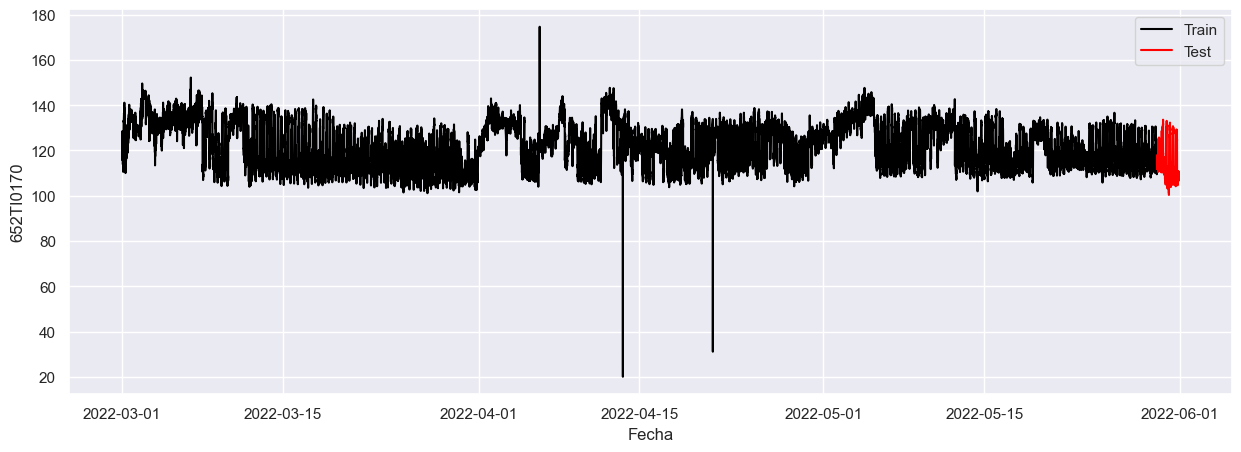

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

g_train = sns.lineplot(data=train, x='Fecha', y='652TI0170', color='black', label='Train', ax=ax)
g_test = sns.lineplot(data=test, x='Fecha', y='652TI0170', color='red', label='Test', ax=ax)
ax.legend()
#ax.axvline(test.index()[0])
plt.show()

In [72]:
prophet_train = train['652TI0170']
prophet_test = test['652TI0170']
prophet_train = prophet_train.reset_index().rename(columns={'Fecha':'ds', '652TI0170':'y'})
prophet_test = prophet_test.reset_index().rename(columns={'Fecha':'ds', '652TI0170':'y'})

In [73]:
prophet_train.head()

ds           y
0 2022-03-01 00:00:00+00:00  125.659624
1 2022-03-01 00:01:00+00:00  125.126835
2 2022-03-01 00:02:00+00:00  126.031824
3 2022-03-01 00:03:00+00:00  127.306709
4 2022-03-01 00:04:00+00:00  127.734781

In [74]:
prophet_train['ds'] = prophet_train['ds'].dt.tz_localize(None)
prophet_test['ds'] = prophet_test['ds'].dt.tz_localize(None)

In [75]:
model = Prophet()

model.fit(prophet_train)

17:48:17 - cmdstanpy - INFO - Chain [1] start processing
17:49:58 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
prophet_test_predictions = model.predict(prophet_test)

In [77]:
prophet_test_predictions.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2022-05-30 00:01:00  116.981647  106.765707  126.981073   116.981647   
1 2022-05-30 00:02:00  116.981412  106.628995  126.873312   116.981412   
2 2022-05-30 00:03:00  116.981178  106.445345  126.664909   116.981178   
3 2022-05-30 00:04:00  116.980943  107.327928  127.048232   116.980943   
4 2022-05-30 00:05:00  116.980709  106.946767  127.286859   116.980709   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   116.981647       -0.208358             -0.208358             -0.208358   
1   116.981412       -0.206128             -0.206128             -0.206128   
2   116.981178       -0.204022             -0.204022             -0.204022   
3   116.980943       -0.202040             -0.202040             -0.202040   
4   116.980709       -0.200183             -0.200183             -0.200183   

      daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper  \
0  0.923610     0.923610     0.923610 -1.131968     -1.131968     -1.131968   
1  0.926100     0.926100     0.926100 -1.132228     -1.132228     -1.132228   
2  0.928464     0.928464     0.928464 -1.132486     -1.132486     -1.132486   
3  0.930704     0.930704     0.930704 -1.132744     -1.132744     -1.132744   
4  0.932818     0.932818     0.932818 -1.133001     -1.133001     -1.133001   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  116.773289  
1                         0.0  116.775284  
2                         0.0  116.777156  
3                         0.0  116.778903  
4                         0.0  116.780526

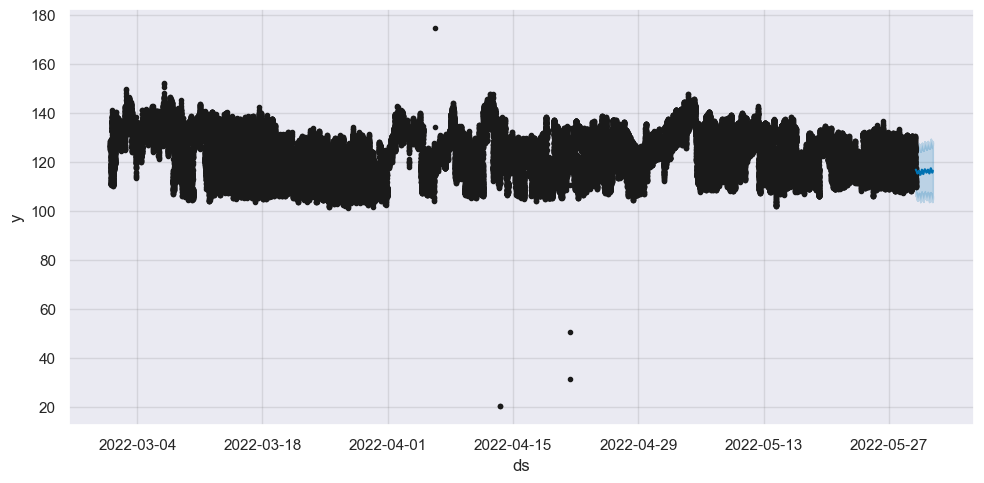

In [78]:
fig, ax = plt.subplots(figsize=(10,5))

fig = model.plot(prophet_test_predictions, ax=ax)
plt.show()

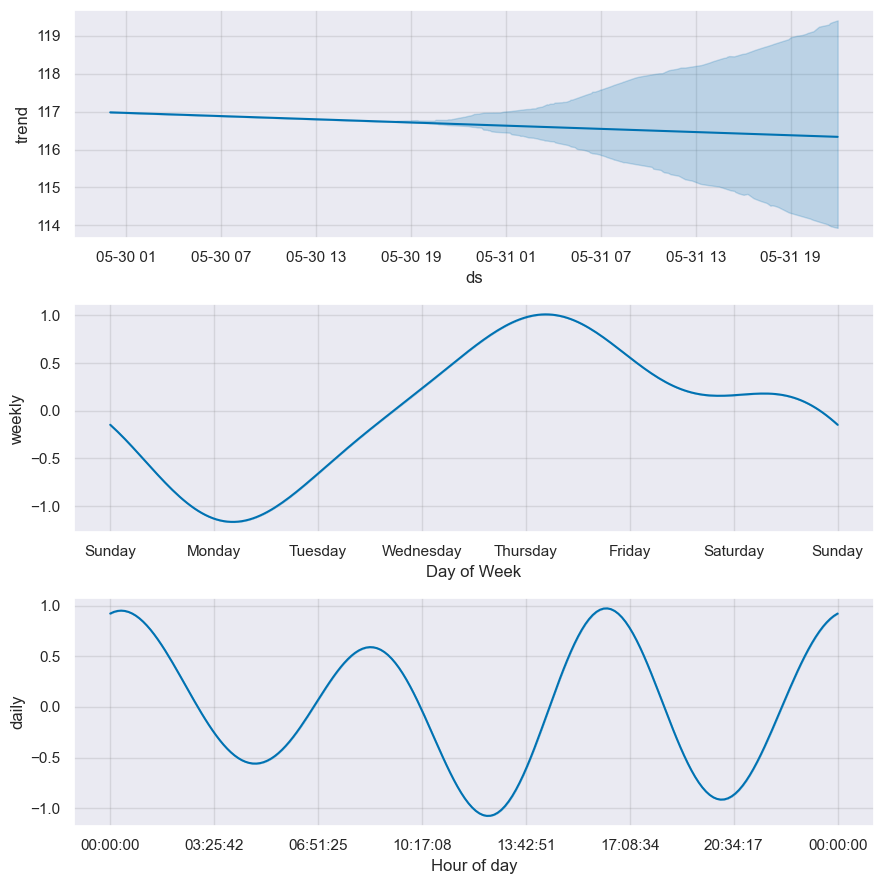

In [79]:
model.plot_components(prophet_test_predictions)
plt.show()

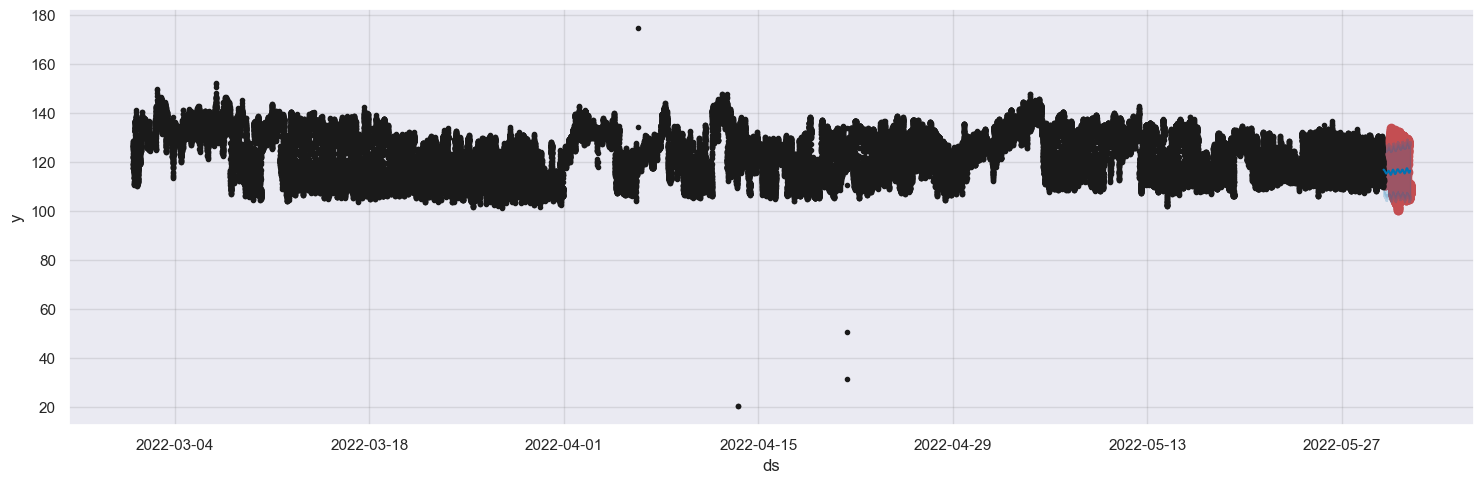

In [80]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test.index, test['652TI0170'], color='r')
fig = model.plot(prophet_test_predictions, ax=ax)
plt.show()

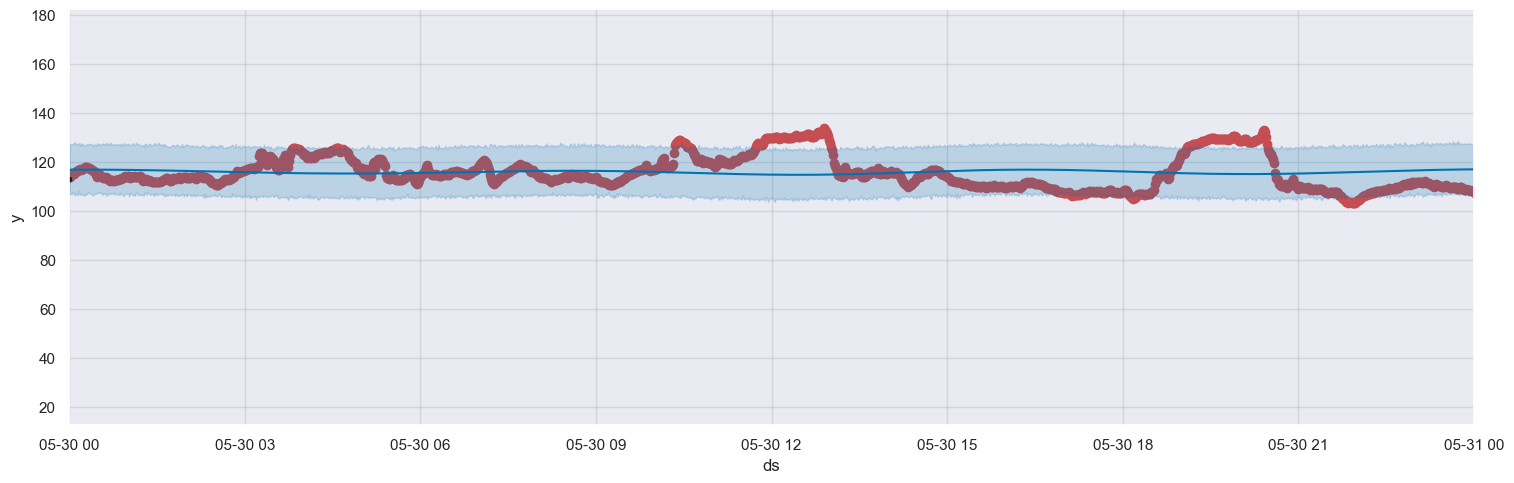

In [81]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test.index, test['652TI0170'], color='r')
fig = model.plot(prophet_test_predictions, ax=ax)
ax.set_xlim([pd.to_datetime('2022-05-30', format = '%Y-%m-%d'),
             pd.to_datetime('2022-05-31', format = '%Y-%m-%d')])
plt.show()

In [82]:
np.mean(mean_squared_error(y_true=test['652TI0170'], y_pred=prophet_test_predictions['yhat']))

67.4703187765408

In [83]:
mean_absolute_error(y_true=test['652TI0170'], y_pred=prophet_test_predictions['yhat'])

7.168858435982225

In [84]:
mean_absolute_percentage_error(y_true=test['652TI0170'], y_pred=prophet_test_predictions['yhat'])

6.173474706002039

## Modelo usando NeuralProphet

Usamos el mismo conjunto de datos que hemos usado con Prophet. En este caso el modelo ofrece algunas funcionalidades más avanzadas.

In [85]:
prophet_train = prophet_train.fillna(method='ffill', axis=0)
prophet_test = prophet_test.fillna(method='ffill', axis=0)

In [86]:
prophet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129601 entries, 0 to 129600
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      129601 non-null  datetime64[ns]
 1   y       129601 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


In [87]:
prophet_train.shape

(129601, 2)

In [88]:
model_np = NeuralProphet(n_forecasts=15, n_lags=30, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=True)

model_np.fit(prophet_train, freq='T')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 54


Finding best initial lr:   0%|          | 0/277 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE        RMSE      Loss  RegLoss  epoch
0   175.354736  220.711456  0.766871      0.0      0
1    81.133667  102.673599  0.243930      0.0      1
2    40.971714   50.427834  0.068430      0.0      2
3    18.214203   22.484056  0.012922      0.0      3
4    12.625944   15.356545  0.005990      0.0      4
5    10.464393   12.742331  0.004205      0.0      5
6     7.669717    9.548411  0.002401      0.0      6
7     4.920236    6.452217  0.001105      0.0      7
8     3.098733    4.521390  0.000543      0.0      8
9     2.462784    3.785290  0.000389      0.0      9
10    2.307926    3.544864  0.000350      0.0     10
11    2.312039    3.503760  0.000342      0.0     11
12    2.315971    3.480067  0.000338      0.0     12
13    2.309127    3.461307  0.000335      0.0     13
14    2.285107    3.434355  0.000329      0.0     14
15    2.305628    3.447633  0.000332      0.0     15
16    2.292112    3.425986  0.000329      0.0     16
17    2.298001    3.424302  0.000328      0.0     17
18    2.234172    3.367869  0.000318      0.0     18
19    2.241260    3.374174  0.000318      0.0     19
20    2.253095    3.382120  0.000320      0.0     20
21    2.204230    3.336165  0.000312      0.0     21
22    2.214928    3.342576  0.000313      0.0     22
23    2.176266    3.312985  0.000307      0.0     23
24    2.160709    3.295977  0.000304      0.0     24
25    2.174945    3.305813  0.000306      0.0     25
26    2.136412    3.267915  0.000300      0.0     26
27    2.113748    3.250994  0.000296      0.0     27
28    2.091697    3.235745  0.000294      0.0     28
29    2.100385    3.241408  0.000294      0.0     29
30    2.061275    3.204181  0.000289      0.0     30
31    2.040485    3.193542  0.000286      0.0     31
32    2.015669    3.172026  0.000282      0.0     32
33    2.003531    3.161700  0.000281      0.0     33
34    2.001467    3.159794  0.000280      0.0     34
35    1.993694    3.153486  0.000279      0.0     35
36    1.965504    3.133752  0.000276      0.0     36
37    1.956041    3.124174  0.000274      0.0     37
38    1.935559    3.106031  0.000271      0.0     38
39    1.913792    3.090114  0.000269      0.0     39
40    1.899890    3.075171  0.000267      0.0     40
41    1.889250    3.076364  0.000266      0.0     41
42    1.872088    3.061834  0.000264      0.0     42
43    1.853783    3.044863  0.000262      0.0     43
44    1.835799    3.034845  0.000260      0.0     44
45    1.836966    3.034693  0.000260      0.0     45
46    1.829232    3.030195  0.000259      0.0     46
47    1.816984    3.021400  0.000257      0.0     47
48    1.803406    3.007217  0.000256      0.0     48
49    1.795488    3.008048  0.000255      0.0     49
50    1.787144    3.003665  0.000254      0.0     50
51    1.784173    2.997962  0.000254      0.0     51
52    1.777357    2.995204  0.000253      0.0     52
53    1.775522    2.997212  0.000253      0.0     53

In [89]:
y_pred_np = model_np.predict(prophet_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T


Predicting: 1013it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [90]:
y_pred_np

ds           y       yhat1       yhat2       yhat3  \
0    2022-05-30 00:01:00  113.684152         NaN         NaN         NaN   
1    2022-05-30 00:02:00  114.525213         NaN         NaN         NaN   
2    2022-05-30 00:03:00  114.938722         NaN         NaN         NaN   
3    2022-05-30 00:04:00  115.081096         NaN         NaN         NaN   
4    2022-05-30 00:05:00  115.145742         NaN         NaN         NaN   
...                  ...         ...         ...         ...         ...   
2753 2022-05-31 21:54:00  106.898352  107.383011  107.642181  107.869072   
2754 2022-05-31 21:55:00  107.006422  107.466835  107.441910  107.890129   
2755 2022-05-31 21:56:00  107.199340  107.500580  107.574318  107.316643   
2756 2022-05-31 21:57:00  107.247946  107.850449  107.542938  107.612503   
2757 2022-05-31 21:58:00  107.023653  107.845116  107.752304  107.577499   

           yhat4       yhat5       yhat6       yhat7       yhat8  ...  \
0            NaN         NaN         NaN         NaN         NaN  ...   
1            NaN         NaN         NaN         NaN         NaN  ...   
2            NaN         NaN         NaN         NaN         NaN  ...   
3            NaN         NaN         NaN         NaN         NaN  ...   
4            NaN         NaN         NaN         NaN         NaN  ...   
...          ...         ...         ...         ...         ...  ...   
2753  107.870377  107.645126  107.758499  108.166878  108.330437  ...   
2754  107.958618  107.742279  107.764534  107.766846  108.208786  ...   
2755  107.833878  108.197136  107.910400  107.755043  107.969841  ...   
2756  107.178345  107.850029  107.909355  107.850334  107.545464  ...   
2757  107.640144  107.301193  107.767784  108.171463  107.916435  ...   

            ar8        ar9       ar10       ar11       ar12       ar13  \
0           NaN        NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN        NaN   
2           NaN        NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN        NaN   
4           NaN        NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
2753  81.761360  81.487396  81.781975  81.703072  81.940773  81.816154   
2754  81.637283  81.799278  81.588478  81.452095  81.616753  81.942848   
2755  81.395935  81.556824  81.679565  81.611679  81.620941  81.695236   
2756  80.969147  81.229866  81.466476  81.707634  81.686897  81.690445   
2757  81.337738  81.328354  81.346573  81.674232  81.748337  81.583496   

           ar14       ar15      trend  season_daily  
0           NaN        NaN        NaN           NaN  
1           NaN        NaN        NaN           NaN  
2           NaN        NaN        NaN           NaN  
3           NaN        NaN        NaN           NaN  
4           NaN        NaN        NaN           NaN  
...         ...        ...        ...           ...  
2753  81.602684  81.495270  26.469204      0.099878  
2754  81.819275  81.639610  26.469177      0.102323  
2755  81.960747  81.798126  26.469154      0.104758  
2756  81.568428  81.917328  26.469130      0.107182  
2757  81.652054  81.760475  26.469105      0.109594  

[2758 rows x 34 columns]

In [91]:
y_pred_np = y_pred_np.dropna(how='any', axis=0)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


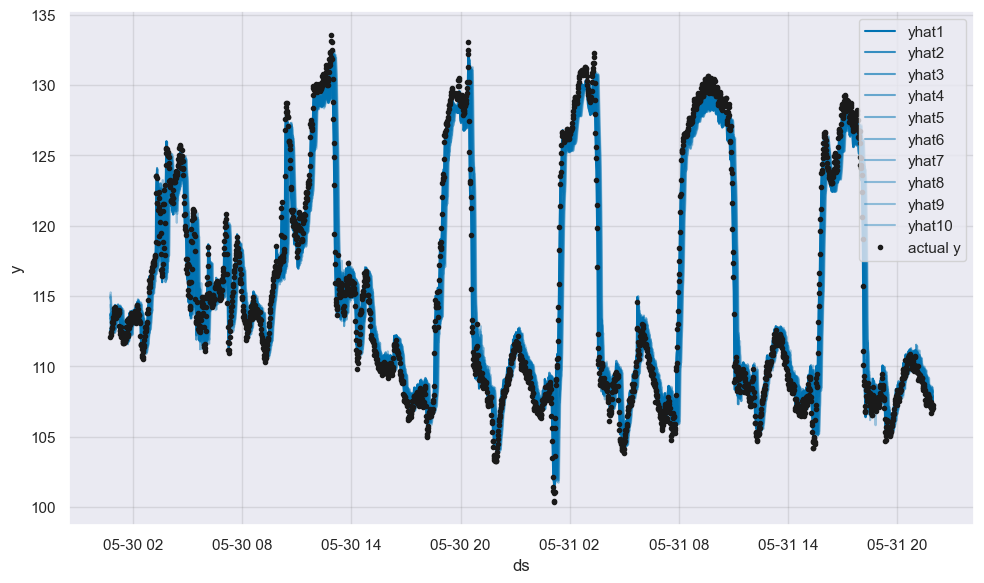

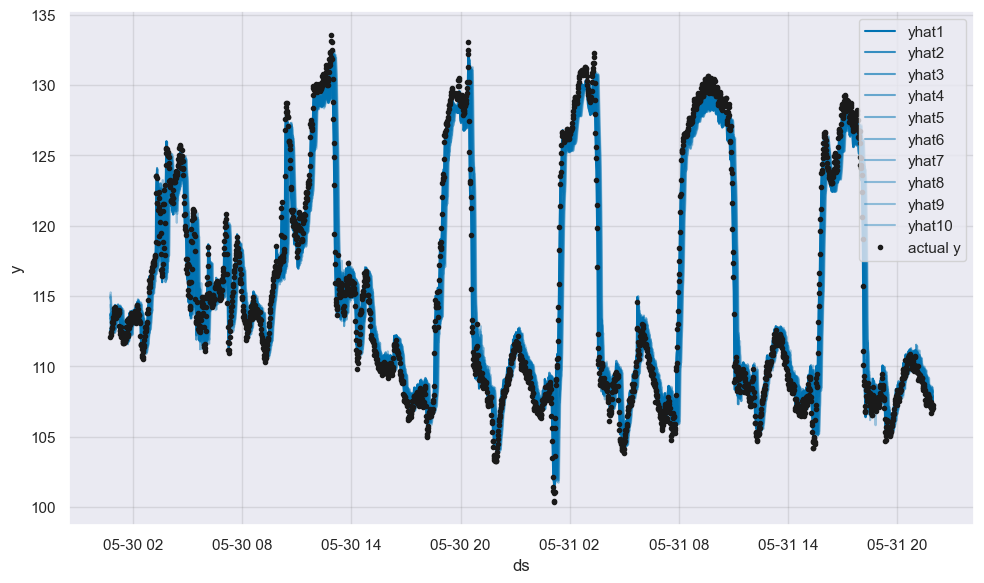

In [92]:
#model_np.set_plotting_backend('plotly')
model_np.plot(y_pred_np)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


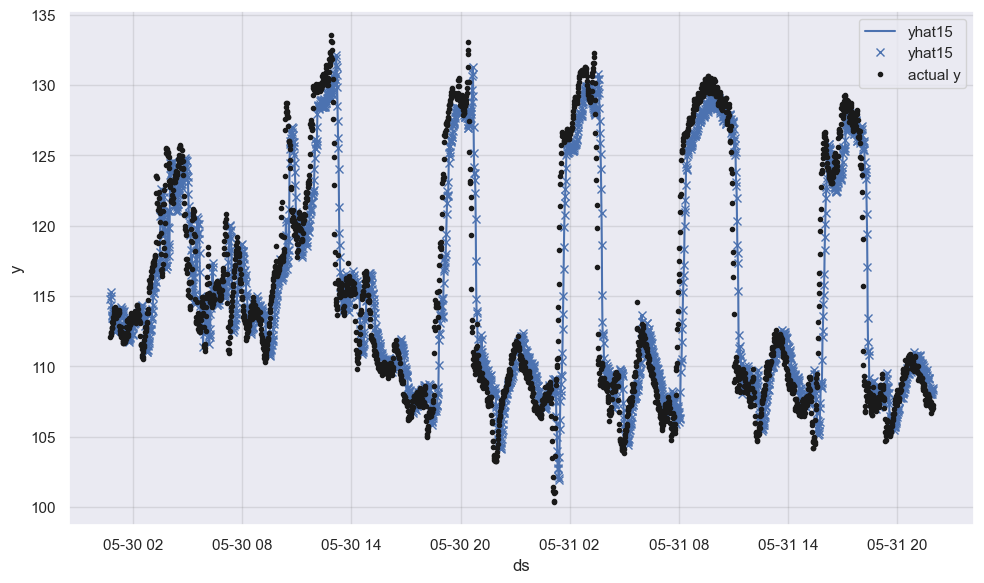

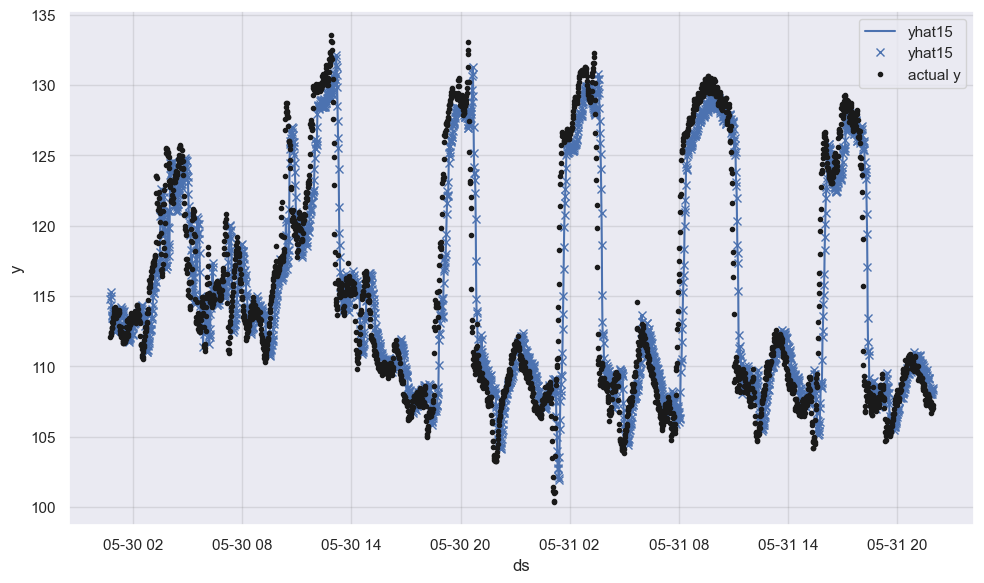

In [93]:
model_np2 = model_np.highlight_nth_step_ahead_of_each_forecast(15)
model_np2.plot(y_pred_np)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


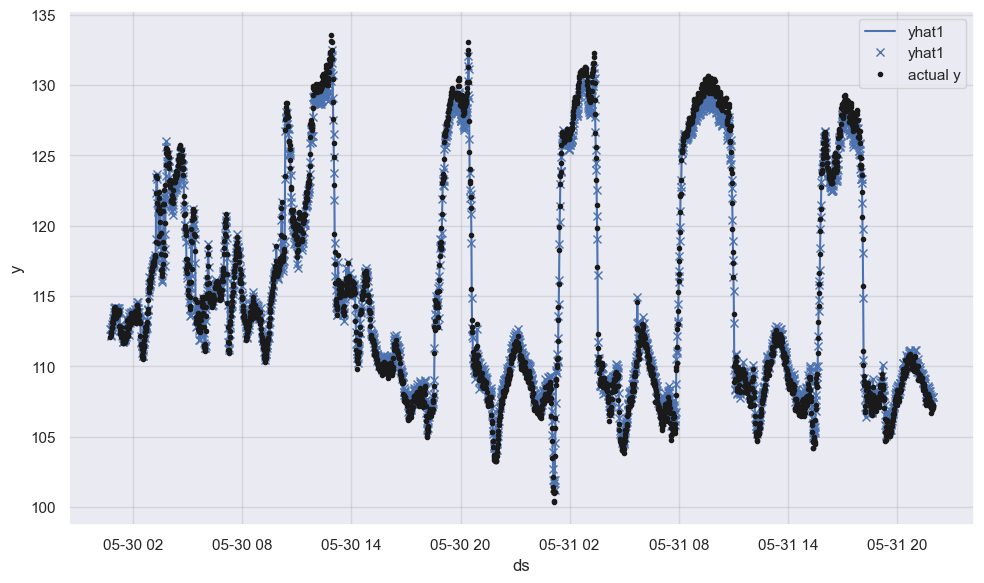

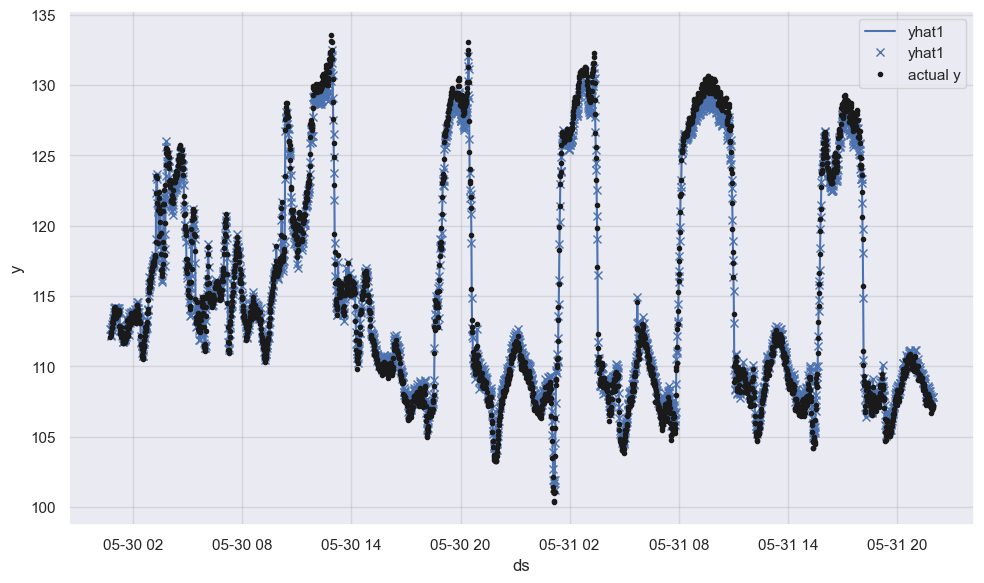

In [94]:
model_np3 = model_np.highlight_nth_step_ahead_of_each_forecast(1)
model_np3.plot(y_pred_np)

In [95]:
np.mean(mean_squared_error(y_true=y_pred_np['y'], y_pred=y_pred_np['yhat15']))

17.230081857888088

In [96]:
mean_absolute_error(y_true=y_pred_np['y'], y_pred=y_pred_np['yhat15'])

2.628947840824609

In [97]:
mean_absolute_percentage_error(y_true=y_pred_np['y'], y_pred=y_pred_np['yhat15'])

2.2688743496512154

Comprobamos si el decalaje que se aprecia en el anterior gráfico es por el uso de la librería que usa neuralprophet.

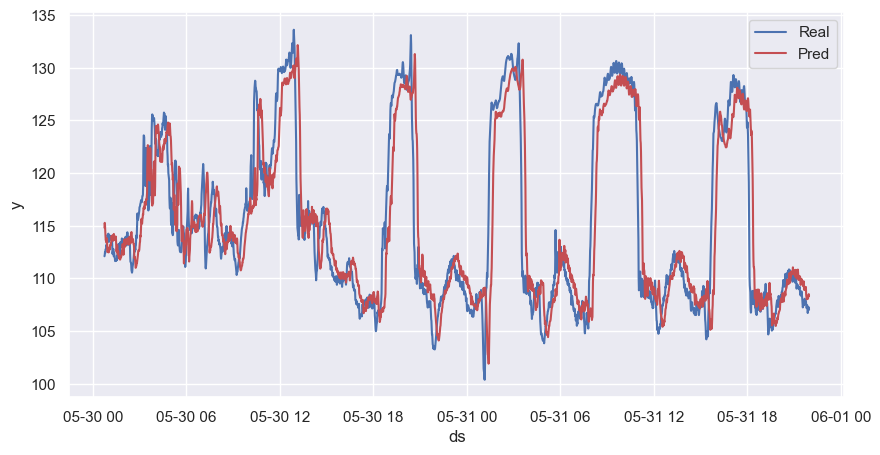

In [98]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=y_pred_np, x='ds', y='y', ax=ax, color='b', label='Real')
sns.lineplot(data=y_pred_np, x='ds', y='yhat15', ax=ax, color='r', label='Pred')
plt.show()

Comprobamos si deshaciendo el decalaje de 15 minutos coincide el gráfico de real y predicción.

In [99]:
y_pred_np['yhat15_delag'] = y_pred_np['yhat15'].shift(-15)
y_pred_np = y_pred_np.dropna(how='any', axis=0)

In [100]:
df = y_pred_np[['ds', 'y', 'yhat15_delag']].copy()

df['yhat15_delag+1'] = df['yhat15_delag'].shift(1)
df['yhat15_delag+2'] = df['yhat15_delag'].shift(2)

In [101]:
df.to_csv('dataset_prueba_neuralprophet.csv')

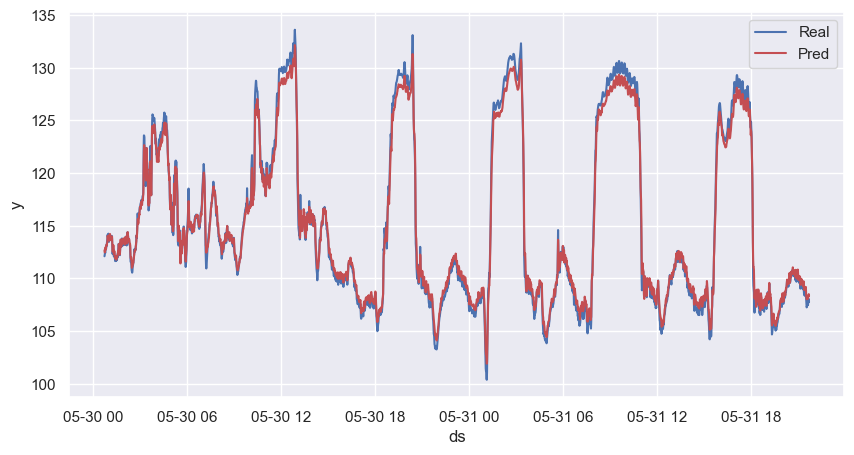

In [102]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=y_pred_np, x='ds', y='y', ax=ax, color='b', label='Real')
sns.lineplot(data=y_pred_np, x='ds', y='yhat15_delag', ax=ax, color='r', label='Pred')
plt.show()

## Creamos un modelo con ARIMA

In [103]:
result = adfuller(train['652TI0170'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -18.832610
p-value: 0.000000


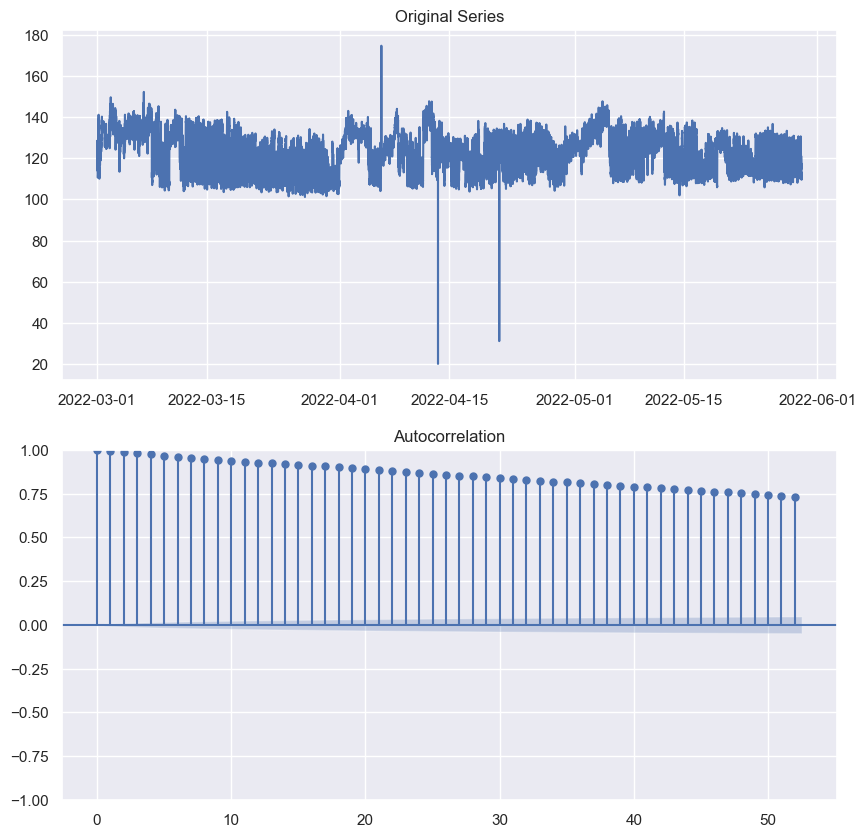

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(train['652TI0170'].dropna()); axes[0].set_title('Original Series')
plot_acf(train['652TI0170'].dropna(), ax=axes[1])
plt.show()

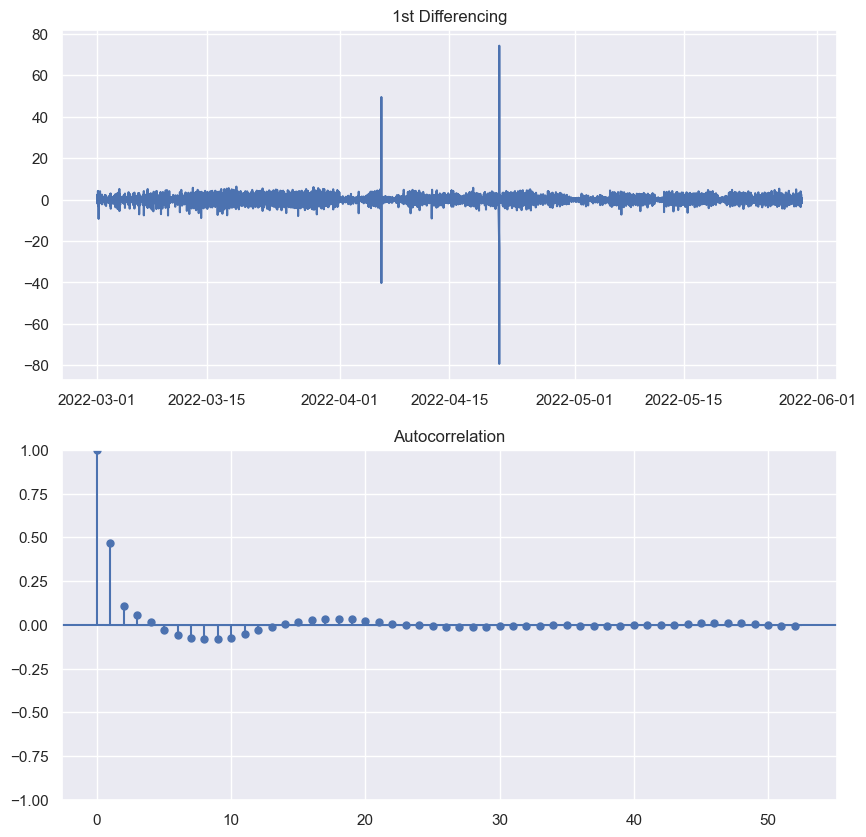

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(train['652TI0170'].diff().dropna()); axes[0].set_title('1st Differencing')
plot_acf(train['652TI0170'].diff().dropna(), ax=axes[1])
plt.show()

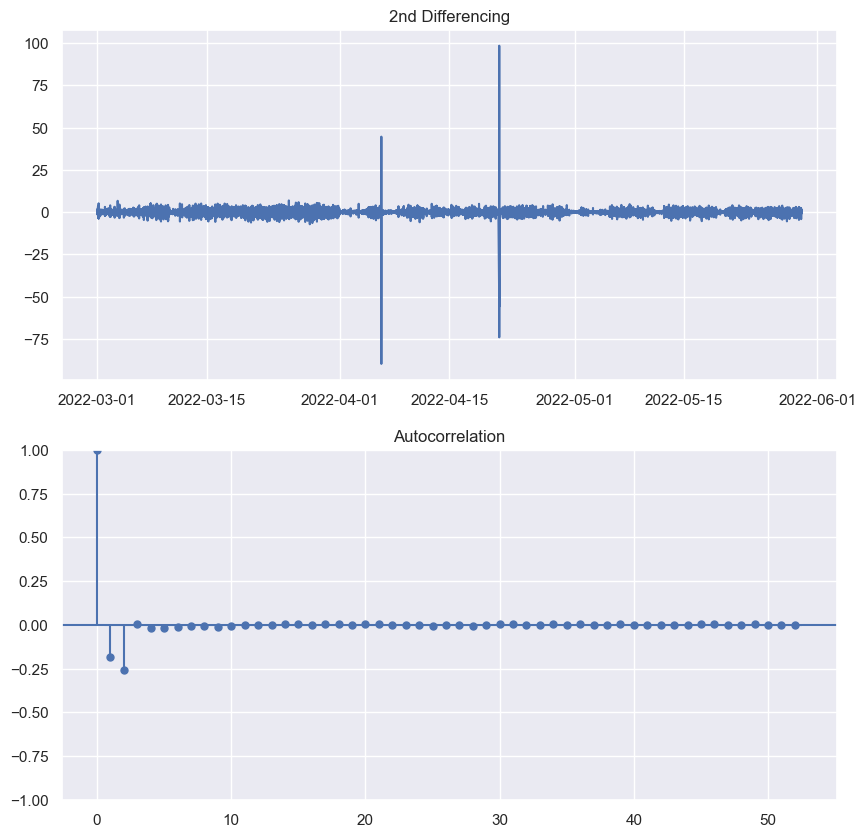

In [106]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(train['652TI0170'].diff().diff().dropna()); axes[0].set_title('2nd Differencing')
plot_acf(train['652TI0170'].diff().diff().dropna(), ax=axes[1])
plt.show()

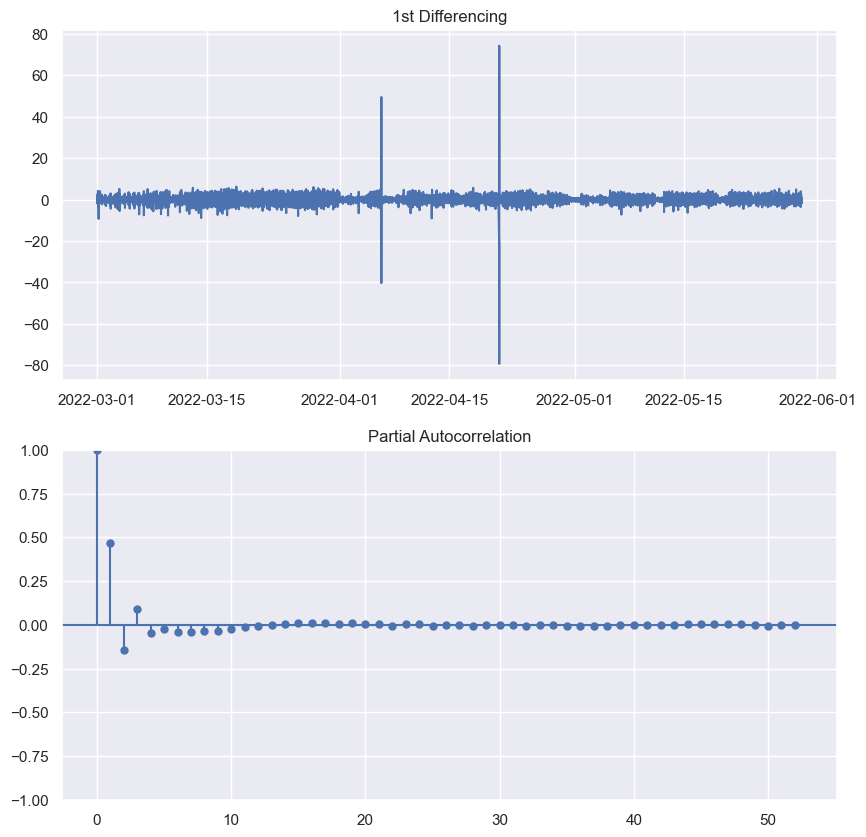

In [107]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(train['652TI0170'].diff().dropna()); axes[0].set_title('1st Differencing')
plot_pacf(train['652TI0170'].diff().dropna(), ax=axes[1])
plt.show()

In [108]:
c = ['Fecha','652TI0170']

train_arima = train.reset_index()

train_arima = train_arima[c]
train_arima['Fecha'] = train_arima['Fecha'].dt.tz_localize(None)
train_arima = train_arima.set_index('Fecha')
train_arima.index = pd.DatetimeIndex(train_arima.index, freq='T')

train_arima = train_arima.dropna(how='any', axis=0)

In [109]:
train_arima.index

DatetimeIndex(['2022-03-01 00:00:00', '2022-03-01 00:01:00',
               '2022-03-01 00:02:00', '2022-03-01 00:03:00',
               '2022-03-01 00:04:00', '2022-03-01 00:05:00',
               '2022-03-01 00:06:00', '2022-03-01 00:07:00',
               '2022-03-01 00:08:00', '2022-03-01 00:09:00',
               ...
               '2022-05-29 23:51:00', '2022-05-29 23:52:00',
               '2022-05-29 23:53:00', '2022-05-29 23:54:00',
               '2022-05-29 23:55:00', '2022-05-29 23:56:00',
               '2022-05-29 23:57:00', '2022-05-29 23:58:00',
               '2022-05-29 23:59:00', '2022-05-30 00:00:00'],
              dtype='datetime64[ns]', name='Fecha', length=129424, freq=None)

In [110]:
# De las gráficas de ACF y PACF extramos los coeficientes del ARIMA p=2,d=1,q=2

model_arima = ARIMA(train_arima['652TI0170'],order=(2,1,2))

model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              652TI0170   No. Observations:               129424
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -155404.450
Date:                Tue, 16 May 2023   AIC                         310818.900
Time:                        17:55:09   BIC                         310867.754
Sample:                             0   HQIC                        310833.556
                             - 129424                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8130      0.000   2849.277      0.000       0.812       0.814
ar.L2          0.1733      0.000    593.657      0.000       0.173       0.174
ma.L1         -0.3540      0.000  -1291.584      0.0

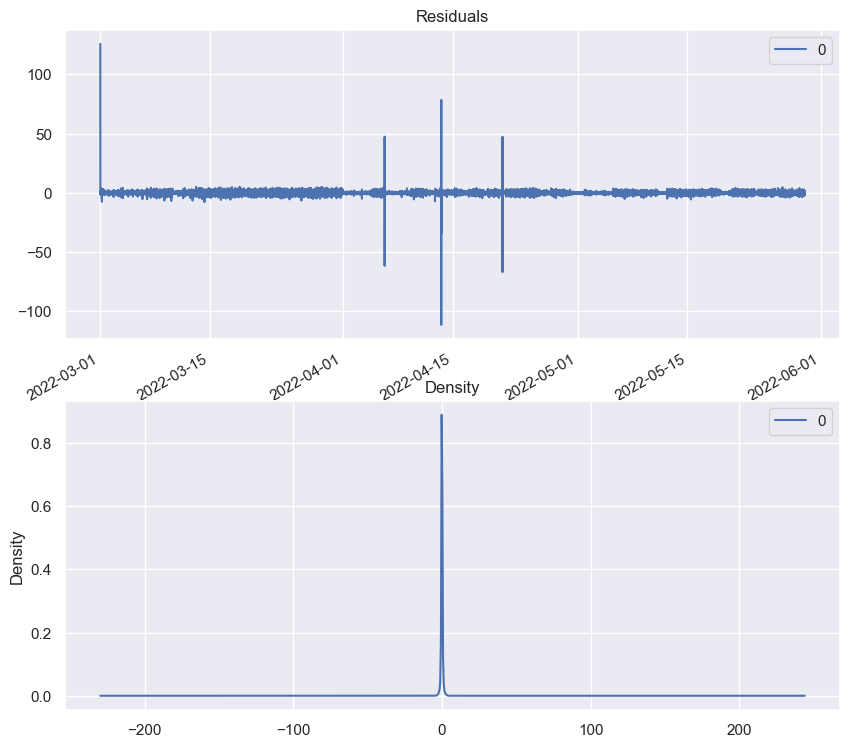

In [111]:
# Plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid)
fig, ax = plt.subplots(2,1, figsize=(10,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [112]:
test_arima = test.reset_index()

test_arima = test_arima[c]
test_arima['Fecha'] = test_arima['Fecha'].dt.tz_localize(None)
test_arima = test_arima.set_index('Fecha')
test_arima.index = pd.DatetimeIndex(test_arima.index, freq='min')

In [113]:
train_predict_arima = model_arima_fit.predict()

In [114]:
test_predict_arima = model_arima_fit.predict(start=train_arima.shape[0]+1, end=train_arima.shape[0]+test_arima.shape[0])

In [115]:
test_predict_arima

129425    113.234250
129426    113.277675
129427    113.318920
129428    113.359977
129429    113.400504
             ...    
132178    116.833901
132179    116.833901
132180    116.833901
132181    116.833901
132182    116.833901
Name: predicted_mean, Length: 2758, dtype: float64

In [116]:
test_predict_arima = np.array(test_predict_arima)

df_test_predict_arima = pd.DataFrame(test_predict_arima, columns=['y_pred'])

In [117]:
df_test_predict_arima

y_pred
0     113.234250
1     113.277675
2     113.318920
3     113.359977
4     113.400504
...          ...
2753  116.833901
2754  116.833901
2755  116.833901
2756  116.833901
2757  116.833901

[2758 rows x 1 columns]

In [118]:
test_show = test.reset_index()
test_show = test_show[['Fecha', '652TI0170']]

In [119]:
test_show = test_show.join(df_test_predict_arima)

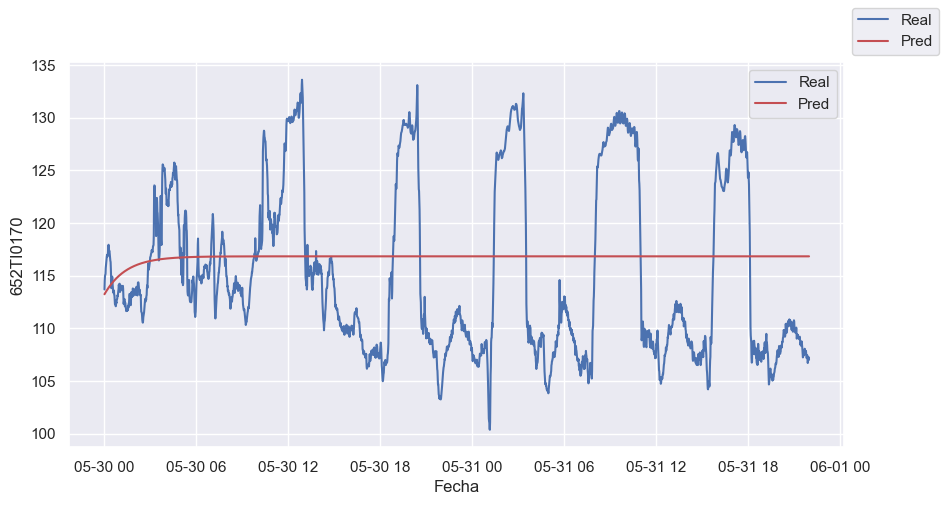

In [120]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=test_show, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=test_show, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
fig.legend()
plt.show()

In [121]:
np.mean(mean_squared_error(y_true=test_show['652TI0170'], y_pred=test_show['y_pred']))

67.82347067371505

In [122]:
mean_absolute_error(y_true=test_show['652TI0170'], y_pred=test_show['y_pred'])

7.31726771912788

In [123]:
mean_absolute_percentage_error(y_true=test_show['652TI0170'], y_pred=test_show['y_pred'])

6.3421440354174745

## Modelo con XGBoost

In [124]:
def create_features(df):
    """
    Crea un dataframe con variables temporales basadas en el índice de fechas que contiene el dataframe original.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    return df

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217379 entries, 2021-12-31 23:00:00+00:00 to 2022-05-31 21:58:00+00:00
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   652Carga.Valor  217369 non-null  float64
 1   652FI1063       217378 non-null  float64
 2   652FI2063       217378 non-null  float64
 3   620FI091.MC     217361 non-null  float64
 4   620FC098.MC     217365 non-null  float64
 5   620FC117.MC     217367 non-null  float64
 6   652FC097.MC     217361 non-null  float64
 7   652FC0099       217379 non-null  float64
 8   652FC029.MC     217361 non-null  float64
 9   652FC030.MC     217367 non-null  float64
 10  620FC106.MC     217367 non-null  float64
 11  652FC0019       217379 non-null  float64
 12  652FC0020       217379 non-null  float64
 13  652FC0018       217379 non-null  float64
 14  652FC0065       217379 non-null  float64
 15  652FC0015       217379 non-null  float64
 16  652TC0019 

In [126]:
def create_cycle(df):

    df = df.copy()
    df['T_ciclo1'] = 0
    df['T_ciclo2'] = 0
    df['Transitorio_1'] = 0
    df['Transitorio_2'] = 0
    df['T_corte'] = 0
    
    for i in range(0, df.shape[0]):
        if i == 0:
            df['T_ciclo1'] = 1
            df['T_ciclo2'] = 1
        else:
            if ((df.iloc[i,37] < 1) | (df.iloc[i,37] > 9.5)) | ((df.iloc[i,38] < 1) | (df.iloc[i,38] > 9.5)):
                df.iloc[i,72] = 1
            else:
                df.iloc[i,72] = df.iloc[i-1,72] + 1
            if ((df.iloc[i,39] < 1) | (df.iloc[i,39] > 9.5)) | ((df.iloc[i,40] < 1) | (df.iloc[i,40] > 9.5)):
                df.iloc[i,73] = 1 
            else:
                df.iloc[i,73] = df.iloc[i-1,73] + 1
        if ((df.iloc[i,37] >= 8.5) & (df.iloc[i,37] <= 9.5)) | ((df.iloc[i,38] >= 8.5) & (df.iloc[i,38] <= 9.5)):
            df.iloc[i,74] = 1
        elif ((df.iloc[i,37] >= 6) &  (df.iloc[i,37] <= 7)) | ((df.iloc[i,38] >= 6) & (df.iloc[i,38] <= 7)):
            df.iloc[i,74] = 2
        elif ((df.iloc[i,37] >= 1.5) & (df.iloc[i,37] <= 3)) | ((df.iloc[i,38] >= 1.5) & (df.iloc[i,38] <= 3)):
            df.iloc[i,74] = 3
        if ((df.iloc[i,39] >= 8.5) & (df.iloc[i,39] <= 9.5)) | ((df.iloc[i,40] >= 8.5) & (df.iloc[i,40] <= 9.5)):
            df.iloc[i,75] = 1
        elif ((df.iloc[i,39] >= 6) & (df.iloc[i,39] <= 7)) | ((df.iloc[i,40] >= 6) & (df.iloc[i,40] <= 7)):
            df.iloc[i,75] = 2
        elif ((df.iloc[i,39] >= 1.5) & (df.iloc[i,39] <= 3)) | ((df.iloc[i,40] >= 1.5) & (df.iloc[i,40] <= 3)):
            df.iloc[i,75] = 3
 
        if ((df.iloc[i,37] > 5) & (df.iloc[i,37] < 7)) | ((df.iloc[i,38] > 5) & (df.iloc[i,38] < 7)) | ((df.iloc[i,39] > 5) & (df.iloc[i,39] < 7)) | ((df.iloc[i,40] > 5) & (df.iloc[i,40] < 7)):
            if i == 0:
                df.iloc[i,76] = 1
            else:
                df.iloc[i,76] = df.iloc[i-1,76] + 1
        
    return df



In [127]:
df_xgb = create_features(df2)
df_xgb = create_cycle(df_xgb)

In [128]:
df_xgb[['652C0004A', '652C0004B','T_ciclo1','Transitorio_1', 'T_corte']]

652C0004A  652C0004B  T_ciclo1  Transitorio_1  \
Fecha                                                                      
2021-12-31 23:00:00+00:00        1.0        9.0         1              1   
2021-12-31 23:01:00+00:00        1.0        9.0         2              1   
2021-12-31 23:02:00+00:00        1.0        9.0         3              1   
2021-12-31 23:03:00+00:00        1.0        9.0         4              1   
2021-12-31 23:04:00+00:00        1.0        9.0         5              1   
...                              ...        ...       ...            ...   
2022-05-31 21:54:00+00:00        1.0        4.0       232              0   
2022-05-31 21:55:00+00:00        1.0        4.0       233              0   
2022-05-31 21:56:00+00:00        1.0        4.0       234              0   
2022-05-31 21:57:00+00:00        1.0        4.0       235              0   
2022-05-31 21:58:00+00:00        1.0        4.0       236              0   

                           T_corte  
Fecha                               
2021-12-31 23:00:00+00:00        0  
2021-12-31 23:01:00+00:00        0  
2021-12-31 23:02:00+00:00        0  
2021-12-31 23:03:00+00:00        0  
2021-12-31 23:04:00+00:00        0  
...                            ...  
2022-05-31 21:54:00+00:00        0  
2022-05-31 21:55:00+00:00        0  
2022-05-31 21:56:00+00:00        0  
2022-05-31 21:57:00+00:00        0  
2022-05-31 21:58:00+00:00        0  

[217379 rows x 5 columns]

Vamos a ver si podemos crear un boxplot con la distribución de temperatura en función del estado de las cámaras de ambos módulos.

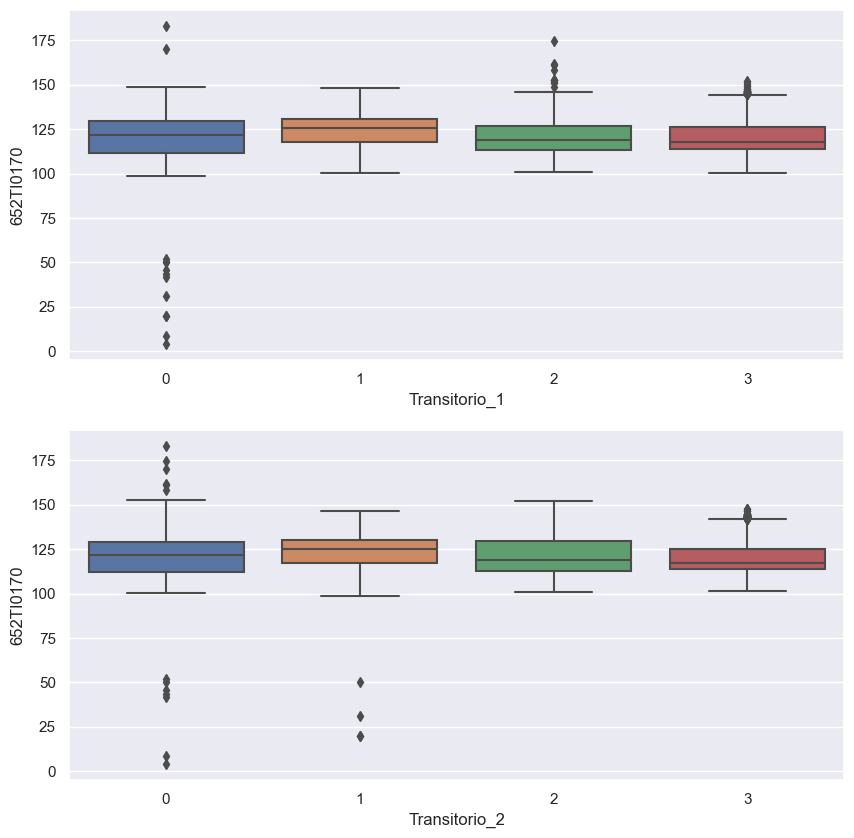

In [129]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharey=True)

sns.boxplot(data=df_xgb, x='Transitorio_1', y='652TI0170', ax=ax[0])
sns.boxplot(data=df_xgb, x='Transitorio_2', y='652TI0170', ax=ax[1])
 
plt.show()

In [130]:
train_xgb = df_xgb.loc[(df_xgb.index >= '2022-03-01') & (df_xgb.index <= '2022-05-30')].copy()
train_xgb = train_xgb.dropna(how='any', axis=0)
test_xgb = df_xgb.loc[(df_xgb.index > '2022-05-30') & (df_xgb.index < '2022-06-01')].copy()
test_xgb = test_xgb.dropna(how='any', axis=0)

In [131]:
#FEATURES = ['hour', 'minute', 'day', 'month', 'T_ciclo1', 'T_ciclo2', 'Transitorio_1', 'Transitorio_2', 'T_corte']
FEATURES = ['T_ciclo1', 'T_ciclo2', 'Transitorio_1', 'Transitorio_2', 'T_corte']
TARGET = ['652TI0170']

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [132]:
X_show = pd.concat([X_train,y_train], axis=1)

In [133]:
X_show.head()

T_ciclo1  T_ciclo2  Transitorio_1  Transitorio_2  \
Fecha                                                                         
2022-03-01 00:00:00+00:00        90       546              3              2   
2022-03-01 00:01:00+00:00        91       547              3              2   
2022-03-01 00:02:00+00:00        92       548              3              2   
2022-03-01 00:03:00+00:00        93       549              3              2   
2022-03-01 00:04:00+00:00        94       550              3              2   

                           T_corte   652TI0170  
Fecha                                           
2022-03-01 00:00:00+00:00      141  125.659624  
2022-03-01 00:01:00+00:00      142  125.126835  
2022-03-01 00:02:00+00:00      143  126.031824  
2022-03-01 00:03:00+00:00      144  127.306709  
2022-03-01 00:04:00+00:00      145  127.734781

In [134]:
model_xgb = xgb.XGBRegressor(early_stopping_rounds=50)

model_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=100)

[0]	validation_0-rmse:87.24334
[99]	validation_0-rmse:6.25977


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
y_pred = model_xgb.predict(X_test)

In [136]:
test_xgb_show = X_test.copy()
test_xgb_show = test_xgb_show.join(y_test)
test_xgb_show = test_xgb_show.reset_index()
test_xgb_show = test_xgb_show.join(pd.DataFrame(y_pred)).rename(columns={0:'y_pred'})

In [137]:
test_xgb_show.head()

Fecha  T_ciclo1  T_ciclo2  Transitorio_1  Transitorio_2  \
0 2022-05-30 00:01:00+00:00        99       509              3              2   
1 2022-05-30 00:02:00+00:00       100       510              3              2   
2 2022-05-30 00:03:00+00:00       101       511              3              2   
3 2022-05-30 00:04:00+00:00       102       512              3              2   
4 2022-05-30 00:05:00+00:00       103       513              3              2   

   T_corte   652TI0170      y_pred  
0       87  113.684152  124.381035  
1       88  114.525213  125.566200  
2       89  114.938722  126.213646  
3       90  115.081096  126.213646  
4       91  115.145742  126.601418

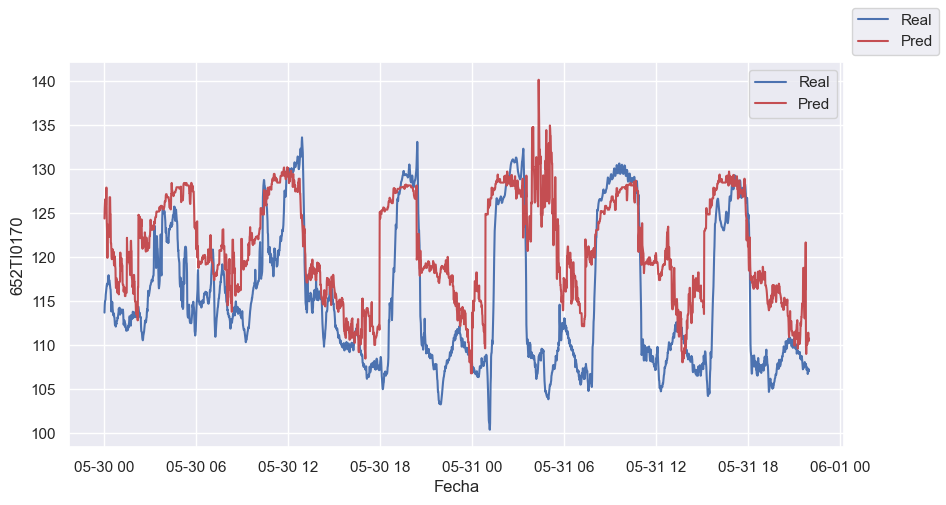

In [138]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=test_xgb_show, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=test_xgb_show, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
fig.legend()
plt.show()

In [139]:
np.mean(mean_squared_error(y_true=test_xgb_show['652TI0170'], y_pred=test_xgb_show['y_pred']))

71.72442076427615

In [140]:
mean_absolute_error(y_true=test_xgb_show['652TI0170'], y_pred=test_xgb_show['y_pred'])

6.5050542484835345

In [141]:
mean_absolute_percentage_error(y_true=test_xgb_show['652TI0170'], y_pred=test_xgb_show['y_pred'])

5.856049240687427

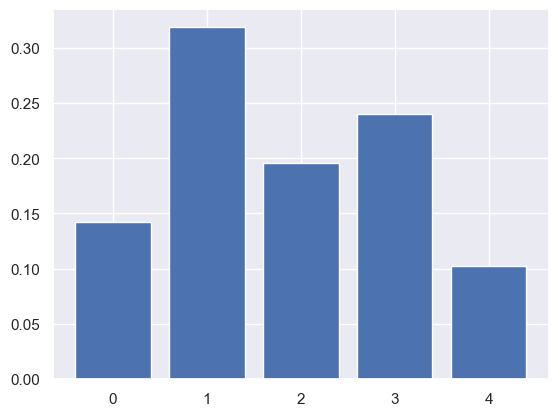

In [142]:
plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
plt.show()

Introducimos algún lag para ver si mejora la predicción.

In [143]:
def add_lags(df):
    target_map = df['652TI0170'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('15 min')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('30 min')).map(target_map)
    
    # Añadimos decalajes de 15 minutos a todas las variables que tenemos de interés.
    df['T_ciclo1_lag'] = df['T_ciclo1'].shift(15)
    df['T_ciclo2_lag'] = df['T_ciclo2'].shift(15)
    df['Transitorio_1_lag'] = df['Transitorio_1'].shift(15)
    df['Transitorio_2_lag'] = df['Transitorio_2'].shift(15)
    df['T_corte_lag'] = df['T_corte'].shift(15)
    
    # Quitamos los nans para evitar problemas con los algoritmos.
    
    df = df.dropna(how='any', axis=0)
    
    return df
    

In [144]:
df_xgb_lags = add_lags(df_xgb)

In [145]:
train_xgb_lags = df_xgb_lags.loc[(df_xgb_lags.index >= '2022-03-01') & (df_xgb_lags.index <= '2022-05-30')].copy()
train_xgb_lags = train_xgb_lags.dropna(how='any', axis=0)
test_xgb_lags = df_xgb_lags.loc[(df_xgb_lags.index > '2022-05-30') & (df_xgb_lags.index < '2022-06-01')].copy()
test_xgb_lags = test_xgb_lags.dropna(how='any', axis=0)

In [146]:
#FEATURES = ['hour', 'minute', 'day', 'month', 'T_ciclo1', 'T_ciclo2', 'Transitorio_1', 'Transitorio_2', 'T_corte', 'lag1', 'lag2']
FEATURES = ['T_ciclo1_lag', 'T_ciclo2_lag', 'Transitorio_1_lag', 'Transitorio_2_lag', 'T_corte_lag', 'lag1', 'lag2']
TARGET = ['652TI0170']

X_train_lags = train_xgb_lags[FEATURES]
y_train_lags = train_xgb_lags[TARGET]

X_test_lags = test_xgb_lags[FEATURES]
y_test_lags = test_xgb_lags[TARGET]

In [147]:
X_show_lags = pd.concat([X_train_lags, y_train_lags], axis=1)

In [148]:
X_show_lags.head()

T_ciclo1_lag  T_ciclo2_lag  Transitorio_1_lag  \
Fecha                                                                      
2022-03-01 00:00:00+00:00          75.0         531.0                3.0   
2022-03-01 00:01:00+00:00          76.0         532.0                3.0   
2022-03-01 00:02:00+00:00          77.0         533.0                3.0   
2022-03-01 00:03:00+00:00          78.0         534.0                3.0   
2022-03-01 00:04:00+00:00          79.0         535.0                3.0   

                           Transitorio_2_lag  T_corte_lag        lag1  \
Fecha                                                                   
2022-03-01 00:00:00+00:00                2.0        126.0  134.641547   
2022-03-01 00:01:00+00:00                2.0        127.0  133.942558   
2022-03-01 00:02:00+00:00                2.0        128.0  134.259046   
2022-03-01 00:03:00+00:00                2.0        129.0  133.620296   
2022-03-01 00:04:00+00:00                2.0        130.0  133.647305   

                                 lag2   652TI0170  
Fecha                                              
2022-03-01 00:00:00+00:00  128.435203  125.659624  
2022-03-01 00:01:00+00:00  128.420665  125.126835  
2022-03-01 00:02:00+00:00  128.296238  126.031824  
2022-03-01 00:03:00+00:00  128.314982  127.306709  
2022-03-01 00:04:00+00:00  128.764125  127.734781

In [149]:
model_xgb_lags = xgb.XGBRegressor(early_stopping_rounds=50)

model_xgb_lags.fit(X_train_lags, y_train_lags, eval_set=[(X_train_lags, y_train_lags)], verbose=100)

[0]	validation_0-rmse:87.10583
[99]	validation_0-rmse:2.28727


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [150]:
y_pred_lags = model_xgb_lags.predict(X_test_lags)

In [151]:
test_xgb_lags_show = X_test_lags.copy()
test_xgb_lags_show = test_xgb_lags_show.join(y_test_lags)
test_xgb_lags_show = test_xgb_lags_show.reset_index()
test_xgb_lags_show = test_xgb_lags_show.join(pd.DataFrame(y_pred_lags)).rename(columns={0:'y_pred'})

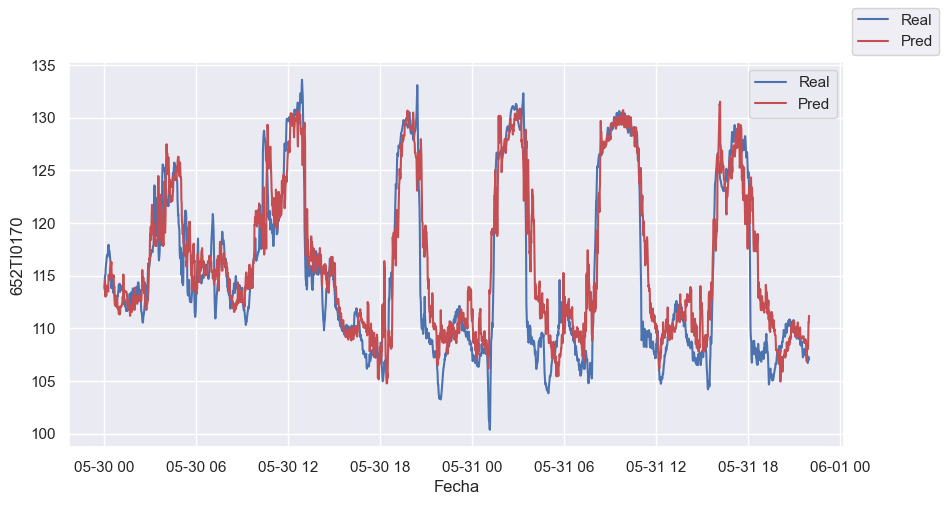

In [152]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=test_xgb_lags_show, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=test_xgb_lags_show, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
fig.legend()
plt.show()

In [153]:
np.mean(mean_squared_error(y_true=test_xgb_lags_show['652TI0170'], y_pred=test_xgb_lags_show['y_pred']))

14.799971224404143

In [154]:
mean_absolute_error(y_true=test_xgb_lags_show['652TI0170'], y_pred=test_xgb_lags_show['y_pred'])

2.6872529471450073

In [155]:
mean_absolute_percentage_error(y_true=test_xgb_lags_show['652TI0170'], y_pred=test_xgb_lags_show['y_pred'])

2.3725212903842956

In [156]:
y_pred_train_lags = model_xgb_lags.predict(X_train_lags)

In [157]:
np.mean(mean_squared_error(y_true=y_train_lags, y_pred=y_pred_train_lags))

5.231596537435815

In [158]:
mean_absolute_error(y_true=y_train_lags, y_pred=y_pred_train_lags)

1.5441265050213042

In [159]:
#mean_absolute_percentage_error(y_true=y_train_lags, y_pred=y_pred_train_lags)

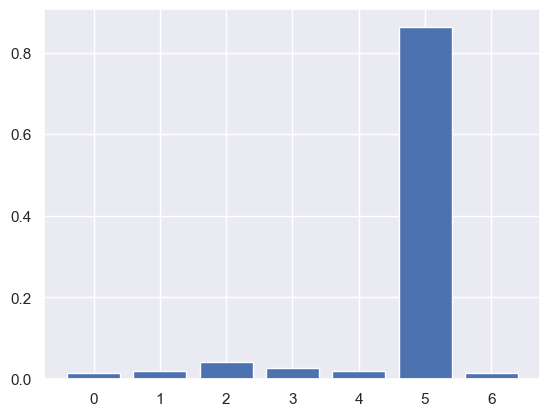

In [160]:
plt.bar(range(len(model_xgb_lags.feature_importances_)), model_xgb_lags.feature_importances_)
plt.show()

Generamos una variable que indique la temperatura de salida de gases de cámara si la cámara está en prueba de presión o calentando.

In [161]:
def add_Tcam(df):
    df = df.copy()
    df['Tcam'] = 35
    for i in range(0, df.shape[0]):
        if (df.iloc[i,37] >=6.5) & (df.iloc[i,37] <= 9.5):
            df['Tcam'] = df['652TI4118']
        elif (df.iloc[i,38] >=6.5) & (df.iloc[i,39] <= 9.5):
            df['Tcam'] = df['652TI4218']
        elif (df.iloc[i,38] >=6.5) & (df.iloc[i,39] <= 9.5):
            df['Tcam'] = df['652TI5118']
        elif (df.iloc[i,38] >=6.5) & (df.iloc[i,39] <= 9.5):
            df['Tcam'] = df['652TI5218']
    
    return df

In [162]:
df_xgb_tcam = add_Tcam(df_xgb_lags)

In [163]:
results = {}

for i in range(0,180):
        df_xgb_tcam['Tcam_d'] = df_xgb_tcam['Tcam'].shift(periods=i)
        results[i] = df_xgb_tcam.corr()['652TI0170']['Tcam_d']

In [164]:
results

{0: 0.00876859743331538,
 1: 0.009185926461711583,
 2: 0.00959081891938017,
 3: 0.009975707377844423,
 4: 0.010334447033595822,
 5: 0.01066342040350156,
 6: 0.01095893892070753,
 7: 0.011219617911229452,
 8: 0.011447457597384037,
 9: 0.011646566113185977,
 10: 0.011822174585440914,
 11: 0.011977844344247113,
 12: 0.012116216321056432,
 13: 0.012240625852236092,
 14: 0.012351245210039186,
 15: 0.012449350254779145,
 16: 0.012535233395668154,
 17: 0.012609613790541582,
 18: 0.012673129271420225,
 19: 0.012723869435856927,
 20: 0.012760244723094212,
 21: 0.012782793854724682,
 22: 0.01279329106128834,
 23: 0.012793709313385478,
 24: 0.012784256761251948,
 25: 0.0127661839407309,
 26: 0.01274184279057541,
 27: 0.01271330021218986,
 28: 0.012682279535119263,
 29: 0.012651493733524682,
 30: 0.012622337814191677,
 31: 0.012596556031833924,
 32: 0.01257707757576974,
 33: 0.012565118201488252,
 34: 0.012559373208158925,
 35: 0.012562374632974256,
 36: 0.012573701045867386,
 37: 0.01259252847661

In [165]:
df_xgb_tcam['Tcam_lag'] = df_xgb_tcam['Tcam'].shift(15)
df_xgb_tcam = df_xgb_tcam.dropna(how='any', axis=0)

Vamos a realizar la prueba únicamente con esa variable de temperatura de cámara al inicio del calentamiento.

In [166]:
train_xgb_tcam = df_xgb_tcam.loc[(df_xgb_tcam.index >= '2022-03-01') & (df_xgb_tcam.index <= '2022-05-30')].copy()
train_xgb_tcam = train_xgb_tcam.dropna(how='any', axis=0)
test_xgb_tcam = df_xgb_tcam.loc[(df_xgb_tcam.index > '2022-05-30') & (df_xgb_tcam.index < '2022-06-01')].copy()
test_xgb_tcam = test_xgb_tcam.dropna(how='any', axis=0)

In [167]:
FEATURES = ['T_ciclo1_lag', 'T_ciclo2_lag', 'Transitorio_1_lag', 'Transitorio_2_lag', 'T_corte_lag', 'lag1', 'lag2', 'Tcam_lag']
TARGET = ['652TI0170']

X_train_tcam = train_xgb_tcam[FEATURES]
y_train_tcam = train_xgb_tcam[TARGET]

X_test_tcam = test_xgb_tcam[FEATURES]
y_test_tcam = test_xgb_tcam[TARGET]

In [168]:
model_xgb_tcam = xgb.XGBRegressor(early_stopping_rounds=50)

model_xgb_tcam.fit(X_train_tcam, y_train_tcam, eval_set=[(X_train_tcam, y_train_tcam)], verbose=100)

[0]	validation_0-rmse:87.10583
[99]	validation_0-rmse:2.06375


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [169]:
y_pred_tcam = model_xgb_tcam.predict(X_test_tcam)

In [170]:
test_xgb_tcam_show = X_test_tcam.copy()
test_xgb_tcam_show = test_xgb_tcam_show.join(y_test_tcam)
test_xgb_tcam_show = test_xgb_tcam_show.reset_index()
test_xgb_tcam_show = test_xgb_tcam_show.join(pd.DataFrame(y_pred_tcam)).rename(columns={0:'y_pred'})

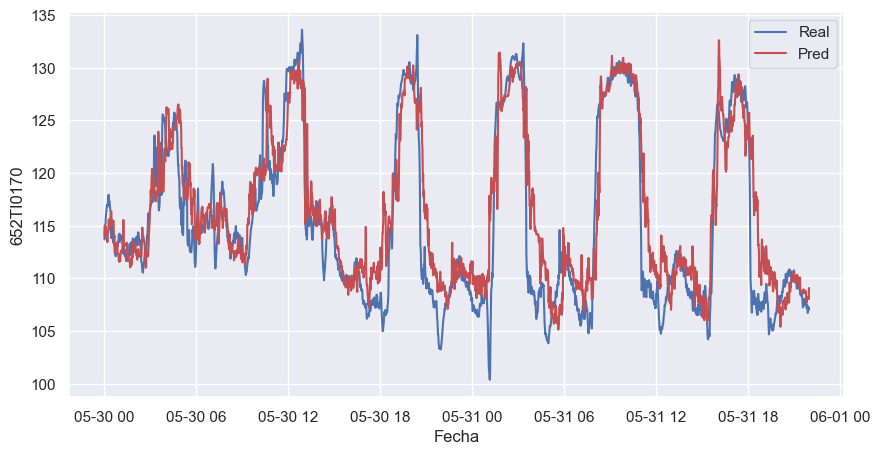

In [171]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=test_xgb_tcam_show, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=test_xgb_tcam_show, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
plt.show()

In [172]:
np.mean(mean_squared_error(y_true=test_xgb_tcam_show['652TI0170'], y_pred=test_xgb_tcam_show['y_pred']))

14.470407093197736

In [173]:
mean_absolute_error(y_true=test_xgb_tcam_show['652TI0170'], y_pred=test_xgb_tcam_show['y_pred'])

2.699840272370895

In [174]:
mean_absolute_percentage_error(y_true=test_xgb_tcam_show['652TI0170'], y_pred=test_xgb_tcam_show['y_pred'])

2.3816839603527447

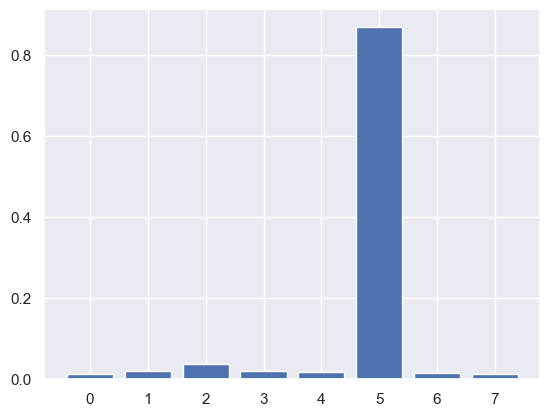

In [175]:
plt.bar(range(len(model_xgb_tcam.feature_importances_)), model_xgb_tcam.feature_importances_)
plt.show()

## Modelo con AutoKeras

In [176]:
lookback = 30
predict_from = 1
#predict_until = 15

train_ak = df_xgb_tcam.loc[(df_xgb_tcam.index >= '2022-03-01') & (df_xgb_tcam.index < '2022-05-15')].copy()
train_ak = train_ak.dropna(how='any', axis=0)
val_ak = df_xgb_tcam.loc[(df_xgb_tcam.index >= '2022-05-15') & (df_xgb_tcam.index <= '2022-05-30')].copy()
val_ak = val_ak.dropna(how='any', axis=0)
test_ak = df_xgb_tcam.loc[(df_xgb_tcam.index > '2022-05-30') & (df_xgb_tcam.index < '2022-06-01')].copy()
test_ak = test_ak.dropna(how='any', axis=0)

In [177]:
FEATURES = ['T_ciclo1', 'T_ciclo2', 'Transitorio_1', 'Transitorio_2', 'T_corte', 'lag1', 'lag2', 'Tcam']
TARGET = ['652TI0170']

X_train_ak = train_ak[FEATURES]
y_train_ak = train_ak[TARGET]

X_val_ak = val_ak[FEATURES] 
y_val_ak = val_ak[TARGET]

X_test_ak = test_ak[FEATURES]
y_test_ak = test_ak[TARGET]

In [178]:
model_ak = ak.TimeseriesForecaster(lookback=lookback, predict_from=predict_from, max_trials=1, objective='val_loss')

INFO:tensorflow:Reloading Tuner from .\time_series_forecaster\tuner0.json


In [179]:
model_ak.fit(x=X_train_ak, y=y_train_ak, validation_data=(X_val_ak, y_val_ak), epochs=55, batch_size=64)

INFO:tensorflow:Oracle triggered exit
Epoch 1/55
740/740 [==============================] - 37s 43ms/step - loss: 13653.2539 - mean_squared_error: 13653.2539 - val_loss: 10093.1416 - val_mean_squared_error: 10093.1416
Epoch 2/55
740/740 [==============================] - 30s 41ms/step - loss: 10478.1221 - mean_squared_error: 10478.1221 - val_loss: 7774.8193 - val_mean_squared_error: 7774.8193
Epoch 3/55
740/740 [==============================] - 29s 40ms/step - loss: 8267.2520 - mean_squared_error: 8267.2520 - val_loss: 5911.4365 - val_mean_squared_error: 5911.4365
Epoch 4/55
740/740 [==============================] - 31s 42ms/step - loss: 6450.0459 - mean_squared_error: 6450.0459 - val_loss: 4381.4644 - val_mean_squared_error: 4381.4644
Epoch 5/55
740/740 [==============================] - 30s 41ms/step - loss: 4976.2905 - mean_squared_error: 4976.2905 - val_loss: 3136.5964 - val_mean_squared_error: 3136.5964
Epoch 6/55
740/740 [==============================] - 29s 39ms/step - loss: 

INFO:tensorflow:Assets written to: .\time_series_forecaster\best_model\assets


INFO:tensorflow:Assets written to: .\time_series_forecaster\best_model\assets


In [180]:
data_test_ak = df_xgb_tcam[FEATURES]

In [181]:
data_test_ak.shape

(156432, 8)

In [182]:
y_pred_ak = model_ak.predict(data_test_ak)

2444/2444 [==============================] - 71s 29ms/step


In [183]:
y_pred_ak.shape

(109061, 1)

In [184]:
y_pred_ak_score = y_pred_ak[-y_test_ak.shape[0]:]

In [185]:
y_pred_ak_score.shape

(2758, 1)

In [186]:
y_test_ak.shape

(2758, 1)

In [187]:
np.mean(mean_squared_error(y_true=y_test_ak, y_pred=y_pred_ak_score))

64.16400825818216

In [188]:
mean_absolute_error(y_true=y_test_ak, y_pred=y_pred_ak_score)

7.105204723088429

In [189]:
mean_absolute_percentage_error(y_true=y_test_ak, y_pred=y_pred_ak_score)

6.282217732341352

In [190]:
y_pred_ak_score = pd.DataFrame(y_pred_ak_score, columns=['y_pred'])

In [191]:
test_ak_show = X_test_ak.copy()
test_ak_show = test_ak_show.join(y_test_ak)
test_ak_show = test_ak_show.reset_index()
test_ak_show = test_ak_show.join(y_pred_ak_score)

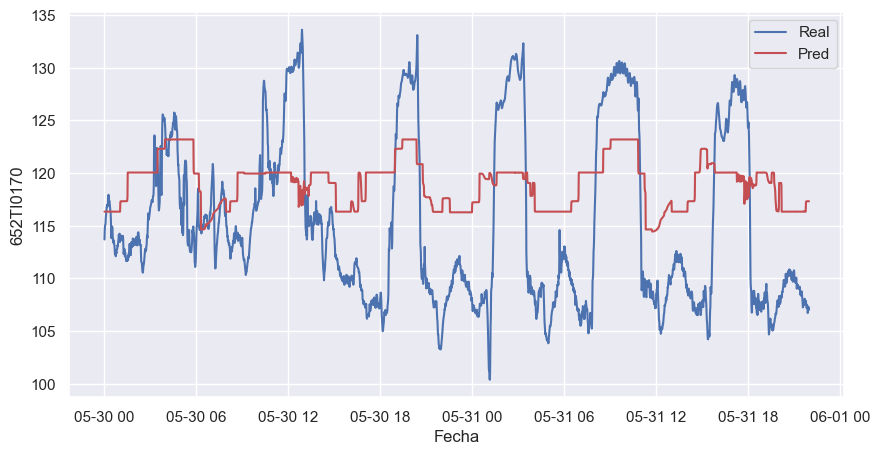

In [192]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=test_ak_show, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=test_ak_show, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
plt.show()

## Modelo LSTM.

In [193]:
train_t = df_xgb_tcam.loc[(df_xgb_tcam.index >= '2022-03-01') & (df_xgb_tcam.index < '2022-05-15')].copy()
train_t = train_t.dropna(how='any', axis=0)
val_t = df_xgb_tcam.loc[(df_xgb_tcam.index >= '2022-05-15') & (df_xgb_tcam.index <= '2022-05-30')].copy()
val_t = val_t.dropna(how='any', axis=0)
test_t = df_xgb_tcam.loc[(df_xgb_tcam.index > '2022-05-30') & (df_xgb_tcam.index < '2022-06-01')].copy()
test_t = test_t.dropna(how='any', axis=0)

In [194]:
FEATURES = ['T_ciclo1_lag', 'T_ciclo2_lag', 'Transitorio_1_lag', 'Transitorio_2_lag', 'T_corte_lag', 'lag1', 'lag2', 'Tcam_lag']
TARGET = ['652TI0170']

X_train_t = train_t[FEATURES]
y_train_t = train_t[TARGET]

X_val_t = val_t[FEATURES] 
y_val_t = val_t[TARGET]

X_test_t = test_t[FEATURES]
y_test_t = test_t[TARGET]

In [195]:
X_train_t.shape

(47341, 8)

In [196]:
train_x = X_train_t.values
train_y = y_train_t.values
val_x = X_val_t.values
val_y = y_val_t.values
test_x = X_test_t.values
test_y = y_test_t.values

scaler=MinMaxScaler(feature_range=(0,1))

train_x=scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x=scaler.transform(test_x)

print(train_x.shape, test_x.shape)

(47341, 8) (2758, 8)


In [197]:
train_x_r=train_x.reshape(train_x.shape[0],1,train_x.shape[1])
val_x_r =val_x.reshape(val_x.shape[0],1,val_x.shape[1])
test_x_r=test_x.reshape(test_x.shape[0],1,test_x.shape[1])
print(train_x_r.shape, test_x_r.shape)

(47341, 1, 8) (2758, 1, 8)


Epoch 1/55
658/658 [==============================] - 8s 10ms/step - loss: 15445.3486 - val_loss: 13960.3506
Epoch 2/55
658/658 [==============================] - 6s 10ms/step - loss: 12641.5957 - val_loss: 10401.8232
Epoch 3/55
658/658 [==============================] - 6s 9ms/step - loss: 8760.4600 - val_loss: 6551.6738
Epoch 4/55
658/658 [==============================] - 6s 9ms/step - loss: 5015.4126 - val_loss: 3319.9944
Epoch 5/55
658/658 [==============================] - 6s 9ms/step - loss: 2241.9758 - val_loss: 1205.3270
Epoch 6/55
658/658 [==============================] - 6s 9ms/step - loss: 708.6249 - val_loss: 278.6278
Epoch 7/55
658/658 [==============================] - 6s 10ms/step - loss: 143.0584 - val_loss: 31.0549
Epoch 8/55
658/658 [==============================] - 7s 10ms/step - loss: 28.0107 - val_loss: 12.9042
Epoch 9/55
658/658 [==============================] - 6s 10ms/step - loss: 17.7306 - val_loss: 14.1229
Epoch 10/55
658/658 [=============================

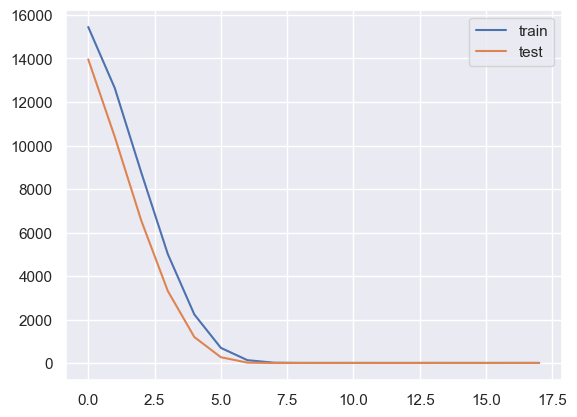

In [198]:
# Diseño de la red neuronal LSTM
model_t=Sequential()
model_t.add(LSTM(5, input_shape=(train_x_r.shape[1], train_x_r.shape[2])))
model_t.add(Dropout(0.2))
model_t.add(BatchNormalization())
model_t.add(Dense(1, activation='linear'))
model_t.compile(loss='mean_squared_error', optimizer='adam')
# Entrenamos la red
es_t = EarlyStopping(monitor='val_loss',verbose=1, restore_best_weights=True, patience=10)
history_t=model_t.fit(train_x_r, train_y, epochs=55, batch_size=72, validation_data=(val_x_r, val_y), callbacks=[es_t])
# Mostramos la curva de entrenamiento
plt.plot(history_t.history['loss'], label='train')
plt.plot(history_t.history['val_loss'], label='test')
plt.legend()
plt.show()

87/87 [==============================] - 0s 2ms/step
Error del modelo sobre conjunto de validación: 2.54


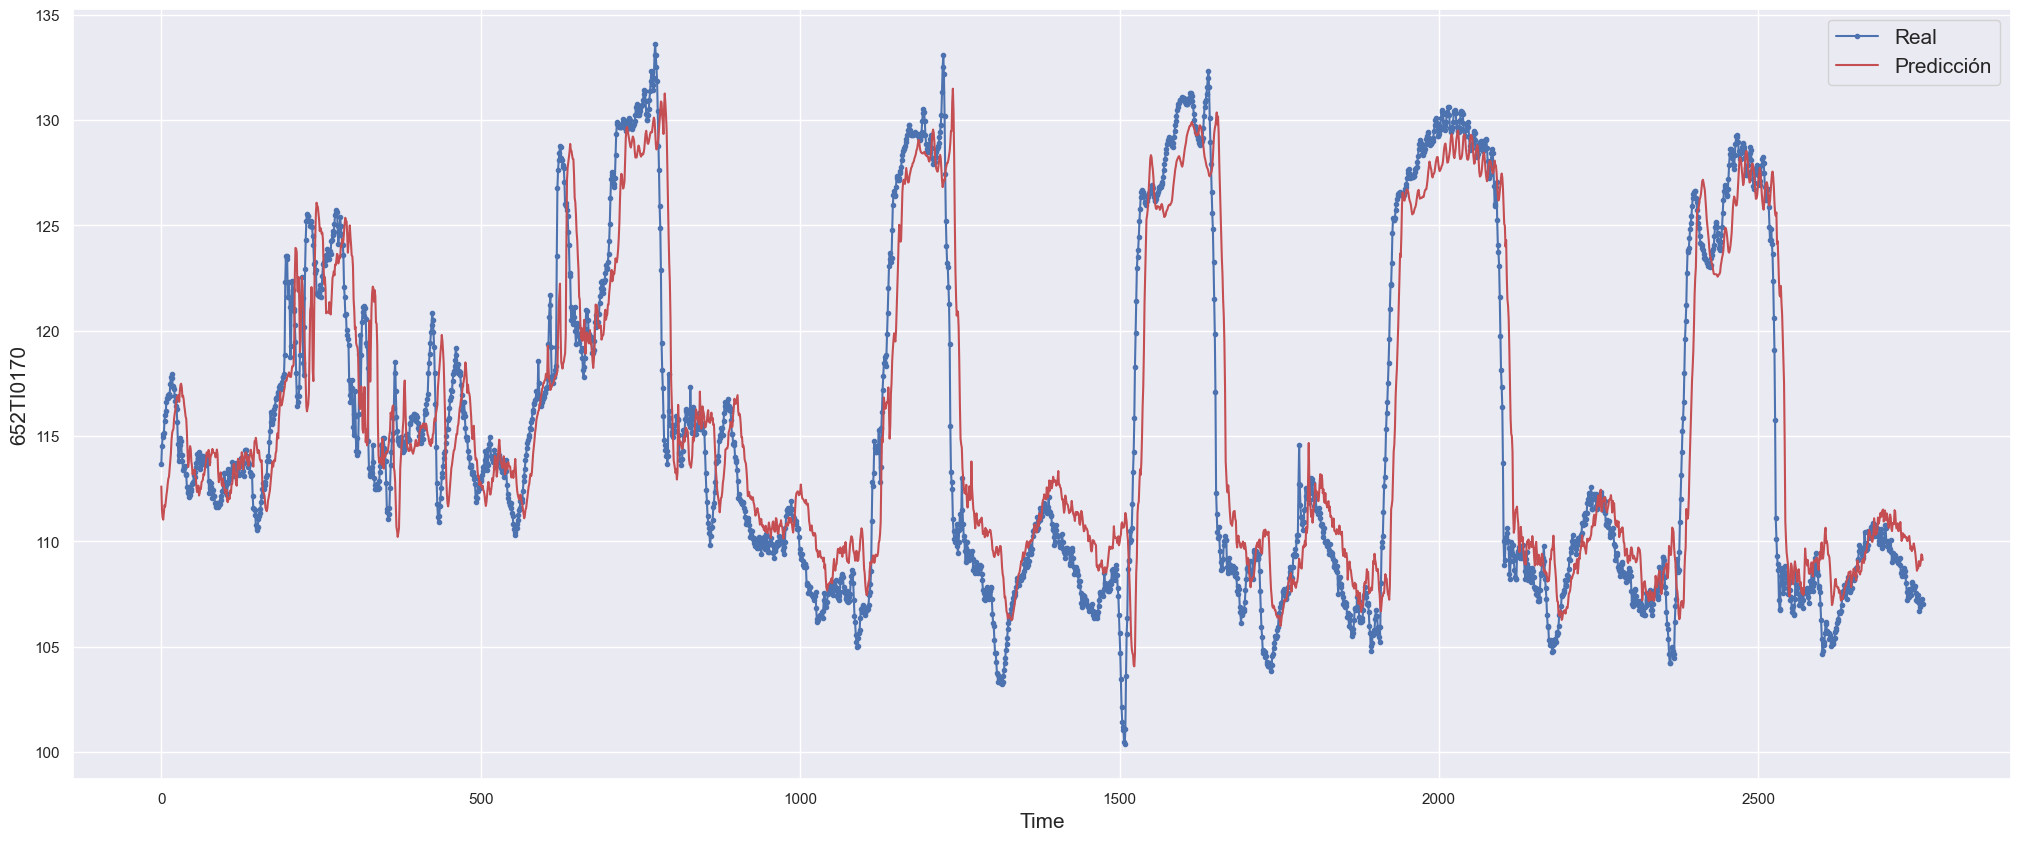

In [199]:
yhat=model_t.predict(test_x_r)
error_mae=mean_absolute_error(test_y, yhat)
print("Error del modelo sobre conjunto de validación: %.2f" % (error_mae))
n_data=test_x.shape[0]
aa=[x for x in range(n_data)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, test_y[-n_data:], marker='.', label="Real")
plt.plot(aa, yhat[-n_data:], 'r', label="Predicción")
plt.ylabel(y_train_t.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

In [200]:
np.mean(mean_squared_error(y_true=test_y, y_pred=yhat))

14.54360409066267

In [201]:
mean_absolute_error(y_true=test_y, y_pred=yhat)

2.540226760754601

In [202]:
mean_absolute_percentage_error(y_true=test_y, y_pred=yhat)

2.2101955895702874

In [203]:
def add_lags_lstm(df):
    target_map = df['652TI0170'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('15 min')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('30 min')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('45 min')).map(target_map)
    
    # Quitamos los nans para evitar problemas con los algoritmos.
    
    df = df.dropna(how='any', axis=0)
    
    return df

In [204]:
df_lstm = add_lags_lstm(df2)

In [205]:
train_lstm = df_lstm.loc[(df_lstm.index >= '2022-03-01') & (df_lstm.index < '2022-05-15')].copy()
train_lstm = train_lstm.dropna(how='any', axis=0)
val_lstm = df_lstm.loc[(df_lstm.index >= '2022-05-15') & (df_lstm.index <= '2022-05-30')].copy()
val_lstm = val_lstm.dropna(how='any', axis=0)
test_lstm = df_lstm.loc[(df_lstm.index > '2022-05-30') & (df_lstm.index < '2022-06-01')].copy()
test_lstm = test_lstm.dropna(how='any', axis=0)

In [206]:
FEATURES = ['lag1', 'lag2', 'lag3']
TARGET = ['652TI0170']

X_train_lstm = train_lstm[FEATURES]
y_train_lstm = train_lstm[TARGET]

X_val_lstm = val_lstm[FEATURES] 
y_val_lstm = val_lstm[TARGET]

X_test_lstm = test_lstm[FEATURES]
y_test_lstm = test_lstm[TARGET]

In [207]:
train_x_lstm = X_train_lstm.values
train_y_lstm = y_train_lstm.values
val_x_lstm = X_val_lstm.values
val_y_lstm = y_val_lstm.values
test_x_lstm = X_test_lstm.values
test_y_lstm = y_test_lstm.values

scaler=MinMaxScaler(feature_range=(0,1))

train_x_lstm = scaler.fit_transform(train_x_lstm)
val_x_lstm = scaler.transform(val_x_lstm)
test_x_lstm = scaler.transform(test_x_lstm)

print(train_x.shape, test_x.shape)

(47341, 8) (2758, 8)


In [208]:
train_x_r_lstm = train_x_lstm.reshape(train_x_lstm.shape[0],3,1)
val_x_r_lstm = val_x_lstm.reshape(val_x_lstm.shape[0],3,1)
test_x_r_lstm = test_x_lstm.reshape(test_x_lstm.shape[0],3,1)
print(train_x_r_lstm.shape, test_x_r_lstm.shape)

(47340, 3, 1) (2758, 3, 1)


Epoch 1/55
658/658 [==============================] - 8s 10ms/step - loss: 15506.6875 - val_loss: 14591.4062
Epoch 2/55
658/658 [==============================] - 7s 10ms/step - loss: 12808.8486 - val_loss: 11146.4521
Epoch 3/55
658/658 [==============================] - 7s 10ms/step - loss: 8946.7227 - val_loss: 6681.1494
Epoch 4/55
658/658 [==============================] - 7s 10ms/step - loss: 5173.1753 - val_loss: 3608.0063
Epoch 5/55
658/658 [==============================] - 6s 10ms/step - loss: 2345.3645 - val_loss: 1294.6572
Epoch 6/55
658/658 [==============================] - 7s 10ms/step - loss: 756.1771 - val_loss: 335.3222
Epoch 7/55
658/658 [==============================] - 6s 10ms/step - loss: 156.6078 - val_loss: 44.5960
Epoch 8/55
658/658 [==============================] - 6s 10ms/step - loss: 30.3339 - val_loss: 13.0686
Epoch 9/55
658/658 [==============================] - 6s 10ms/step - loss: 18.6635 - val_loss: 13.2432
Epoch 10/55
658/658 [=========================

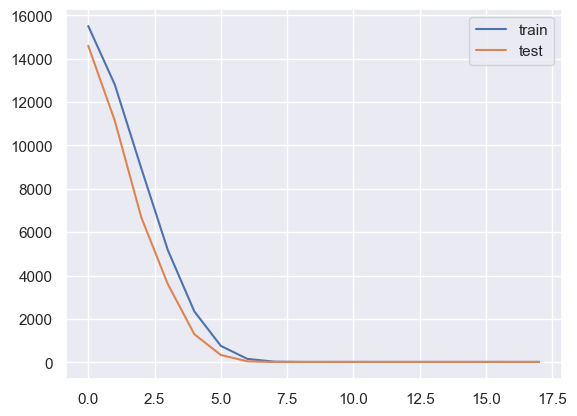

In [209]:
# Diseño de la red neuronal LSTM
model_t=Sequential()
model_t.add(LSTM(5, input_shape=(train_x_r_lstm.shape[1], train_x_r_lstm.shape[2])))
model_t.add(Dropout(0.2))
model_t.add(BatchNormalization())
model_t.add(Dense(1, activation='linear'))
model_t.compile(loss='mean_squared_error', optimizer='adam')
# Entrenamos la red
es_t = EarlyStopping(monitor='val_loss',verbose=1, restore_best_weights=True, patience=10)
history_t=model_t.fit(train_x_r_lstm, train_y_lstm, epochs=55, batch_size=72, validation_data=(val_x_r_lstm, val_y_lstm), callbacks=[es_t])
# Mostramos la curva de entrenamiento
plt.plot(history_t.history['loss'], label='train')
plt.plot(history_t.history['val_loss'], label='test')
plt.legend()
plt.show()

In [210]:
model_t.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5)                 140       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 166
Trainable params: 156
Non-trainable params: 10
_________________________________________________________________


87/87 [==============================] - 0s 2ms/step
Error del modelo sobre conjunto de validación: 2.91


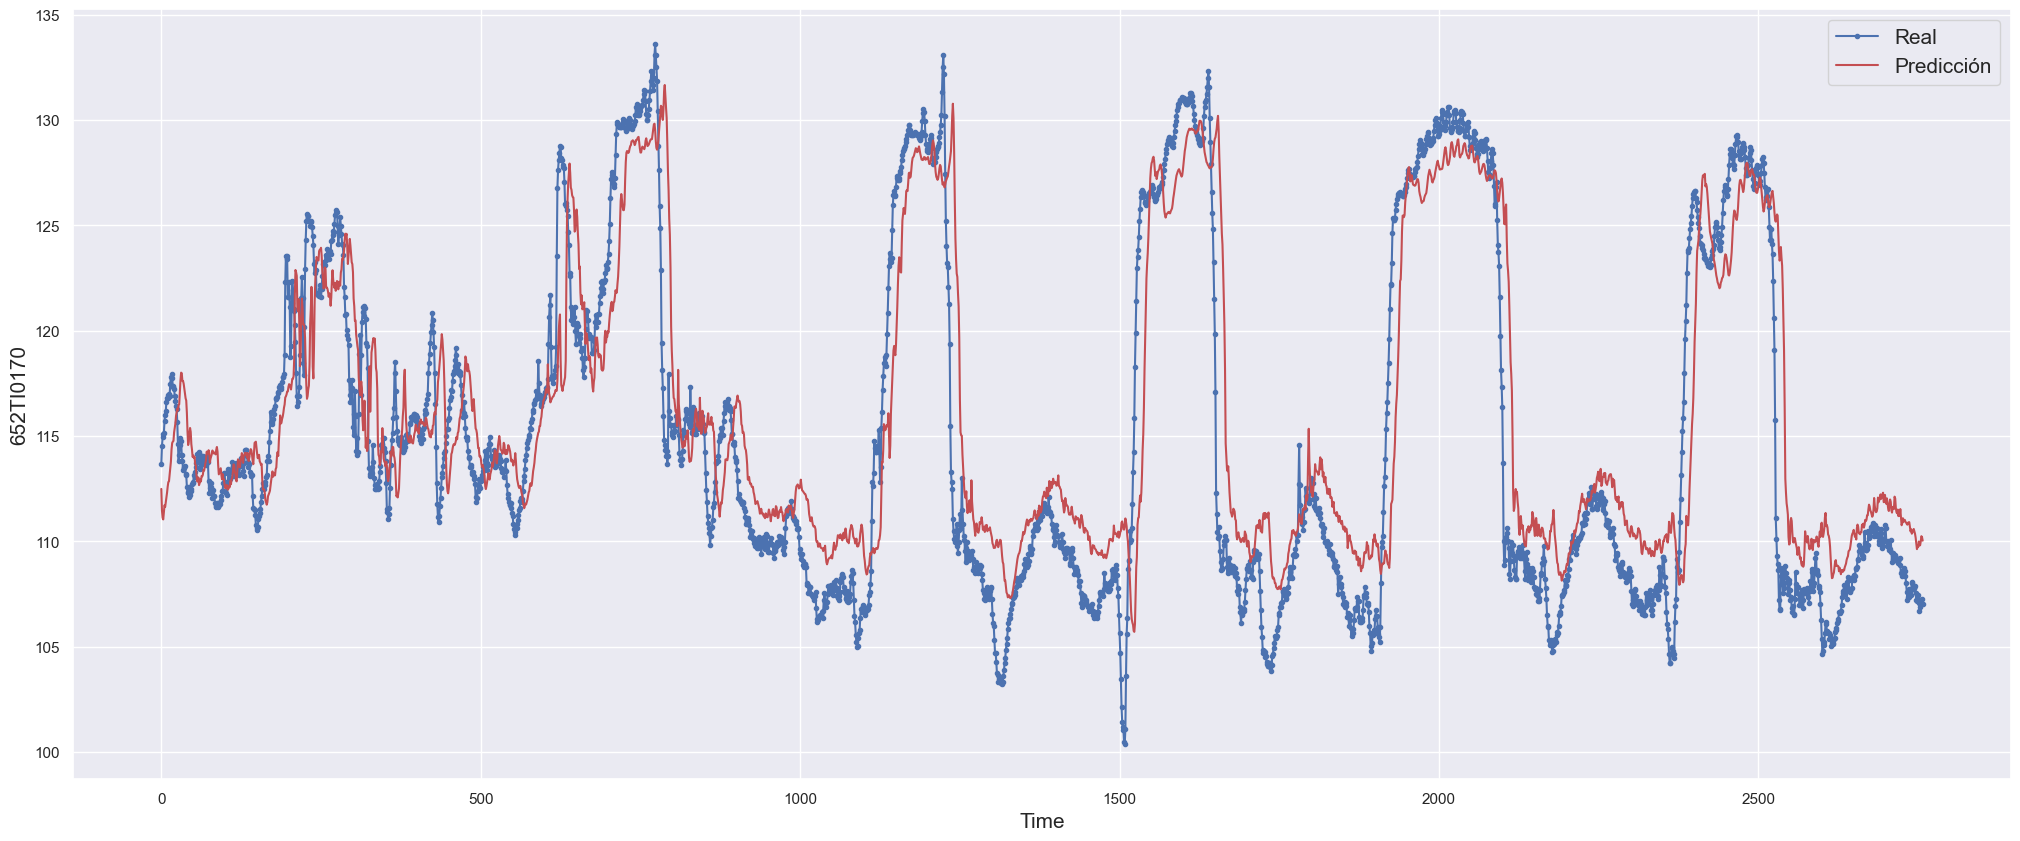

In [211]:
yhat_lstm=model_t.predict(test_x_r_lstm)
error_mae=mean_absolute_error(test_y_lstm, yhat_lstm)
print("Error del modelo sobre conjunto de validación: %.2f" % (error_mae))
n_data=test_x_lstm.shape[0]
aa=[x for x in range(n_data)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, test_y_lstm[-n_data:], marker='.', label="Real")
plt.plot(aa, yhat_lstm[-n_data:], 'r', label="Predicción")
plt.ylabel(y_train_lstm.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

Epoch 1/55
658/658 [==============================] - 5s 7ms/step - loss: 6390.5498 - val_loss: 16.6580
Epoch 2/55
658/658 [==============================] - 5s 7ms/step - loss: 16.6749 - val_loss: 12.2577
Epoch 3/55
658/658 [==============================] - 5s 7ms/step - loss: 14.4171 - val_loss: 12.5326
Epoch 4/55
658/658 [==============================] - 4s 7ms/step - loss: 14.0314 - val_loss: 12.6658
Epoch 5/55
658/658 [==============================] - 4s 7ms/step - loss: 13.7135 - val_loss: 13.0946
Epoch 6/55
658/658 [==============================] - 4s 6ms/step - loss: 13.4700 - val_loss: 14.6206
Epoch 7/55
658/658 [==============================] - 4s 7ms/step - loss: 13.6320 - val_loss: 11.9075
Epoch 8/55
658/658 [==============================] - 4s 7ms/step - loss: 13.4594 - val_loss: 11.9699
Epoch 9/55
658/658 [==============================] - 5s 7ms/step - loss: 13.4010 - val_loss: 12.4398
Epoch 10/55
658/658 [==============================] - 5s 7ms/step - loss: 13.45

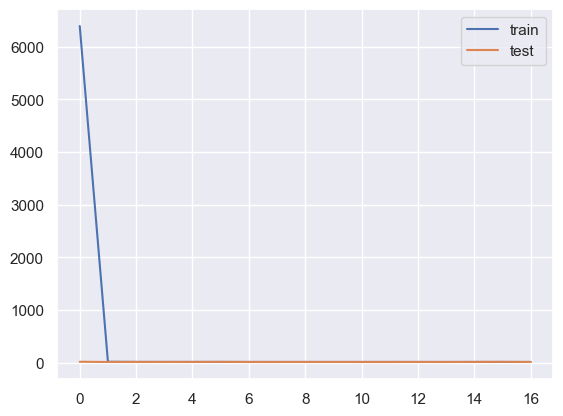

In [212]:
# Diseño de la red neuronal LSTM
model_d=Sequential()
model_d.add(Dense(256, activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(1, activation='linear'))
model_d.compile(loss='mean_squared_error', optimizer='adam')
# Entrenamos la red
es_d = EarlyStopping(monitor='val_loss',verbose=1, restore_best_weights=True, patience=10)
history_d=model_d.fit(train_x, train_y, epochs=55, batch_size=72, validation_data=(val_x, val_y), callbacks=[es_d])
# Mostramos la curva de entrenamiento
plt.plot(history_d.history['loss'], label='train')
plt.plot(history_d.history['val_loss'], label='test')
plt.legend()
plt.show()

In [213]:
model_d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2304      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,585
Trainable params: 3,073
Non-trainable params: 512
_________________________________________________________________


87/87 [==============================] - 0s 1ms/step
Error del modelo sobre conjunto de validación: 2.81


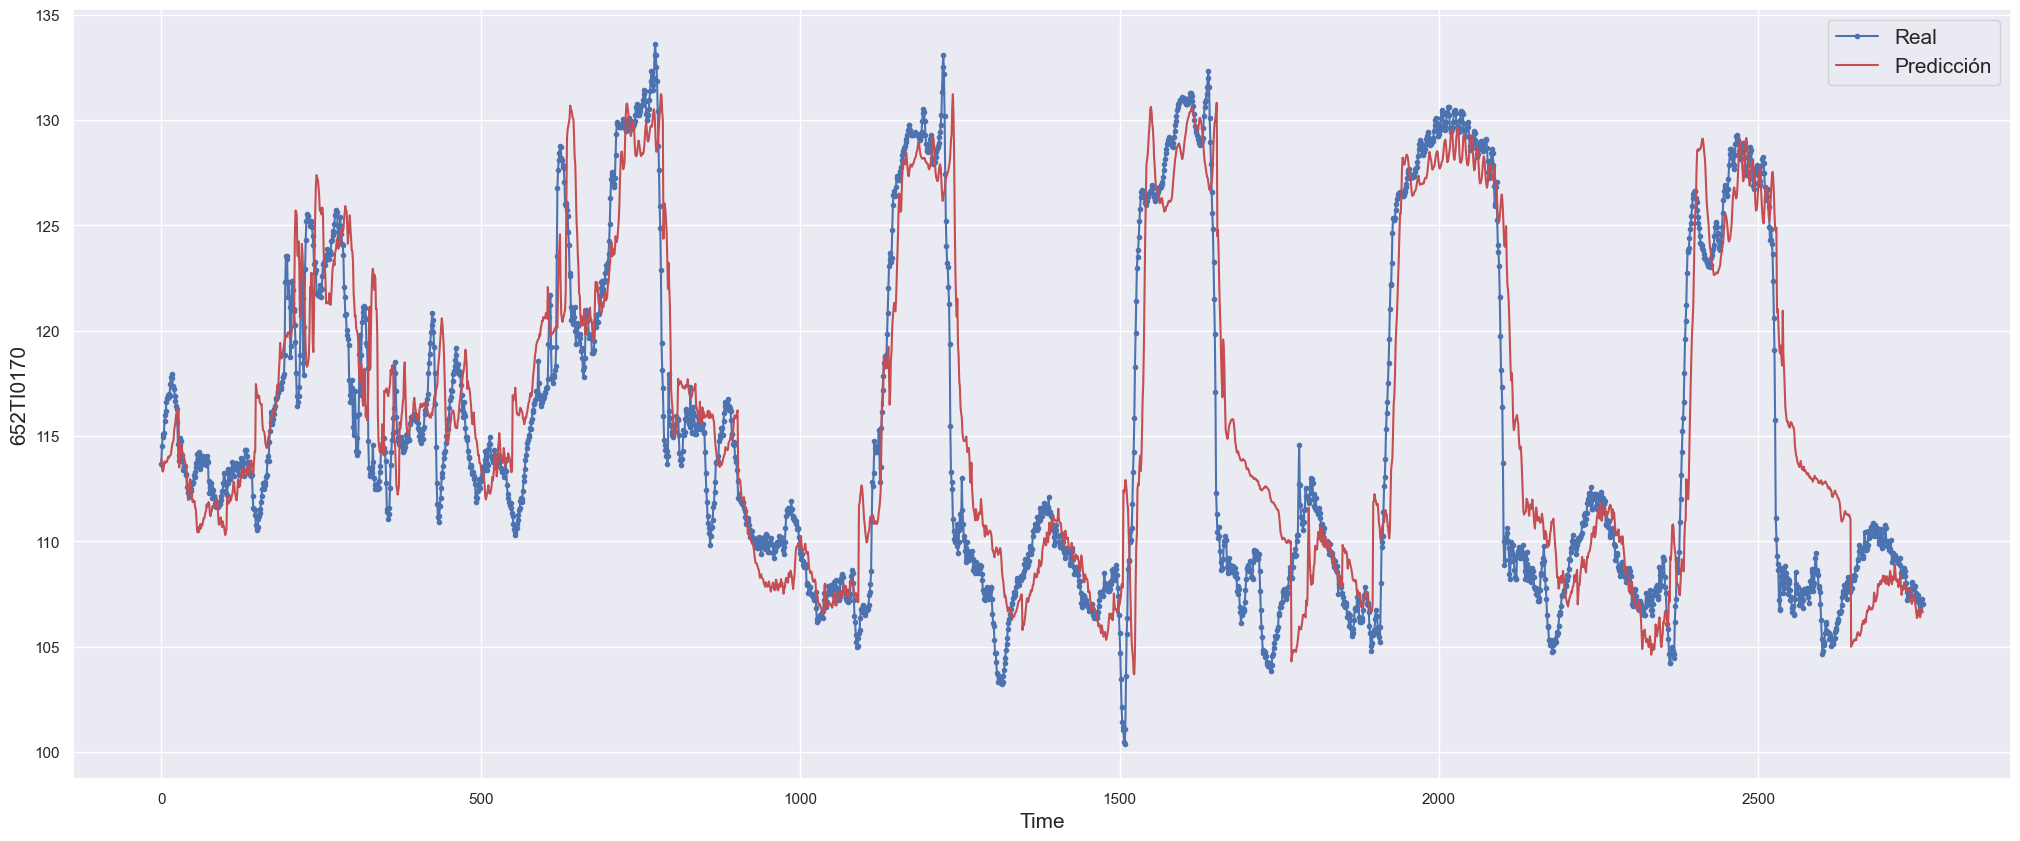

In [214]:
yhat_d=model_d.predict(test_x)
error_mae=mean_absolute_error(test_y, yhat_d)
print("Error del modelo sobre conjunto de validación: %.2f" % (error_mae))
n_data=test_x.shape[0]
aa=[x for x in range(n_data)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, test_y[-n_data:], marker='.', label="Real")
plt.plot(aa, yhat_d[-n_data:], 'r', label="Predicción")
plt.ylabel(y_train.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

In [215]:
np.mean(mean_squared_error(y_true=test_y, y_pred=yhat_d))

15.677545670942107

In [216]:
mean_absolute_error(y_true=test_y, y_pred=yhat_d)

2.814883528387465

In [217]:
mean_absolute_percentage_error(y_true=test_y, y_pred=yhat_d)

2.476350199635936

## Modelo de votación entre los dos mejores.

In [218]:
yhat_d.shape

(2758, 1)

In [219]:
y_pred_lags.shape

(2758,)

In [220]:
y_pred_lags = y_pred_lags.reshape(y_pred_lags.shape[0],1)

In [221]:
r = 0.5

y_pred_vote = r * yhat_d + (1-r)*y_pred_lags

Error del modelo sobre conjunto de validación: 2.61


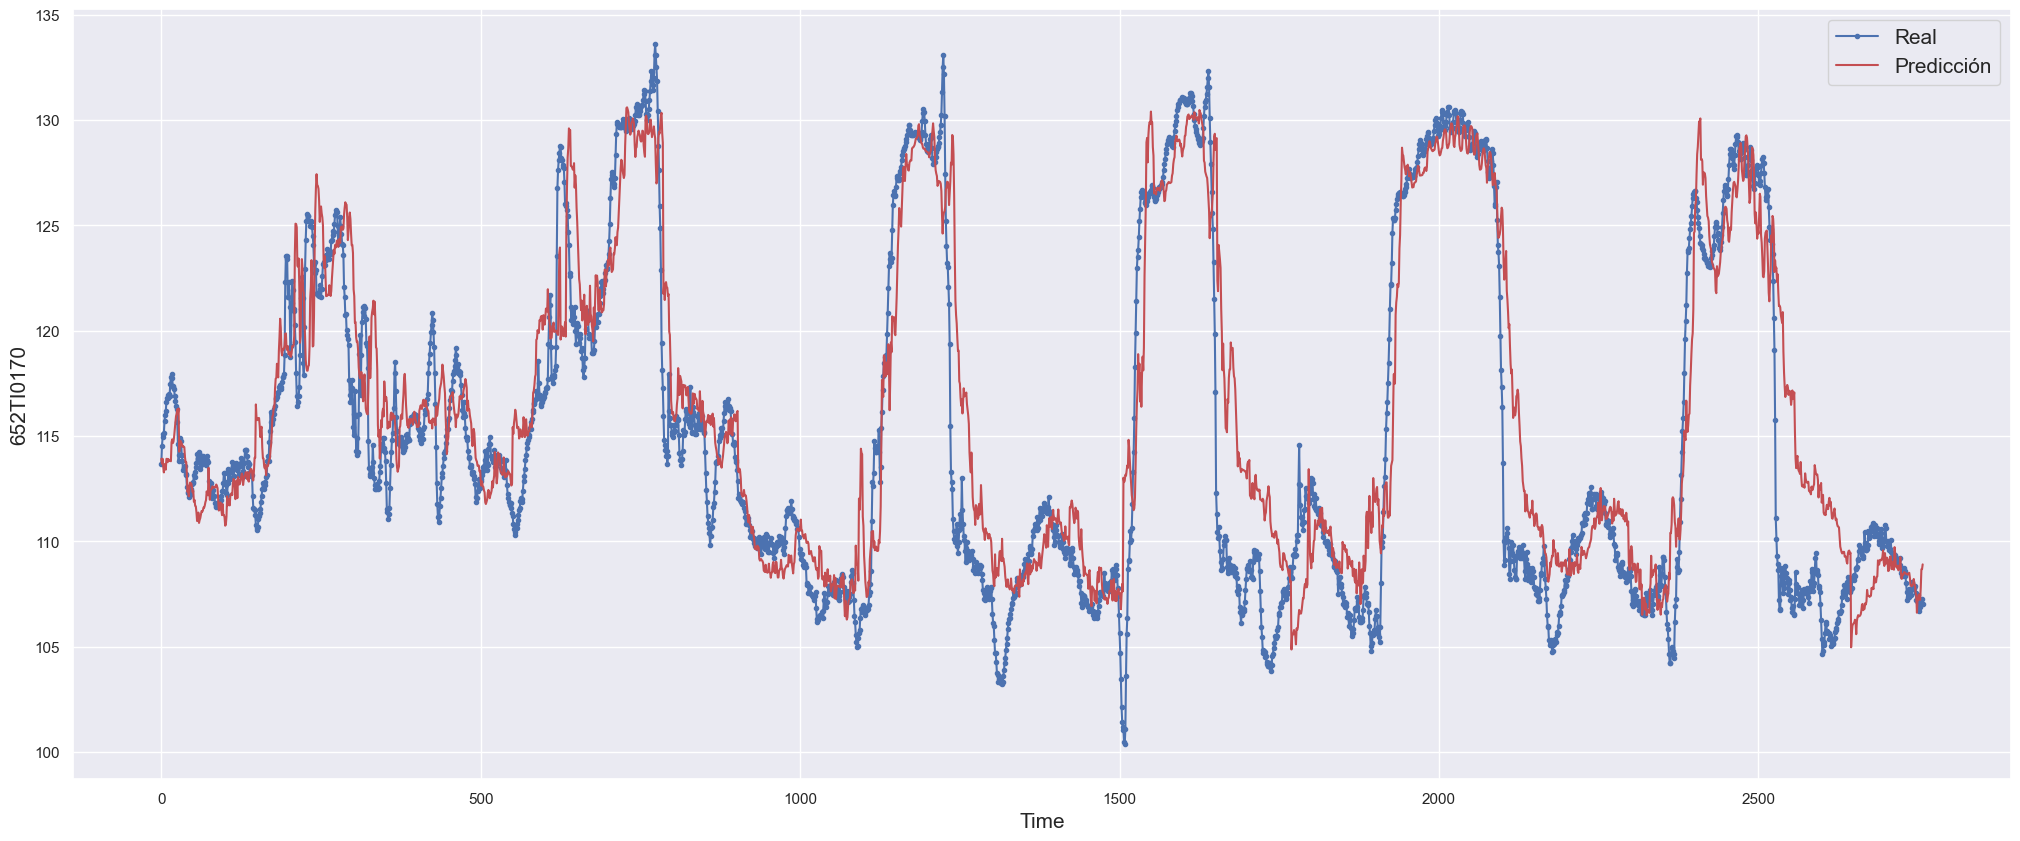

In [222]:
error_mae=mean_absolute_error(test_y, y_pred_vote)
print("Error del modelo sobre conjunto de validación: %.2f" % (error_mae))
n_data=test_x.shape[0]
aa=[x for x in range(n_data)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, test_y[-n_data:], marker='.', label="Real")
plt.plot(aa, y_pred_vote[-n_data:], 'r', label="Predicción")
plt.ylabel(y_train.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

In [223]:
np.mean(mean_squared_error(y_true=test_y, y_pred=y_pred_vote))

13.8926975652375

In [224]:
mean_absolute_error(y_true=test_y, y_pred=y_pred_vote)

2.614337369621672

In [225]:
mean_absolute_percentage_error(y_true=test_y, y_pred=y_pred_vote)

2.3026367814251874

## Chequeo del mejor modelo con dataset del 2023

In [226]:
dfcheck.set_index(['Fecha'], inplace=True)

In [227]:
dfcheck.head()

652Carga.Valor   652FI1063   652FI2063  \
Fecha                                                               
2022-12-31 23:00:00+00:00      431.702469  227.384035  227.837418   
2022-12-31 23:01:00+00:00      431.380051  227.804211  228.015097   
2022-12-31 23:02:00+00:00      431.057632  227.573603  228.846654   
2022-12-31 23:03:00+00:00      430.735214  227.876654  227.564451   
2022-12-31 23:04:00+00:00      430.412796  227.371544  227.624855   

                           620FI091.MC  620FC098.MC  620FC117.MC  652FC097.MC  \
Fecha                                                                           
2022-12-31 23:00:00+00:00    18.681750      4.20025      7.53725    19.204500   
2022-12-31 23:01:00+00:00    18.615251      4.17875      7.51175    19.079500   
2022-12-31 23:02:00+00:00    18.616251      4.17875      7.47600    19.007250   
2022-12-31 23:03:00+00:00    18.684750      4.20025      7.43000    18.987751   
2022-12-31 23:04:00+00:00    18.728250      4.14850      7.40825    18.968000   

                           652FC0099  652FC029.MC  652FC030.MC  ...  \
Fecha                                                           ...   
2022-12-31 23:00:00+00:00  62.895398   103.800251    54.261499  ...   
2022-12-31 23:01:00+00:00  63.522848   103.764751    52.852499  ...   
2022-12-31 23:02:00+00:00  64.150298   106.508501    53.802249  ...   
2022-12-31 23:03:00+00:00  64.713769   112.031500    57.110749  ...   
2022-12-31 23:04:00+00:00  65.091740   115.142500    59.143499  ...   

                            652FC2216   652FC2316   652FC2416  652FC0767  \
Fecha                                                                      
2022-12-31 23:00:00+00:00  849.067497  852.801377  852.688489   0.000333   
2022-12-31 23:01:00+00:00  847.533465  851.630175  859.320270   0.000399   
2022-12-31 23:02:00+00:00  849.037212  848.927740  856.406639   0.000466   
2022-12-31 23:03:00+00:00  850.930905  849.606374  844.339551   0.000532   
2022-12-31 23:04:00+00:00  849.974103  848.157922  842.247896   0.000598   

                           PCamMod1  PCamMod2    TCamMod1    TCamMod2  \
Fecha                                                                   
2022-12-31 23:00:00+00:00  1.191302  1.325483  431.936310  430.981849   
2022-12-31 23:01:00+00:00  1.190766  1.325515  431.818190  430.994435   
2022-12-31 23:02:00+00:00  1.190230  1.325546  431.707501  431.007020   
2022-12-31 23:03:00+00:00  1.189694  1.325578  431.714210  431.019606   
2022-12-31 23:04:00+00:00  1.189158  1.325609  431.761457  431.032191   

                              DPCab    DPAlim  
Fecha                                          
2022-12-31 23:00:00+00:00  0.274859  0.347381  
2022-12-31 23:01:00+00:00  0.274494  0.347365  
2022-12-31 23:02:00+00:00  0.274130  0.347349  
2022-12-31 23:03:00+00:00  0.273765  0.347333  
2022-12-31 23:04:00+00:00  0.273400  0.347317  

[5 rows x 68 columns]

In [228]:
dfcheck.tail()

652Carga.Valor   652FI1063   652FI2063  \
Fecha                                                               
2023-04-30 21:54:00+00:00      433.631821  227.383787  228.117817   
2023-04-30 21:55:00+00:00      435.614868  227.733614  228.434445   
2023-04-30 21:56:00+00:00      437.320168  228.057872  227.976338   
2023-04-30 21:57:00+00:00      435.463493  227.740569  227.881244   
2023-04-30 21:58:00+00:00      435.392703  227.220154  227.343169   

                           620FI091.MC  620FC098.MC  620FC117.MC  652FC097.MC  \
Fecha                                                                           
2023-04-30 21:54:00+00:00    20.825751      5.73900      8.68100    20.578500   
2023-04-30 21:55:00+00:00    21.105251      5.68100      8.70900    20.393500   
2023-04-30 21:56:00+00:00    21.149501      5.64675      8.73975    20.208750   
2023-04-30 21:57:00+00:00    20.958501      5.63625      8.77325    20.024250   
2023-04-30 21:58:00+00:00    20.953001      5.65775      8.80750    20.258749   

                           652FC0099  652FC029.MC  652FC030.MC  ...  \
Fecha                                                           ...   
2023-04-30 21:54:00+00:00  37.227659   127.215252    45.225500  ...   
2023-04-30 21:55:00+00:00  37.036251   129.101749    34.496500  ...   
2023-04-30 21:56:00+00:00  36.812880   129.498249    30.814750  ...   
2023-04-30 21:57:00+00:00  36.589509   128.404751    34.180249  ...   
2023-04-30 21:58:00+00:00  36.366138   127.972000    41.924500  ...   

                            652FC2216   652FC2316   652FC2416  652FC0767  \
Fecha                                                                      
2023-04-30 21:54:00+00:00  849.477345  852.390270  848.740760  -0.000119   
2023-04-30 21:55:00+00:00  849.717325  852.467299  849.480945  -0.000113   
2023-04-30 21:56:00+00:00  849.562918  852.426192  850.818759  -0.000107   
2023-04-30 21:57:00+00:00  850.423209  849.438007  851.878156  -0.000100   
2023-04-30 21:58:00+00:00  851.480115  848.582583  851.878338  -0.000094   

                           PCamMod1  PCamMod2    TCamMod1    TCamMod2  \
Fecha                                                                   
2023-04-30 21:54:00+00:00  1.231025  1.335652  428.557922  432.150187   
2023-04-30 21:55:00+00:00  1.230678  1.336911  428.571340  432.159623   
2023-04-30 21:56:00+00:00  1.230331  1.338171  428.797158  432.169059   
2023-04-30 21:57:00+00:00  1.229984  1.339430  429.096401  432.178496   
2023-04-30 21:58:00+00:00  1.229671  1.340690  429.377991  432.187932   

                              DPCab    DPAlim  
Fecha                                          
2023-04-30 21:54:00+00:00  0.235525  0.349998  
2023-04-30 21:55:00+00:00  0.235919  0.350392  
2023-04-30 21:56:00+00:00  0.236314  0.350785  
2023-04-30 21:57:00+00:00  0.236708  0.351178  
2023-04-30 21:58:00+00:00  0.237135  0.351567  

[5 rows x 68 columns]

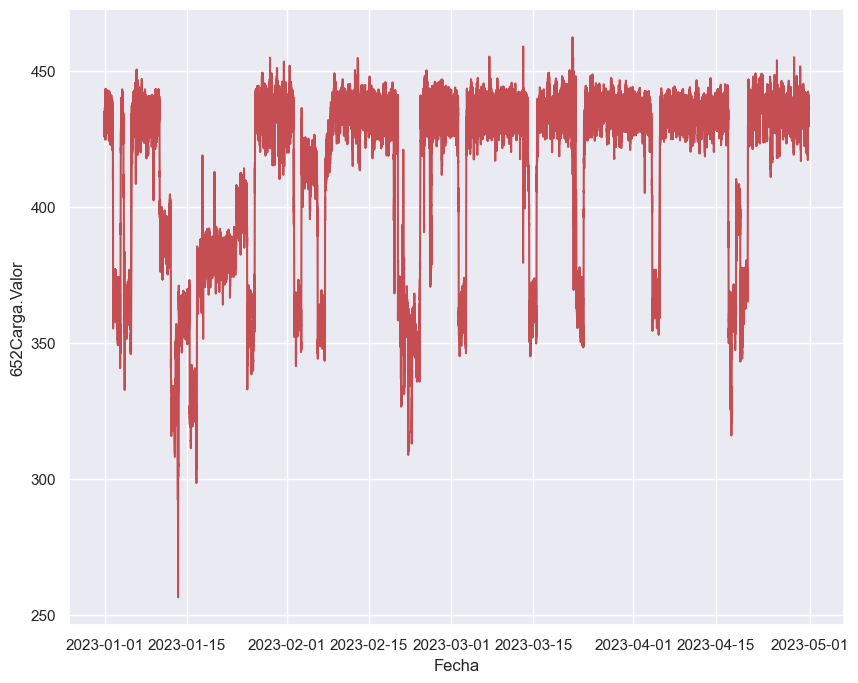

In [229]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dfcheck, x='Fecha', y='652Carga.Valor', color='r')
plt.show()

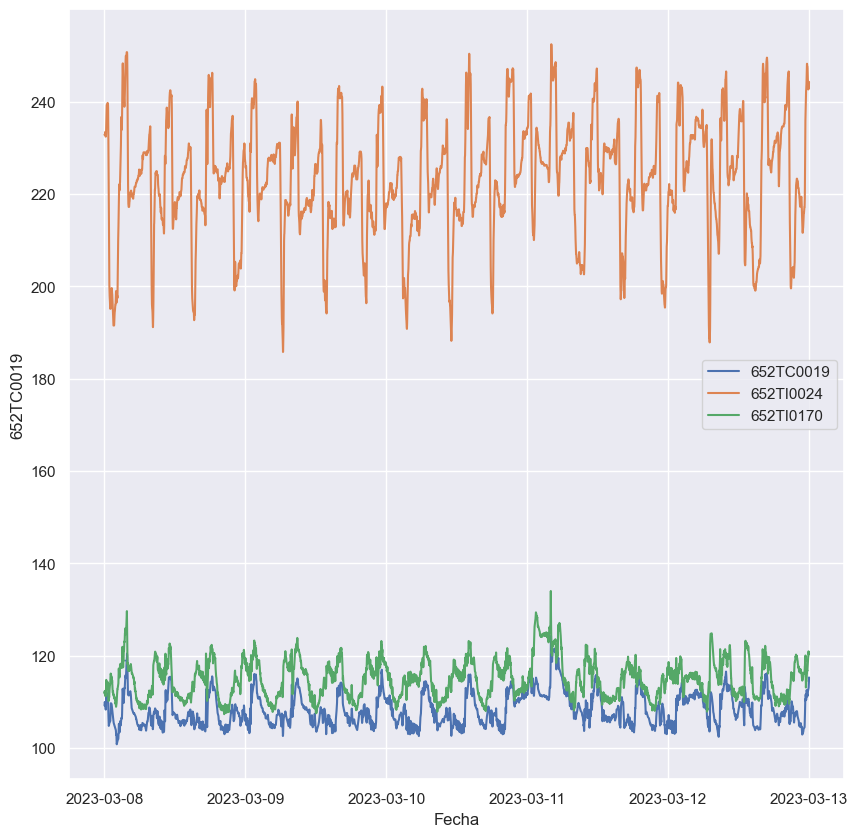

In [230]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-03-08') & (dfcheck.index < '2023-03-13')], x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-03-08') & (dfcheck.index < '2023-03-13')], x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-03-08') & (dfcheck.index < '2023-03-13')], x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

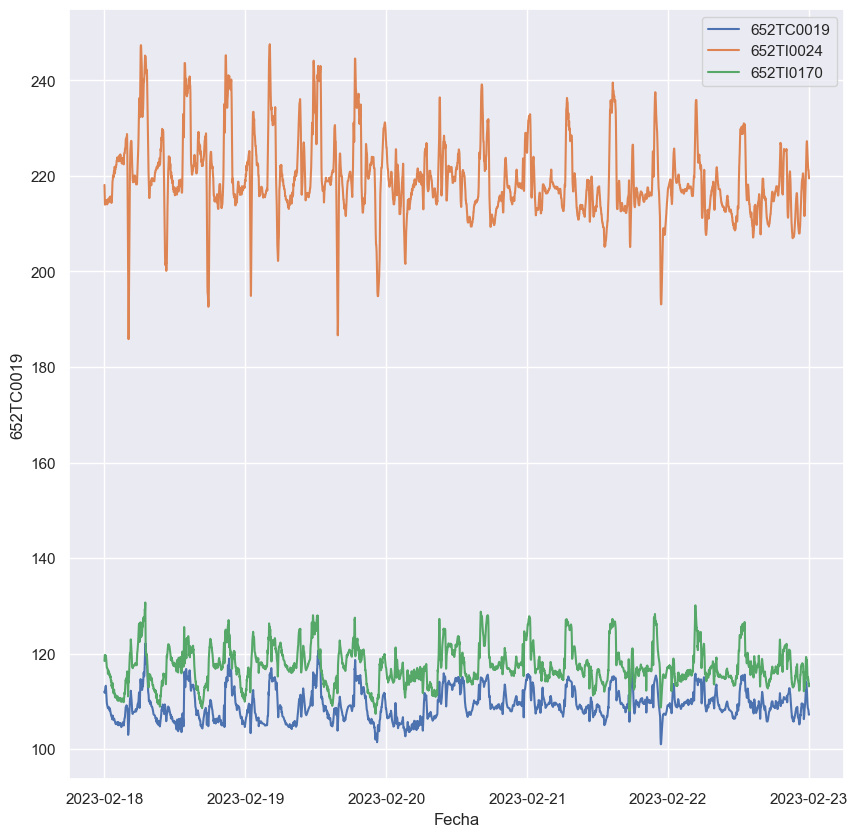

In [231]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-02-18') & (dfcheck.index < '2023-02-23')], x='Fecha', y='652TC0019', label='652TC0019')
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-02-18') & (dfcheck.index < '2023-02-23')], x='Fecha', y='652TI0024', label='652TI0024')
sns.lineplot(data=dfcheck.loc[(dfcheck.index > '2023-02-18') & (dfcheck.index < '2023-02-23')], x='Fecha', y='652TI0170', label='652TI0170')
plt.legend()
plt.show()

In [233]:
df_check_xgb = create_features(dfcheck)
df_check_xgb = create_cycle(df_check_xgb)
df_check_xgb = add_lags(df_check_xgb)

In [240]:
df_check_xgb_1 = df_check_xgb.loc[(df_check_xgb.index >= '2023-03-08') & (df_check_xgb.index <= '2023-03-13')].copy()
df_check_xgb_1 = df_check_xgb_1.dropna(how='any', axis=0)
df_check_xgb_2 = df_check_xgb.loc[(df_check_xgb.index > '2023-02-18') & (df_check_xgb.index < '2023-02-23')].copy()
df_check_xgb_2 = df_check_xgb_2.dropna(how='any', axis=0)

In [243]:
FEATURES = ['T_ciclo1_lag', 'T_ciclo2_lag', 'Transitorio_1_lag', 'Transitorio_2_lag', 'T_corte_lag', 'lag1', 'lag2']
TARGET = ['652TI0170']

X_check_1 = df_check_xgb_1[FEATURES]
y_check_1 = df_check_xgb_1[TARGET]

X_check_2 = df_check_xgb_2[FEATURES]
y_check_2 = df_check_xgb_2[TARGET]

In [245]:
y_pred_check_1 = model_xgb_lags.predict(X_check_1)

y_pred_check_2 = model_xgb_lags.predict(X_check_2)

In [246]:
check_xgb_lags_show_1 = X_check_1.copy()
check_xgb_lags_show_1 = check_xgb_lags_show_1.join(y_check_1)
check_xgb_lags_show_1 = check_xgb_lags_show_1.reset_index()
check_xgb_lags_show_1 = check_xgb_lags_show_1.join(pd.DataFrame(y_pred_check_1)).rename(columns={0:'y_pred'})

In [247]:
check_xgb_lags_show_2 = X_check_2.copy()
check_xgb_lags_show_2 = check_xgb_lags_show_2.join(y_check_2)
check_xgb_lags_show_2 = check_xgb_lags_show_2.reset_index()
check_xgb_lags_show_2 = check_xgb_lags_show_2.join(pd.DataFrame(y_pred_check_2)).rename(columns={0:'y_pred'})

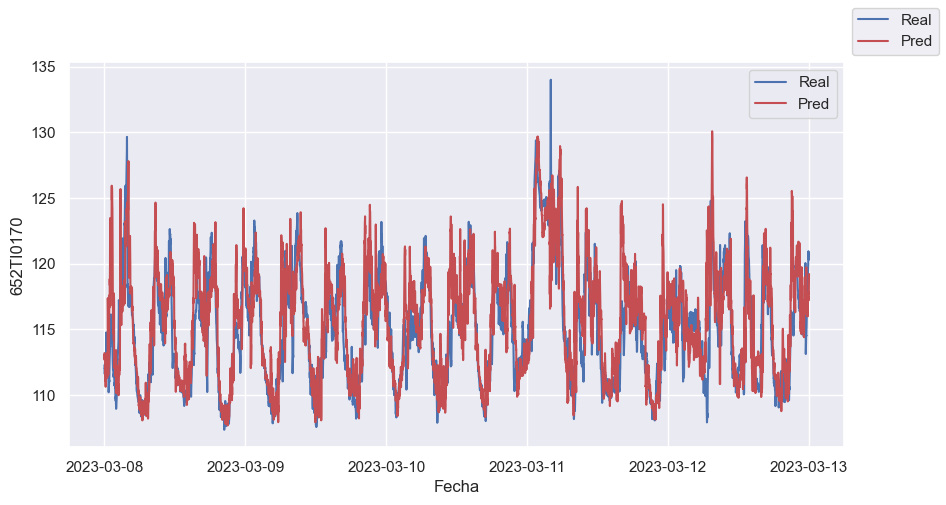

In [248]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=check_xgb_lags_show_1, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=check_xgb_lags_show_1, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
fig.legend()
plt.show()

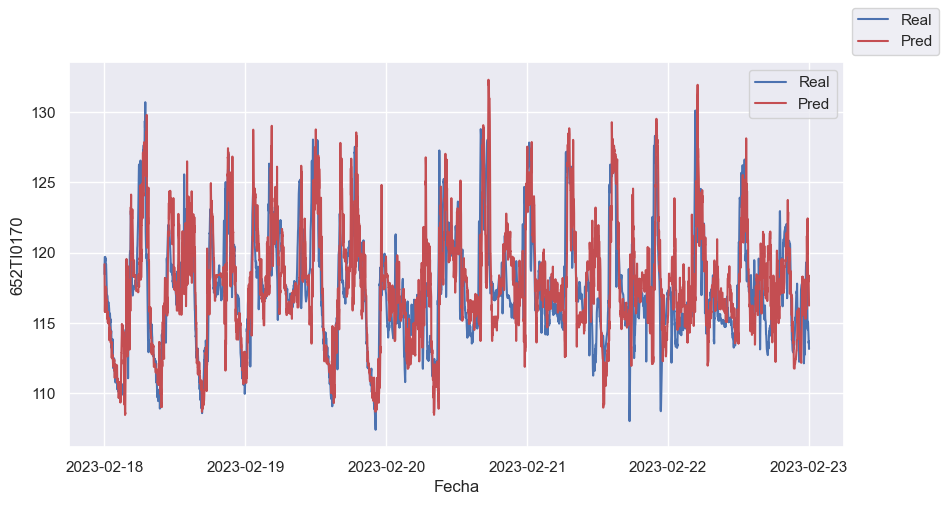

In [249]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=check_xgb_lags_show_2, x='Fecha', y='652TI0170', ax=ax, color='b', label='Real')
sns.lineplot(data=check_xgb_lags_show_2, x='Fecha', y='y_pred', ax=ax, color='r', label='Pred')
fig.legend()
plt.show()

In [250]:
np.mean(mean_squared_error(y_true=y_check_1, y_pred=y_pred_check_1))

7.477537100193576

In [251]:
mean_absolute_error(y_true=y_check_1, y_pred=y_pred_check_1)

1.9919962364201818

In [252]:
mean_absolute_percentage_error(y_true=y_check_1, y_pred=y_pred_check_1)

4.1328666145945565

In [253]:
np.mean(mean_squared_error(y_true=y_check_2, y_pred=y_pred_check_2))

10.436305176857617

In [254]:
mean_absolute_error(y_true=y_check_2, y_pred=y_pred_check_2)

2.3674518002738965

In [255]:
mean_absolute_percentage_error(y_true=y_check_2, y_pred=y_pred_check_2)

3.755853086783018